In [1]:
import pandas as pd
import numpy as np
from vivarium import Artifact
import os
from pathlib import Path
from db_queries import get_outputs, get_ids, get_model_results, get_population
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import gbd_mapping
from matplotlib.backends.backend_pdf import PdfPages
pd.set_option('use_inf_as_na', True)
sns.set(context = 'paper', style='whitegrid', font_scale=1.8, rc = {'axes.spines.right':False, 'axes.spines.top': False, 'figure.figsize':(12.7,8.6)}, palette='Set1')


In [2]:
locations = ['brazil', 'china', 'france', 'italy','russian_federation', 'spain']
save_path_j = '/home/j/Project/simulation_science/zenon/validation/model_7'


In [3]:
path_template = Path('/share/costeffectiveness/results/vivarium_csu_zenon/sample_history')



In [4]:

def get_guideline_sample_data(locations):
    outcomes = pd.DataFrame([])
    try:   
        for location in locations:
            outcome = pd.read_hdf(str(path_template / f'{location}/guideline_sample_history.hdf'))
            outcome['location'] = f'{location}'
            outcomes = outcomes.append(outcome)
        return outcomes
            
    except:
        print(f'{location} is not a location in the outputs')

def get_guideline_new_tmt_sample_data(locations):
    outcomes = pd.DataFrame([])
    try:   
        for location in locations:
            outcome = pd.read_hdf(str(path_template / f'{location}/guideline_and_new_treatment_sample_history.hdf'))
            outcome['location'] = f'{location}'
            outcomes = outcomes.append(outcome)
        return outcomes
            
    except:
        print(f'{location} is not a location in the outputs')


In [5]:
guideline_sample = get_guideline_sample_data(locations).reset_index()

In [6]:
guideline_tmt_sample = get_guideline_new_tmt_sample_data(locations).reset_index()

In [22]:
len(guideline_sample['simulant'].unique())

4696

In [24]:
for column in guideline_sample:
    print(column)

simulant
time
ldl
fpg
sbp
ikf
healthcare_utilization_rate
alive
age
sex
entrance_time
exit_time
ldlc_treatment_category
initial_treatment_proportion_reduction
cause_of_death
acute_myocardial_infarction_event_time
post_myocardial_infarction_event_time
acute_ischemic_stroke_event_time
post_ischemic_stroke_event_time
follow_up_date
untreated_ldl
background_visit
follow_up_visit
location


In [7]:
def get_dm_state(x):
    if x >= 7.0:
        return 'severe_diabetes'
    else:
        return 'susceptible'

In [8]:
guideline_sample['diabetes_state'] = guideline_sample.apply(lambda row: get_dm_state(row['fpg']),axis=1)

guideline_tmt_sample['diabetes_state'] = guideline_tmt_sample.apply(lambda row: get_dm_state(row['fpg']),axis=1)



In [9]:
guideline_sample['scenario'] = 'Intervention 1 (multiple pills)'
guideline_tmt_sample['scenario'] = 'Intervention 2 (FDC)'

In [10]:
scenarios_df = pd.concat([guideline_sample,guideline_tmt_sample])

In [32]:
scenarios_df

simulant       time       ldl        fpg         sbp   ikf  \
0           9781 2020-01-01  3.556726   5.149938  147.562239  cat5   
1           4362 2020-01-01  3.425218   4.620123  118.896003  cat5   
2           4367 2020-01-01  4.835514   8.016410  133.488952  cat5   
3           2765 2020-01-01  5.660699   5.446770  158.077047  cat5   
4           3209 2020-01-01  2.737301   6.760328  137.372015  cat5   
5           1665 2020-01-01  3.262014   5.068507   97.312860  cat5   
6           1896 2020-01-01  3.176849   4.102843  119.347448  cat5   
7           9662 2020-01-01  4.301427   4.715284  139.184969  cat5   
8           7038 2020-01-01  3.600477   4.418663  110.303122  cat5   
9           9452 2020-01-01  2.640069   5.514602  118.579229  cat5   
10          1387 2020-01-01  5.696445   4.447859  121.055769  cat5   
11          1724 2020-01-01  4.879287   4.406344  143.667227  cat5   
12          3688 2020-01-01  3.680853   5.560659  117.619442  cat5   
13          2846 2020-01-01  4.491922   6.872882  119.834991  cat5   
14          4084 2020-01-01  2.621338   5.473434  115.086968  cat5   
15          4117 2020-01-01  4.764176   5.447436  124.893325  cat5   
16           838 2020-01-01  2.849041   5.167468  120.033646  cat5   
17          3960 2020-01-01  3.368945   5.755737  118.077765  cat5   
18          4696 2020-01-01  5.575845   3.706211  120.740703  cat5   
19             8 2020-01-01  4.111236   4.685657  149.366164  cat5   
20          9702 2020-01-01  4.846929   5.420540  131.094199  cat5   
21          2652 2020-01-01  3.851198   6.482400  134.589025  cat5   
22          4644 2020-01-01  2.940460   5.121636  128.827708  cat5   
23          2760 2020-01-01  3.110801   4.770061  108.725294  cat5   
24          3766 2020-01-01  5.873261   7.681790  141.082210  cat5   
25           601 2020-01-01  3.242623   6.196868  125.376731  cat5   
26          2390 2020-01-01  5.797203   4.677006  124.875810  cat4   
27          4570 2020-01-01  3.666563   5.347552  135.537465  cat5   
28          2659 2020-01-01  3.904875   7.129292  151.632940  cat5   
29          1715 2020-01-01  4.411061   6.712698  133.439584  cat5   
...          ...        ...       ...        ...         ...   ...   
401970      3036 2025-01-22  4.396762   5.964460  134.279101  cat5   
401971      2171 2025-01-22  2.732722   4.948219  148.087174  cat5   
401972      3728 2025-01-22  4.322509   4.219048  119.186591  cat5   
401973      3316 2025-01-22  3.506003   4.459789  115.080733  cat5   
401974      4535 2025-01-22  3.448387   4.641250  142.555277  cat5   
401975      3392 2025-01-22  1.869160   4.654337  136.397809  cat3   
401976      6693 2025-01-22  3.380249   4.745148  139.886256  cat5   
401977      6691 2025-01-22  1.591630  13.439317  146.554977  cat3   
401978      5777 2025-01-22  4.025386   5.918617  165.412348  cat5   
401979      1367 2025-01-22  3.641149   4.527571  125.675576  cat5   
401980      5568 2025-01-22  4.269450   5.453404  133.544076  cat5   
401981      2643 2025-01-22  2.463399   2.193443  120.314642  cat5   
401982      5874 2025-01-22  3.221549   4.393187  123.123012  cat5   
401983      9875 2025-01-22  3.774544   5.035816  114.153143  cat5   
401984      1682 2025-01-22  4.042642   6.019816  157.678405  cat5   
401985      8000 2025-01-22  6.611223   5.410839  137.645424  cat3   
401986      1139 2025-01-22  3.795732   4.443665  144.994463  cat5   
401987      9024 2025-01-22  1.393086   5.815135  145.907515  cat5   
401988      2646 2025-01-22  3.471596   3.966965  140.323421  cat5   
401989      1102 2025-01-22  1.630513   2.414758  168.755998  cat5   
401990      1880 2025-01-22  3.445038   5.575237  156.821575  cat5   
401991      4287 2025-01-22  4.581875   5.306449  153.182031  cat5   
401992      5126 2025-01-22  2.102133   5.102460  124.342917  cat3   
401993      4312 2025-01-22  3.552599   3.933815  133.535604  cat5   
401994      1706 2025-01-22  2.523541   4.756780  132.258908  cat5   
401995      2927 2

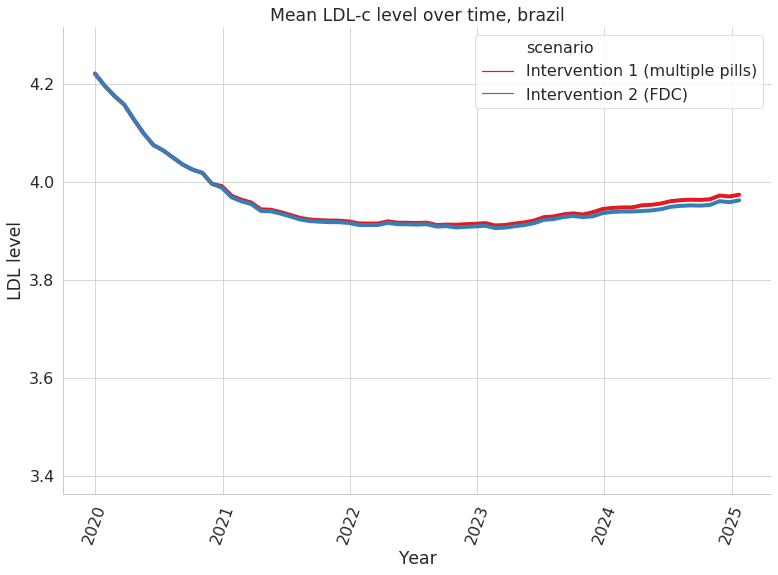

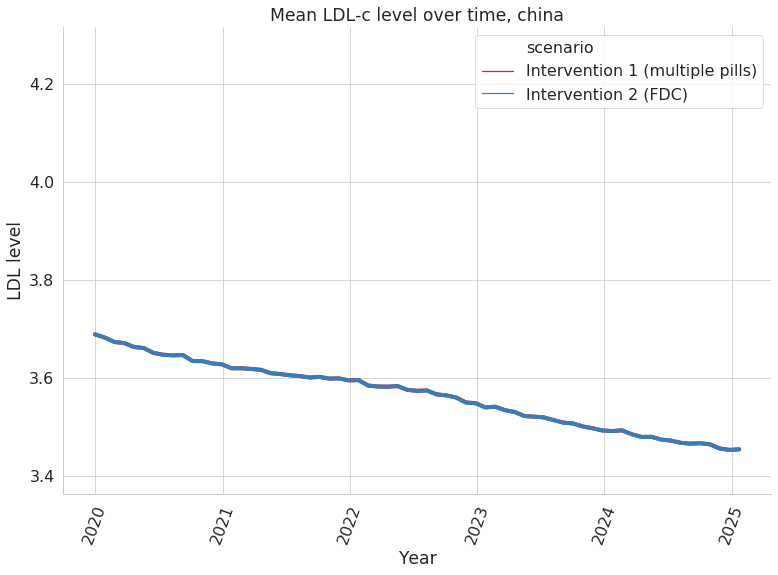

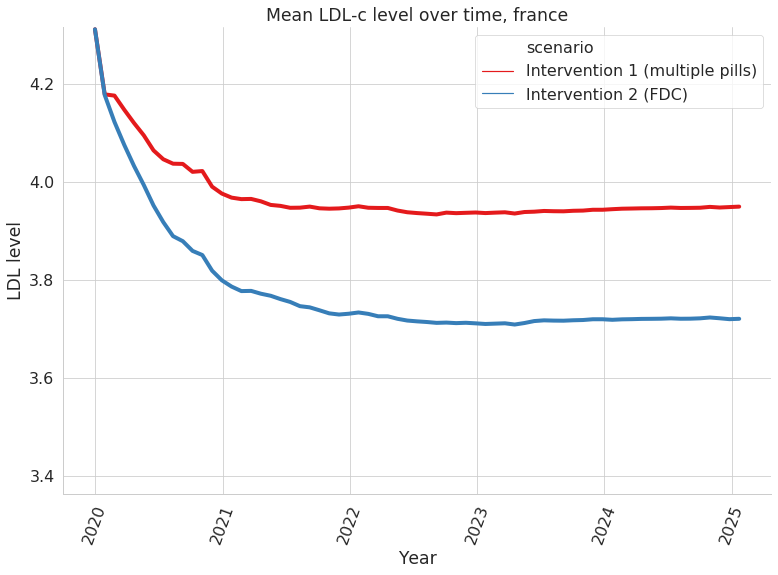

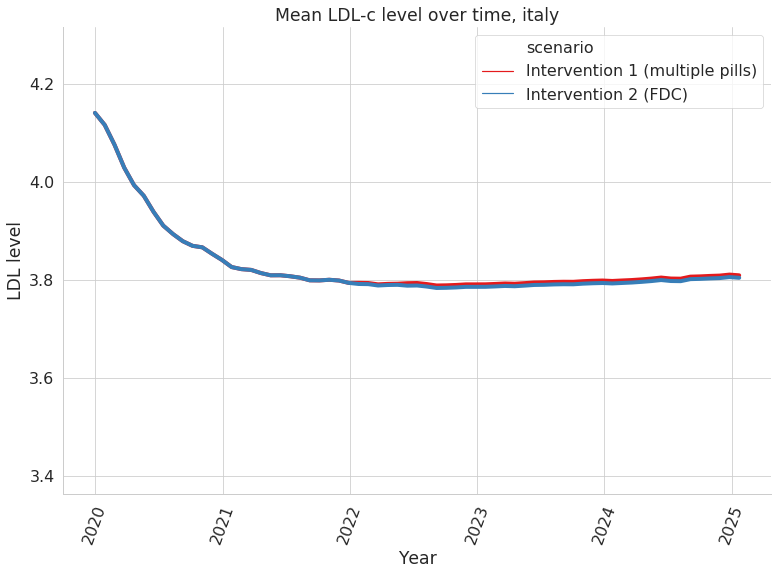

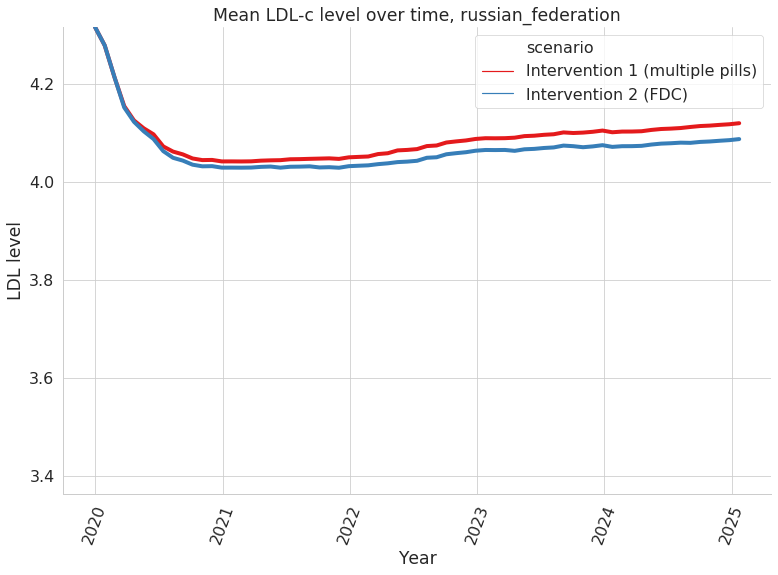

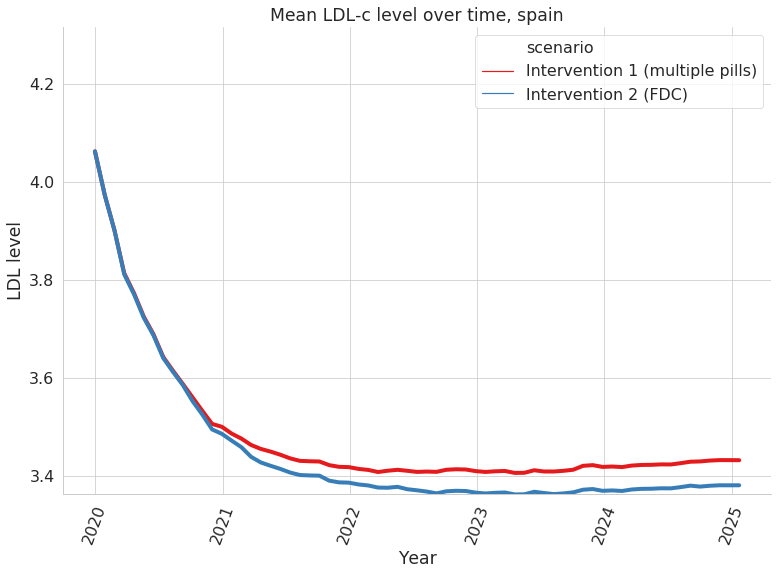

<Figure size 914.4x619.2 with 0 Axes>

In [78]:
def plot_ldl_c_mean(scenarios_df, locations):
    df = scenarios_df.groupby(['location', 'time', 'scenario']).ldl.mean().reset_index()
    
    with PdfPages(str(save_path_j)+f'/ldl_c_plots/mean_ldl_c_over_time.pdf') as pdf:
        diff_upper = df.ldl.max()
        diff_lower = df.ldl.min()

        for location in locations:
            df_plot = df[(df.location == location)]


            g = sns.lineplot(x='time', y='ldl', hue = 'scenario',
                             linewidth=4, data=df_plot)

            g.set_title(f'Mean LDL-c level over time, {location}')
            plt.xticks(rotation=70)
            g.set_xlabel('Year')
            g.set_ylabel(f'LDL level')
            g.set_ylim(diff_lower,diff_upper)

            pdf.savefig(orientation = 'landscape', bbox_inches='tight')

            plt.show()
            plt.clf() 

plot_ldl_c_mean(scenarios_df, locations)


In [70]:
high_ldl_c_sim_start = scenarios_df[(scenarios_df.time=='2020-01-01T00:00:00.000000000') & (scenarios_df.ldl >=5.0)]
array_high = high_ldl_c_sim_start['simulant'].unique()
list_high = list(array_high)

def get_high_simulants(scenarios_df):
    ldl_df = pd.DataFrame([])
    for simulant in list_high:
        outcome = scenarios_df[(scenarios_df.simulant == simulant)]
        ldl_df = ldl_df.append(outcome)
    return ldl_df
        

In [72]:
high_ldlc_group = get_high_simulants(scenarios_df)

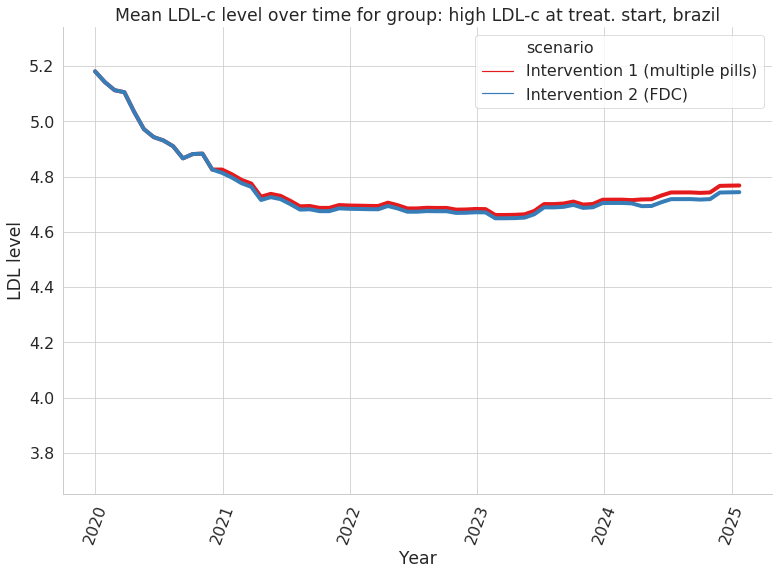

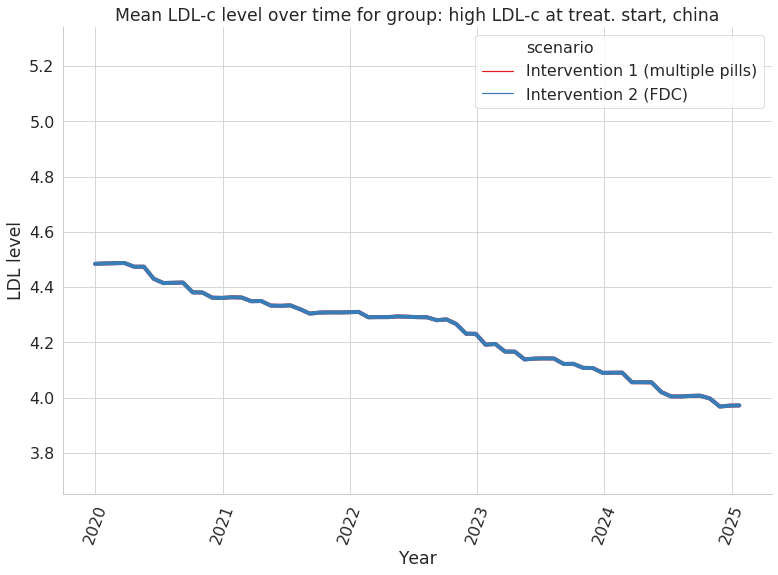

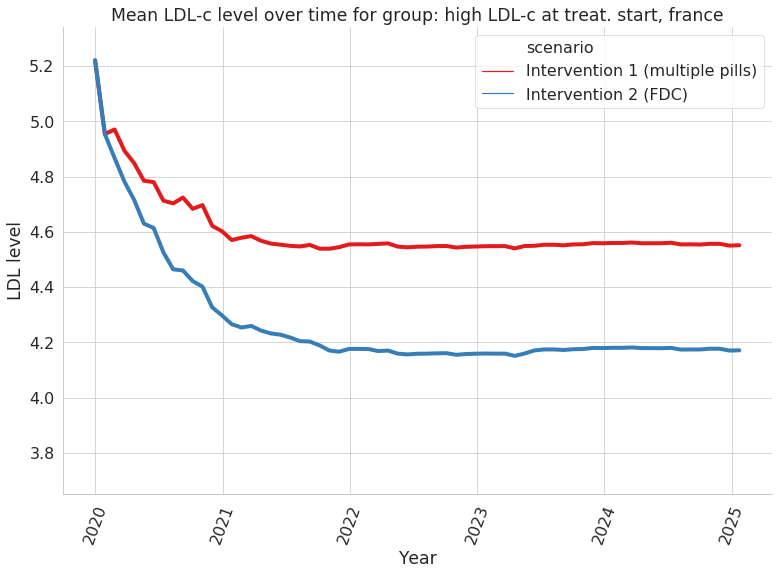

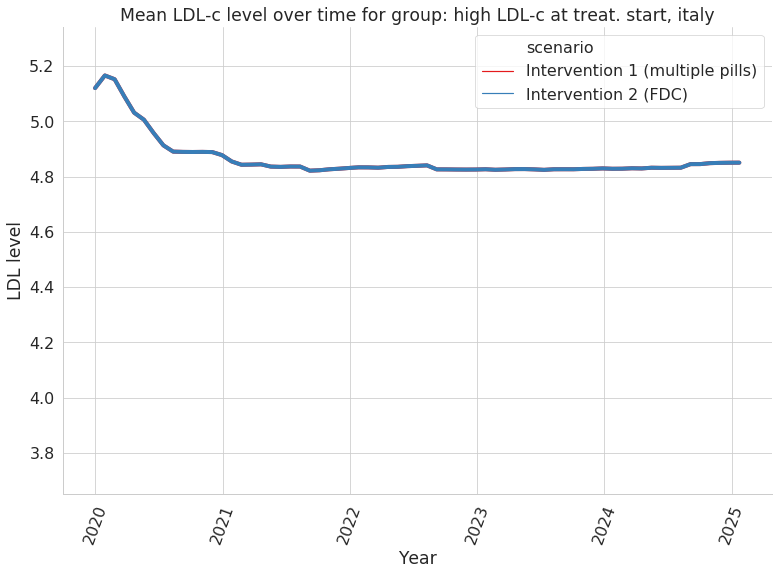

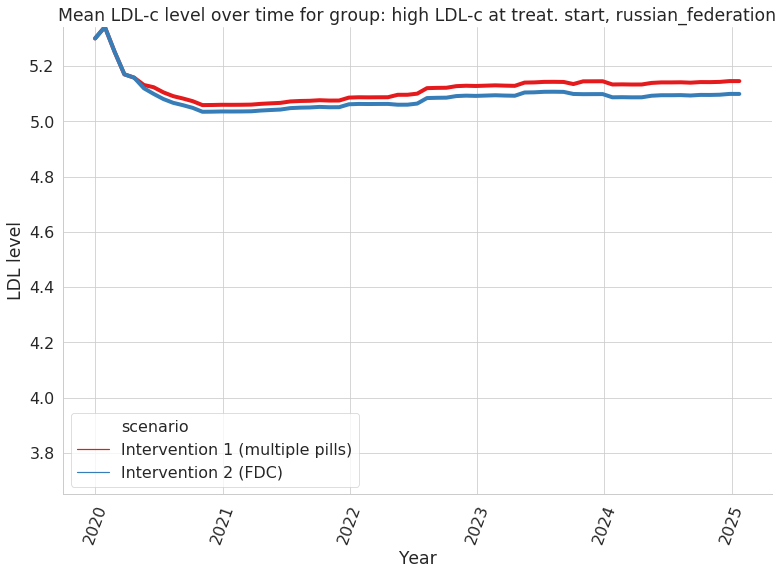

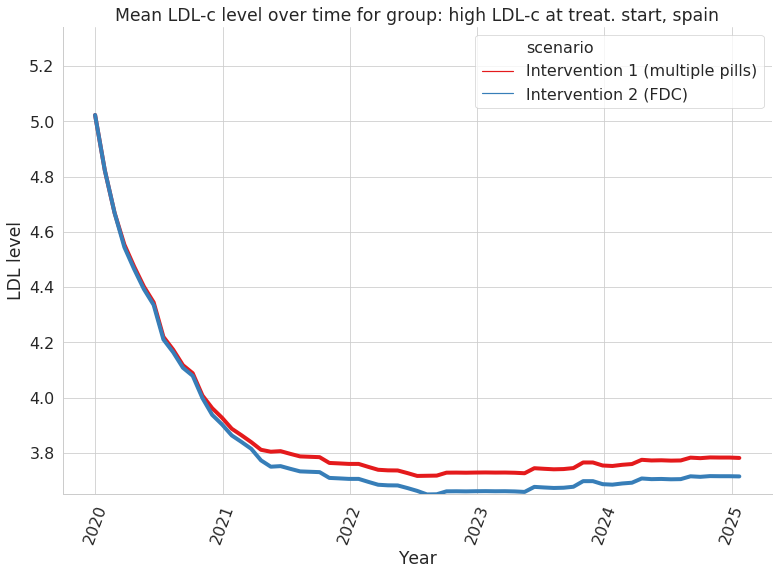

<Figure size 914.4x619.2 with 0 Axes>

In [79]:
def plot_high_ldl_c_sim_start(high_ldlc_group,locations):
    df = high_ldlc_group.groupby(['time','location','scenario']).ldl.mean().reset_index()
    with PdfPages(str(save_path_j)+f'/ldl_c_plots/high_ldl_mean_ldl_c_over_time.pdf') as pdf:
        diff_upper = df.ldl.max()
        diff_lower = df.ldl.min()
        
        for location in locations:
            df_plot = df[(df.location == location)]

            g = sns.lineplot(x='time', y='ldl', hue = 'scenario',
                             linewidth=4, data=df_plot)

            g.set_title(f'Mean LDL-c level over time for group: high LDL-c at treat. start, {location}')
            plt.xticks(rotation=70)
            g.set_xlabel('Year')
            g.set_ylabel(f'LDL level')
            g.set_ylim(diff_lower,diff_upper)
            pdf.savefig(orientation = 'landscape', bbox_inches='tight')

            plt.show()
            plt.clf() 

plot_high_ldl_c_sim_start(high_ldl_c_group,locations)
    


In [80]:
high_fpg_sim_start = scenarios_df[(scenarios_df.time=='2020-01-01T00:00:00.000000000') & (scenarios_df.fpg >=7.0)]
array_high_fpg = high_fpg_sim_start['simulant'].unique()
list_high_fpg = list(array_high_fpg)

def get_high_fpg_simulants(scenarios_df):
    fpg_df = pd.DataFrame([])
    for simulant in list_high_fpg:
        outcome = scenarios_df[(scenarios_df.simulant == simulant)]
        fpg_df = fpg_df.append(outcome)
    return fpg_df
        

In [81]:
high_fpg_group = get_high_fpg_simulants(scenarios_df)

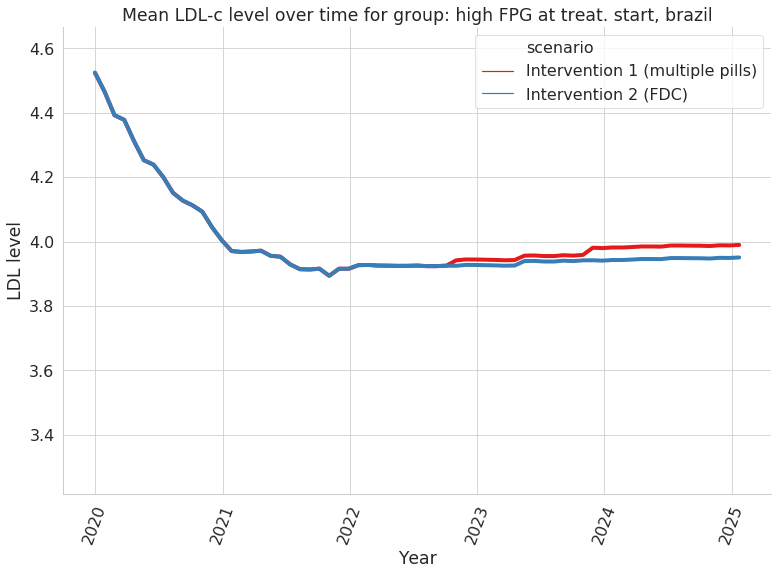

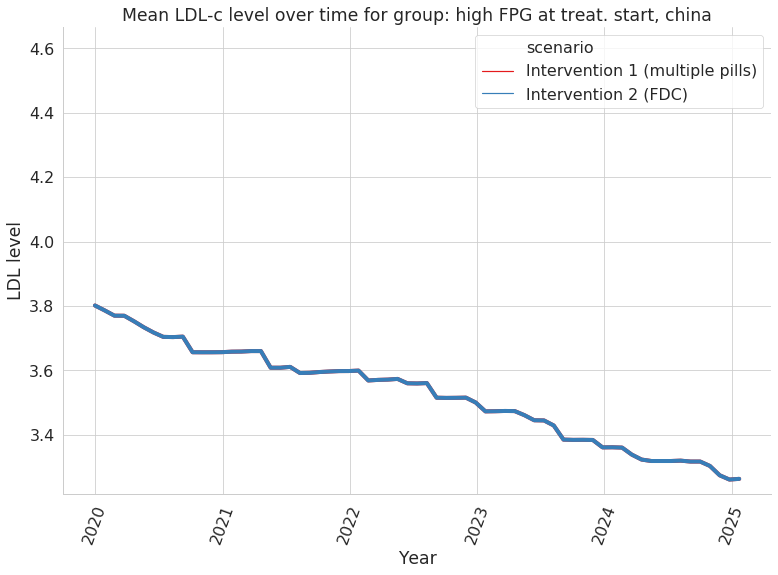

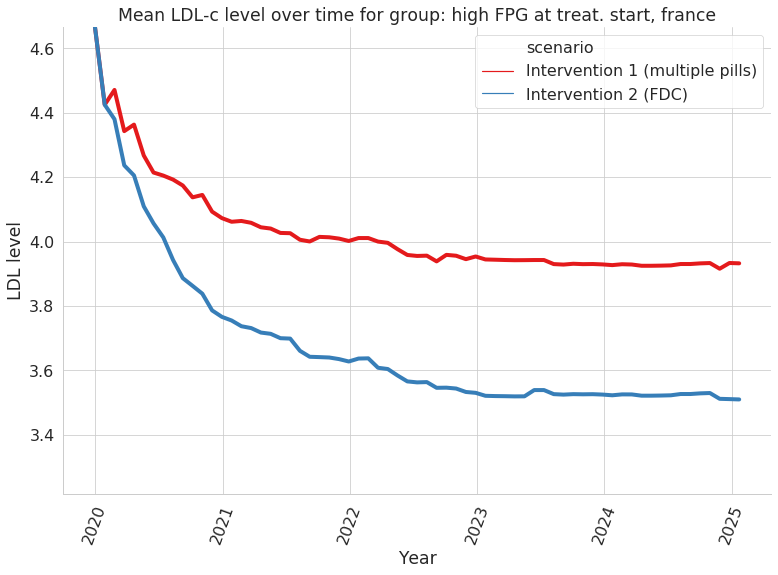

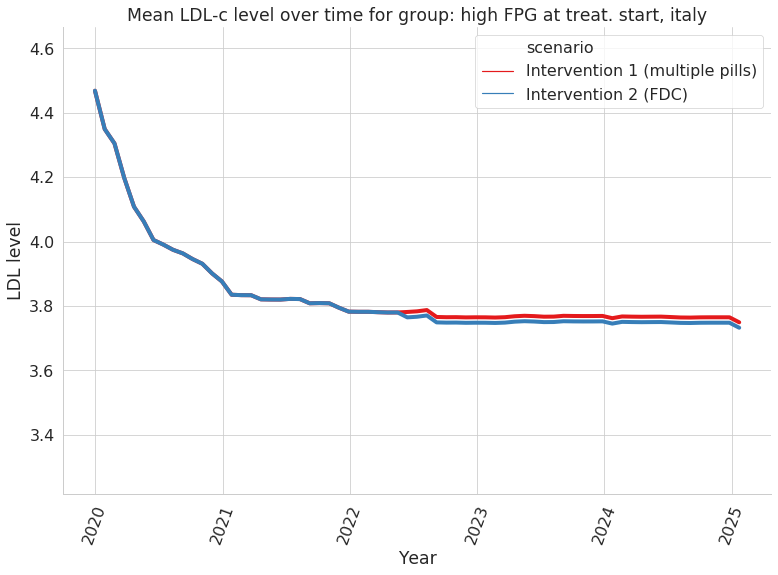

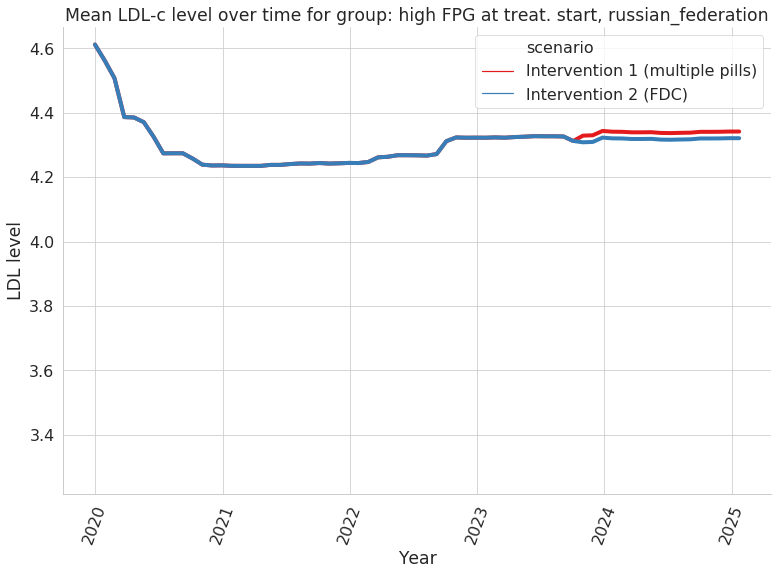

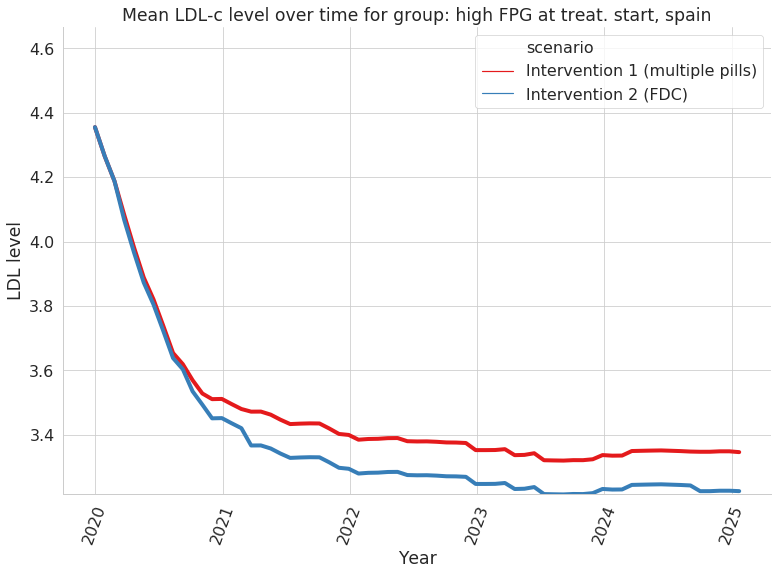

<Figure size 914.4x619.2 with 0 Axes>

In [83]:
def plot_high_fpg_sim_start(high_fpg_group,locations):
    df = high_fpg_group.groupby(['time','location','scenario']).ldl.mean().reset_index()
    with PdfPages(str(save_path_j)+f'/ldl_c_plots/high_fpg_mean_ldl_c_over_time.pdf') as pdf:
        diff_upper = df.ldl.max()
        diff_lower = df.ldl.min()
        
        for location in locations:
            df_plot = df[(df.location == location)]

            g = sns.lineplot(x='time', y='ldl', hue = 'scenario',
                             linewidth=4, data=df_plot)

            g.set_title(f'Mean LDL-c level over time for group: high FPG at treat. start, {location}')
            plt.xticks(rotation=70)
            g.set_xlabel('Year')
            g.set_ylabel(f'LDL level')
            g.set_ylim(diff_lower,diff_upper)
            pdf.savefig(orientation = 'landscape', bbox_inches='tight')

            plt.show()
            plt.clf() 

plot_high_fpg_sim_start(high_fpg_group,locations)    


In [ ]:
high_sbp_sim_start = scenarios_df[(scenarios_df.time=='2020-01-01T00:00:00.000000000') & (scenarios_df.sbp >=140.0)]
array_high_sbp = high_sbp_sim_start['simulant'].unique()
list_high_sbp = list(array_high_sbp)

def get_high_sbp_simulants(scenarios_df):
    sbp_df = pd.DataFrame([])
    for simulant in list_high_sbp:
        outcome = scenarios_df[(scenarios_df.simulant == simulant)]
        sbp_df = sbp_df.append(outcome)
    return sbp_df
        
high_sbp_group = get_high_sbp_simulants(scenarios_df)

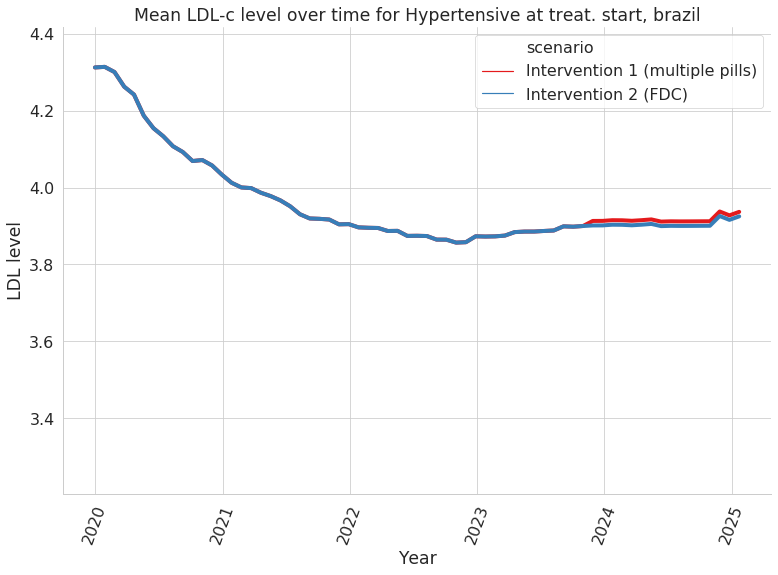

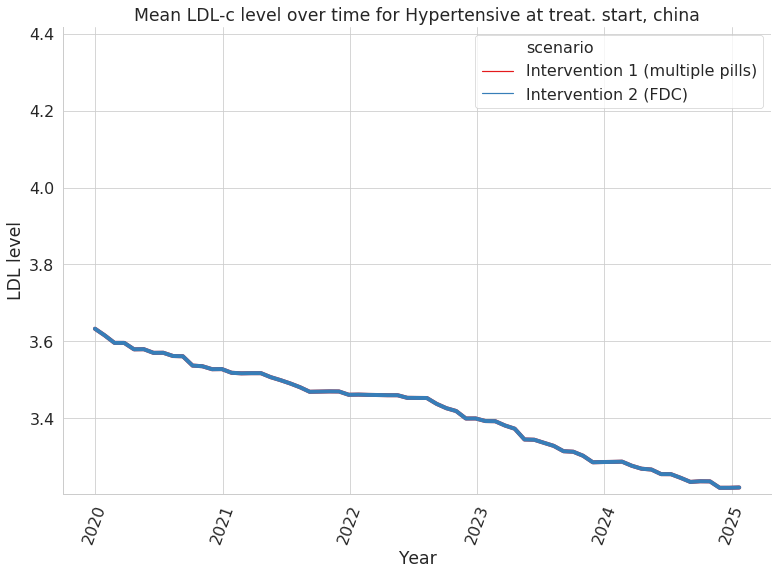

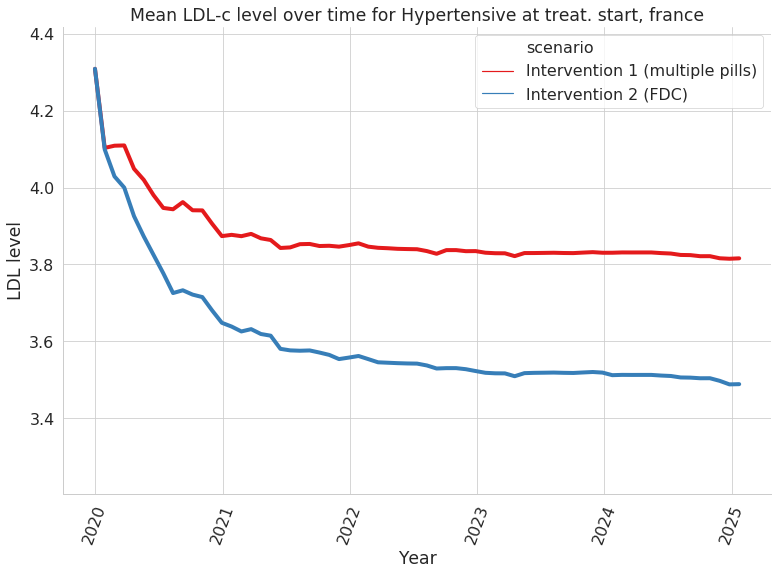

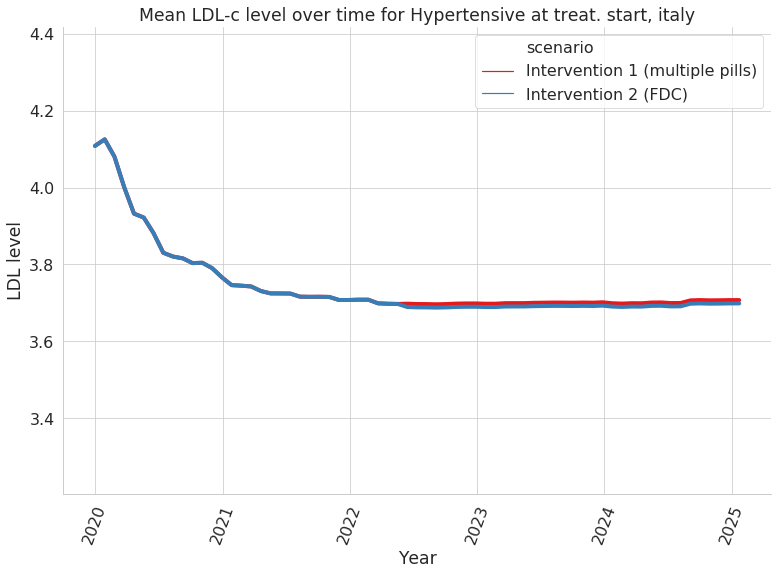

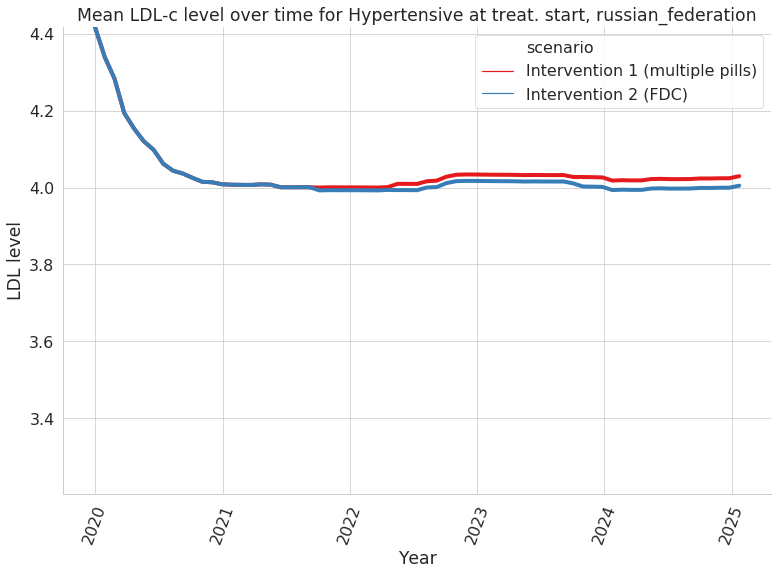

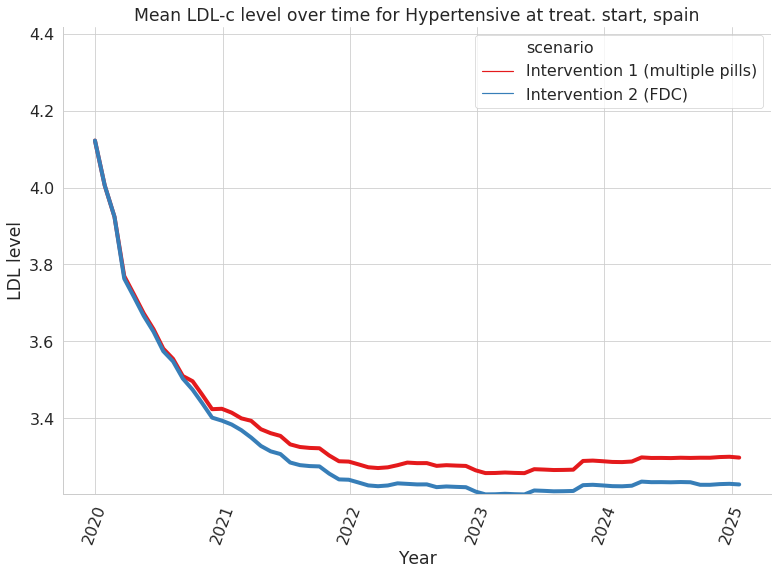

<Figure size 914.4x619.2 with 0 Axes>

In [86]:
def plot_high_sbp_sim_start(high_sbp_group,locations):
    df = high_sbp_group.groupby(['time','location','scenario']).ldl.mean().reset_index()
    with PdfPages(str(save_path_j)+f'/ldl_c_plots/high_sbp_mean_ldl_c_over_time.pdf') as pdf:
        diff_upper = df.ldl.max()
        diff_lower = df.ldl.min()
        
        for location in locations:
            df_plot = df[(df.location == location)]

            g = sns.lineplot(x='time', y='ldl', hue = 'scenario',
                             linewidth=4, data=df_plot)

            g.set_title(f'Mean LDL-c level over time for Hypertensive at treat. start, {location}')
            plt.xticks(rotation=70)
            g.set_xlabel('Year')
            g.set_ylabel(f'LDL level')
            g.set_ylim(diff_lower,diff_upper)
            pdf.savefig(orientation = 'landscape', bbox_inches='tight')

            plt.show()
            plt.clf() 

plot_high_sbp_sim_start(high_sbp_group,locations)

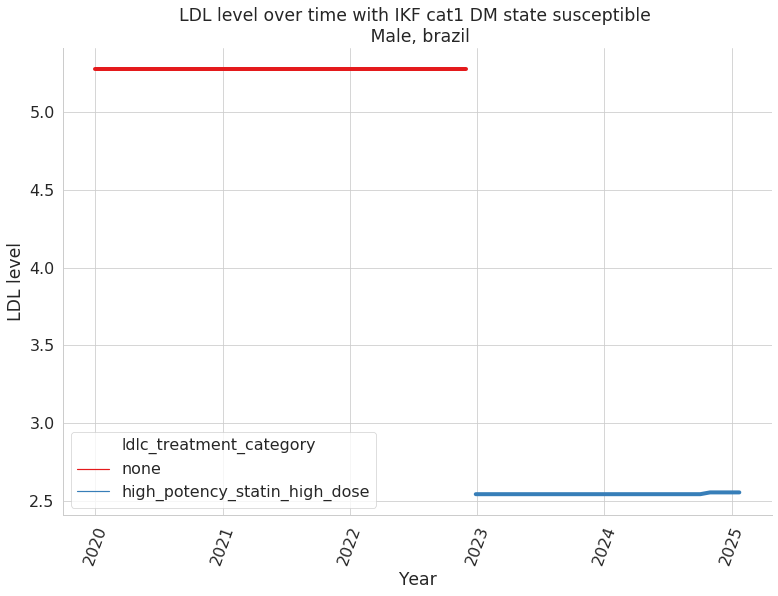

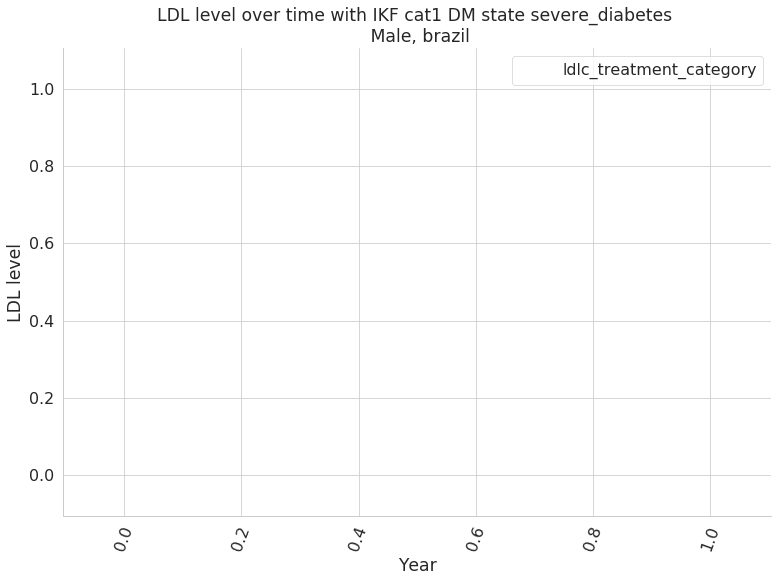

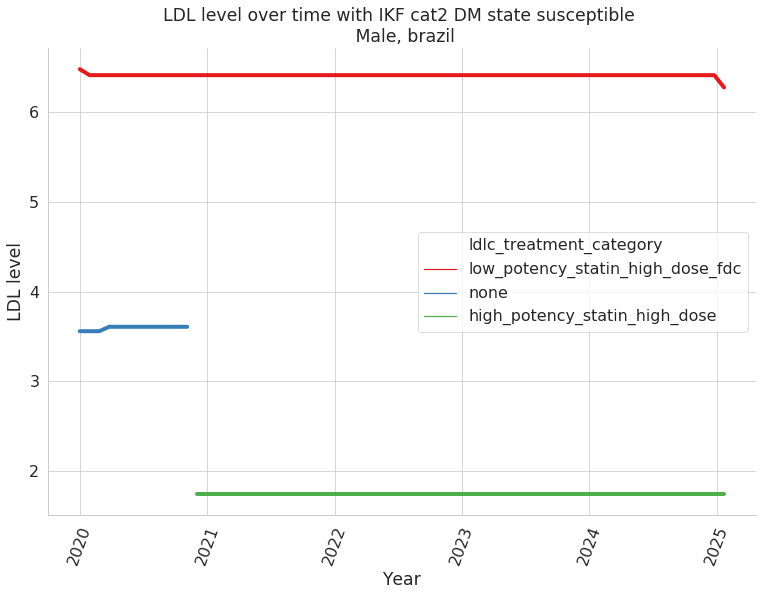

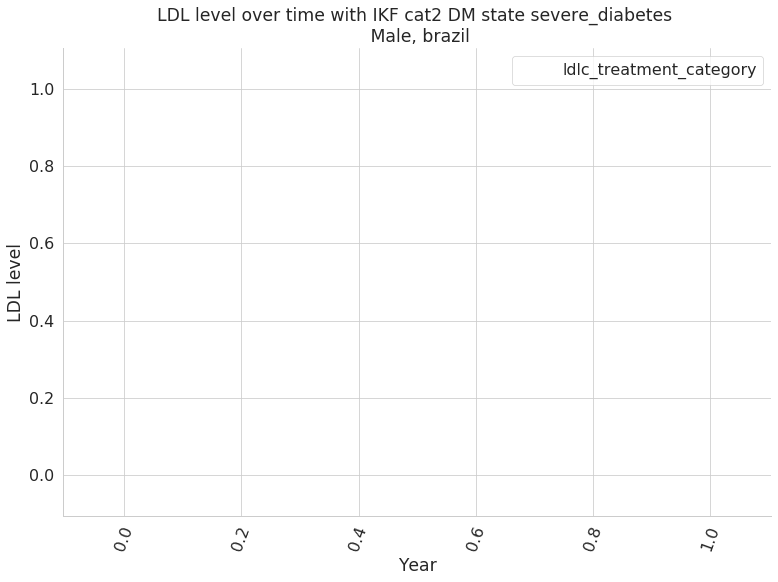

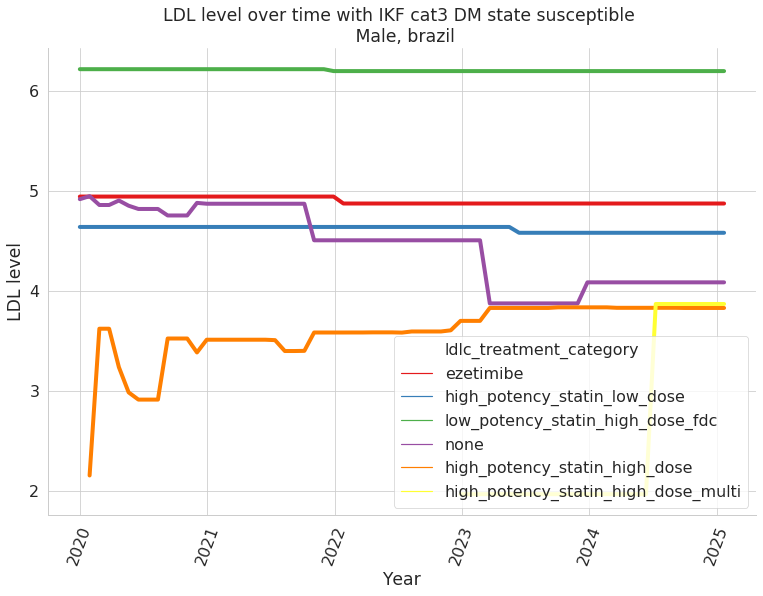

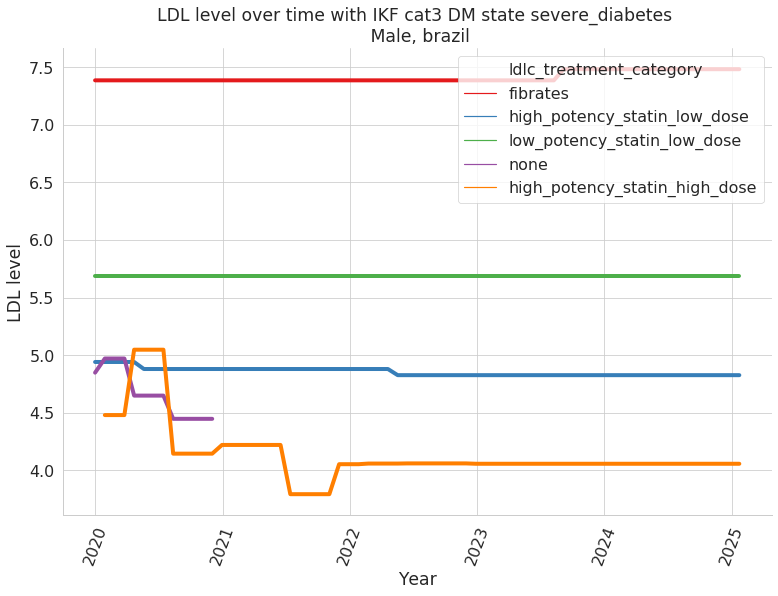

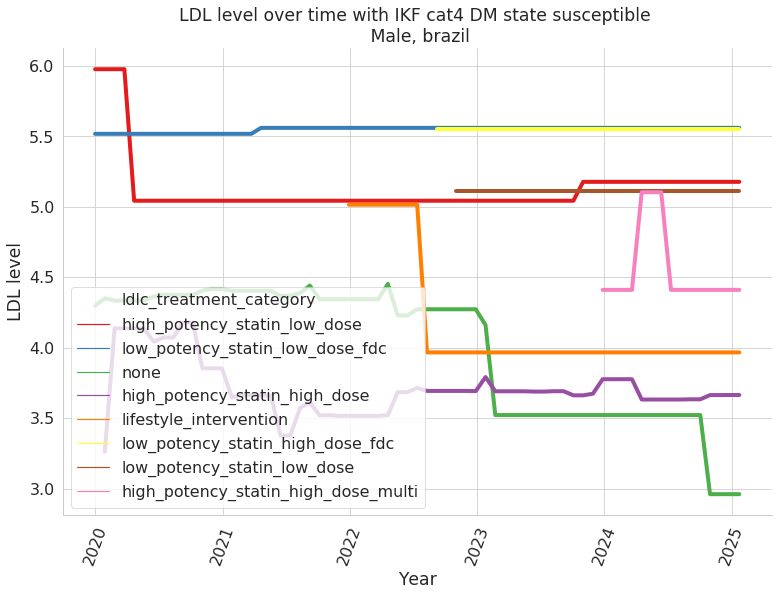

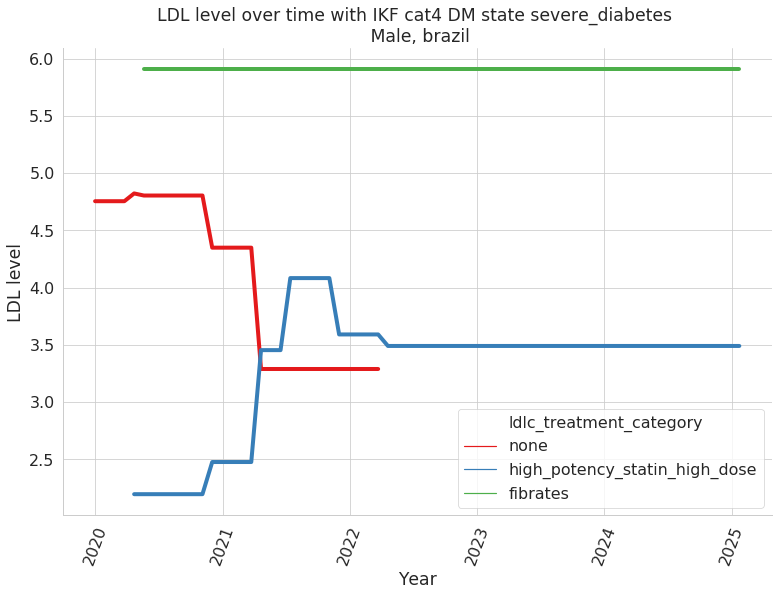

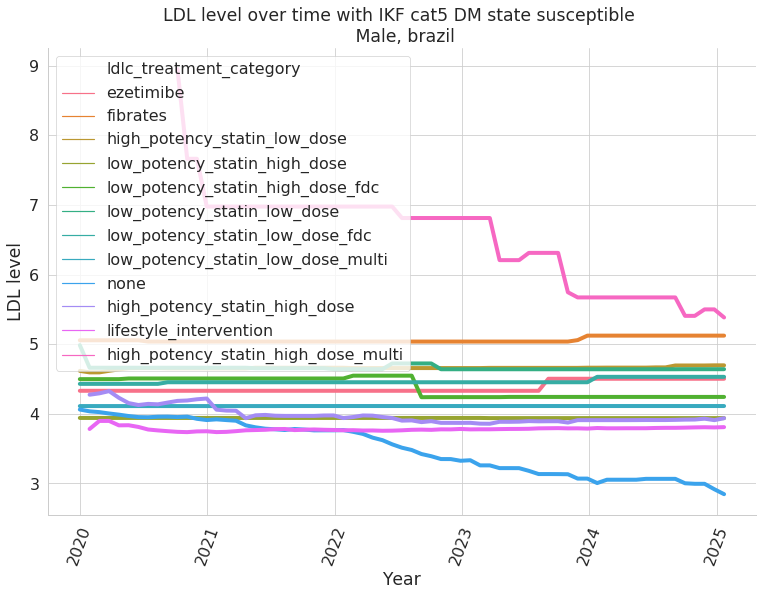

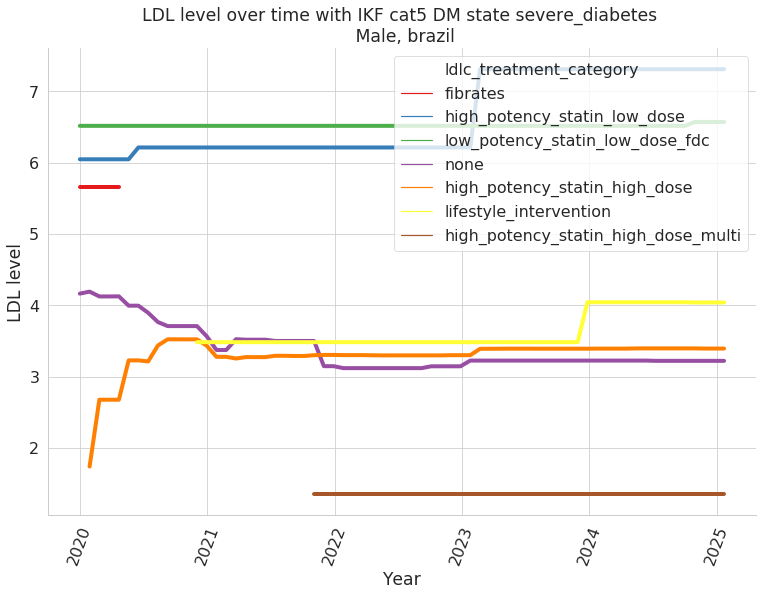

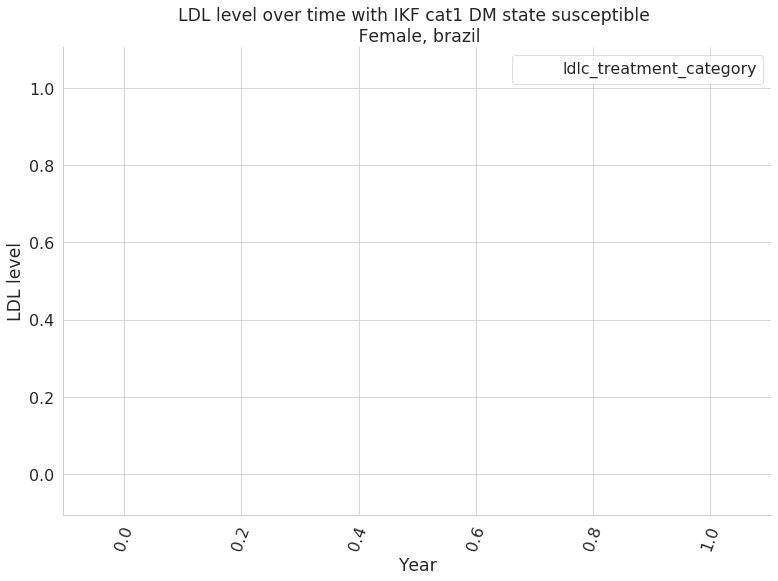

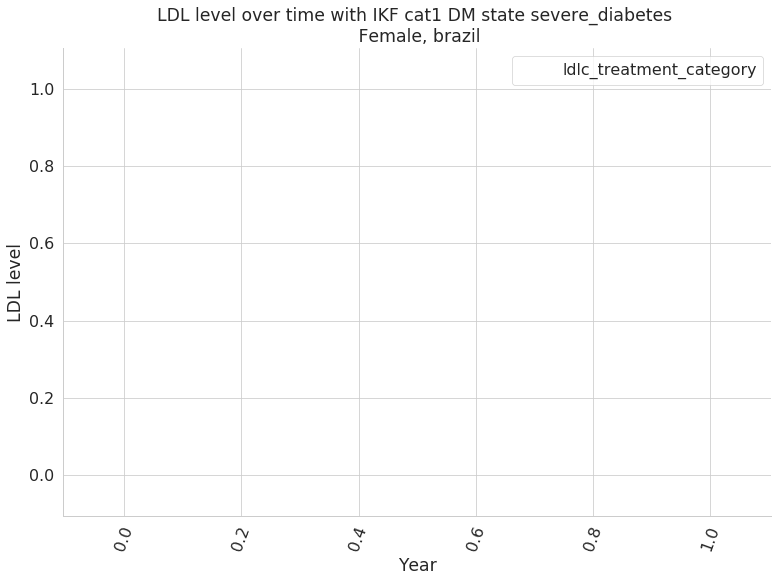

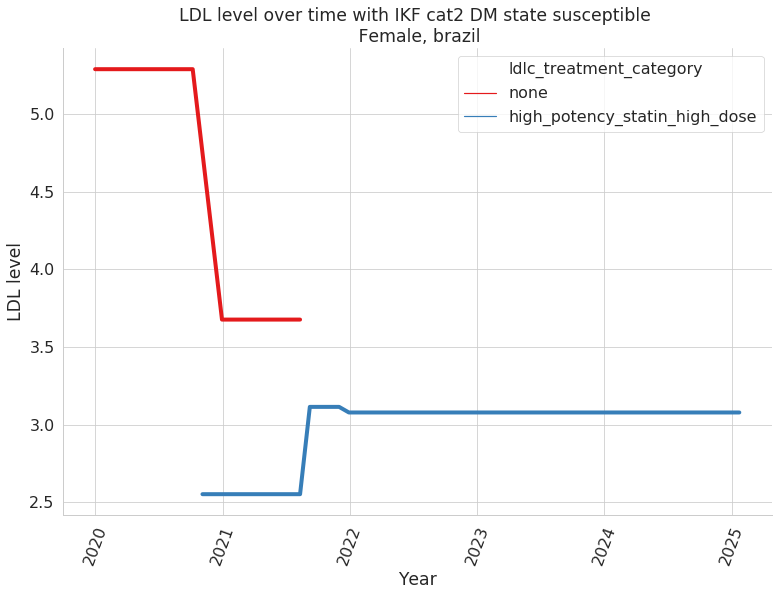

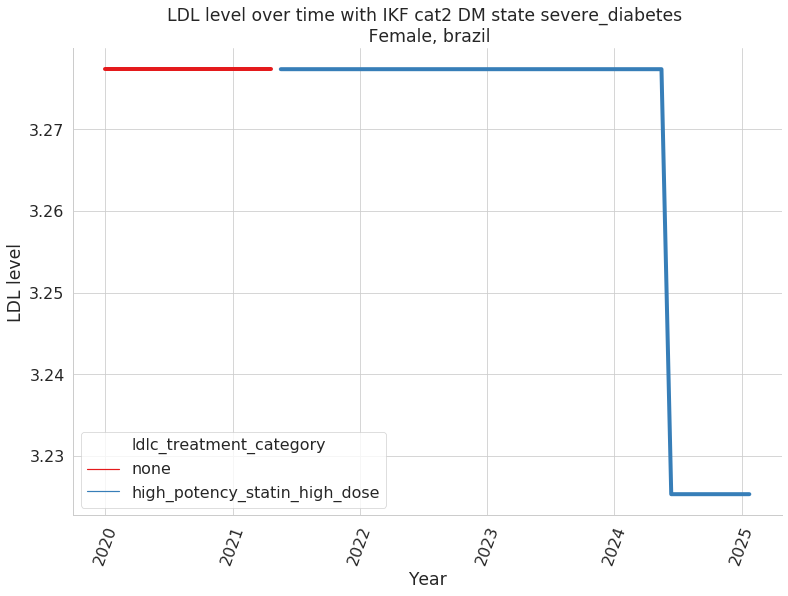

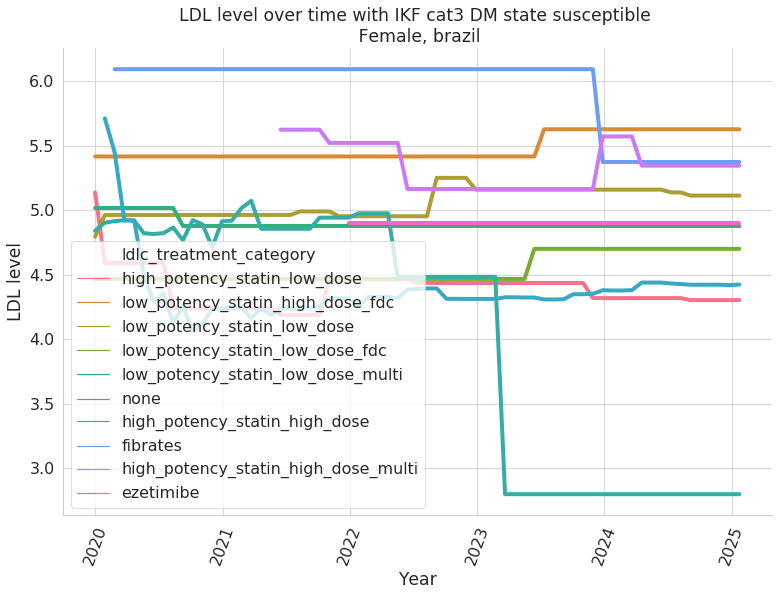

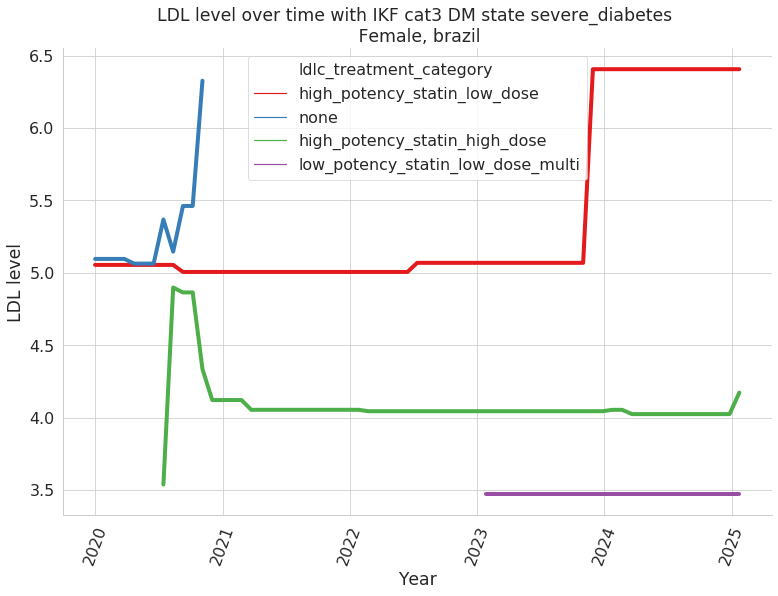

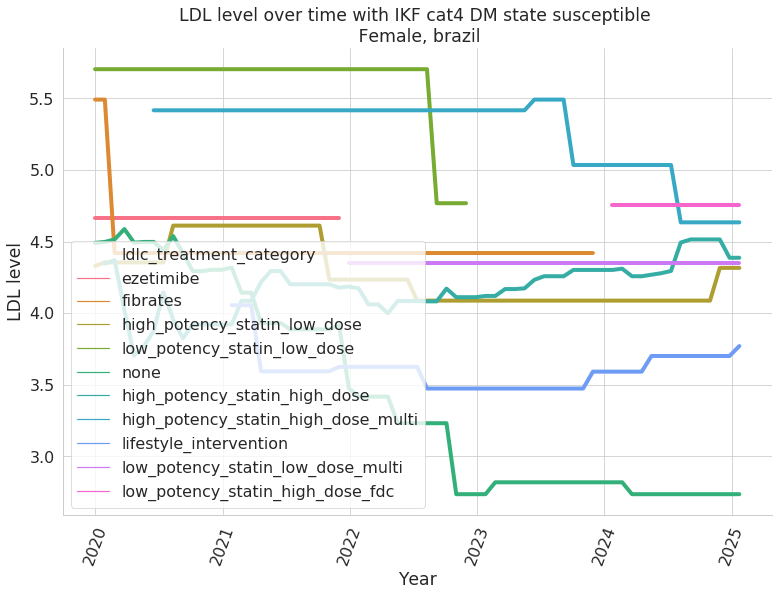

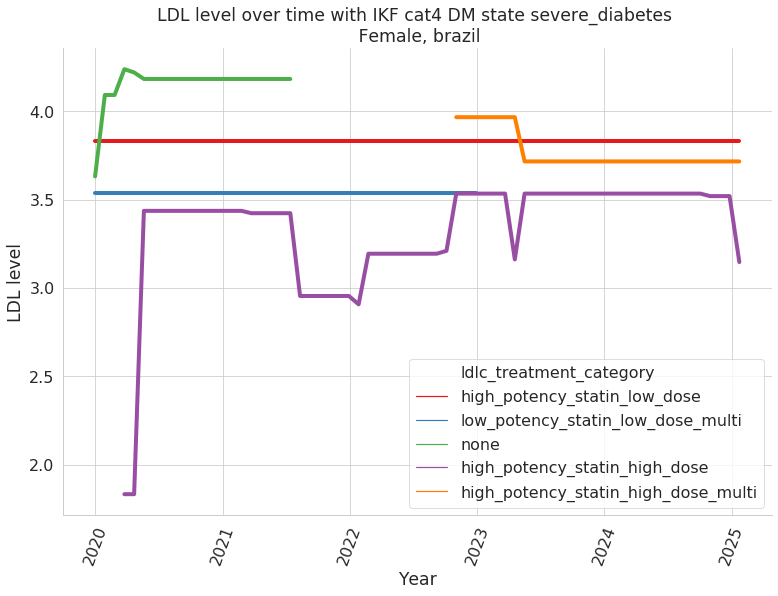

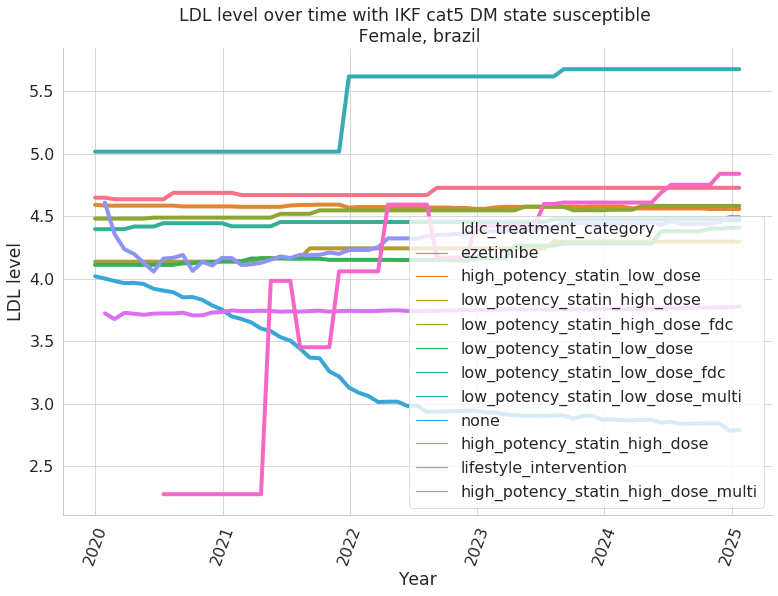

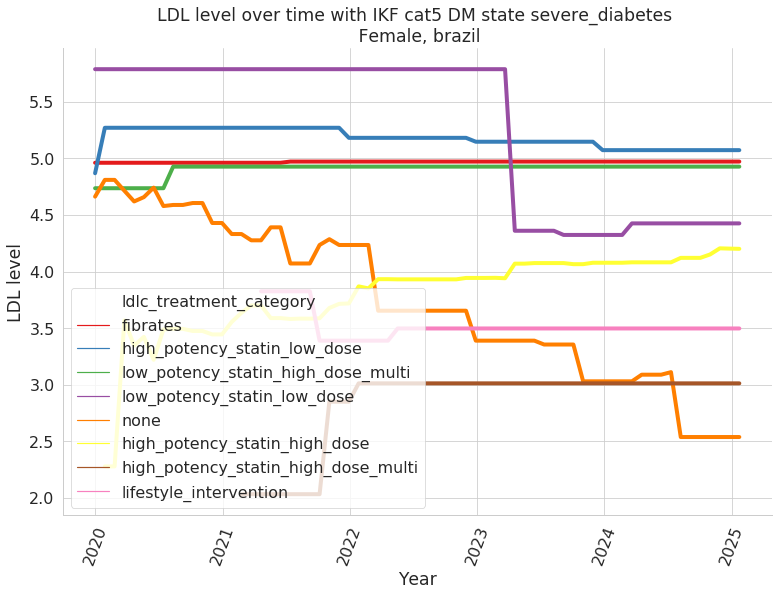

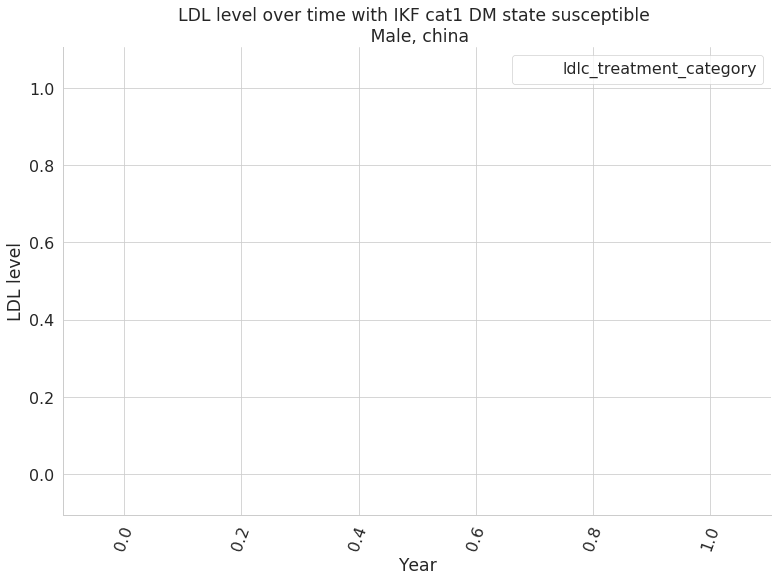

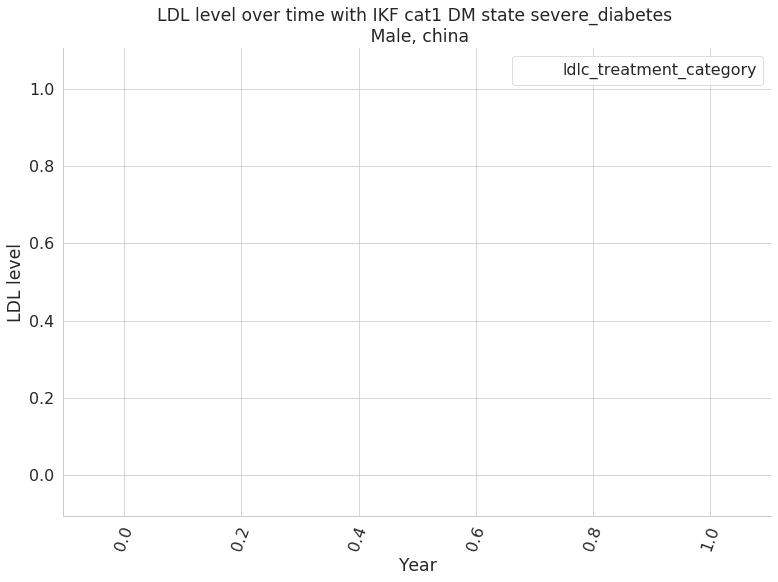

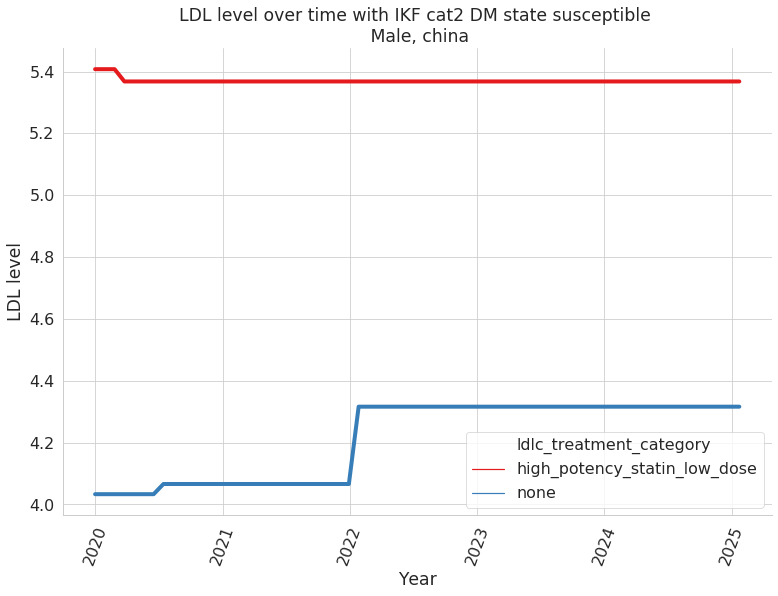

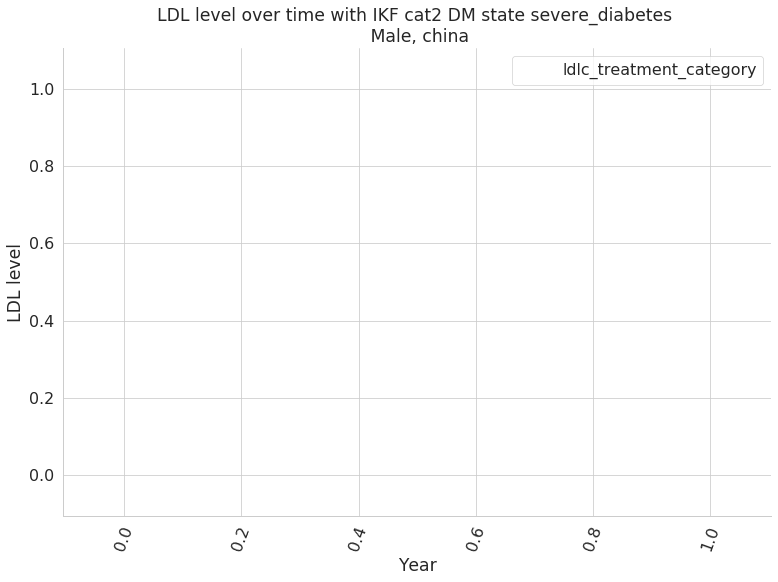

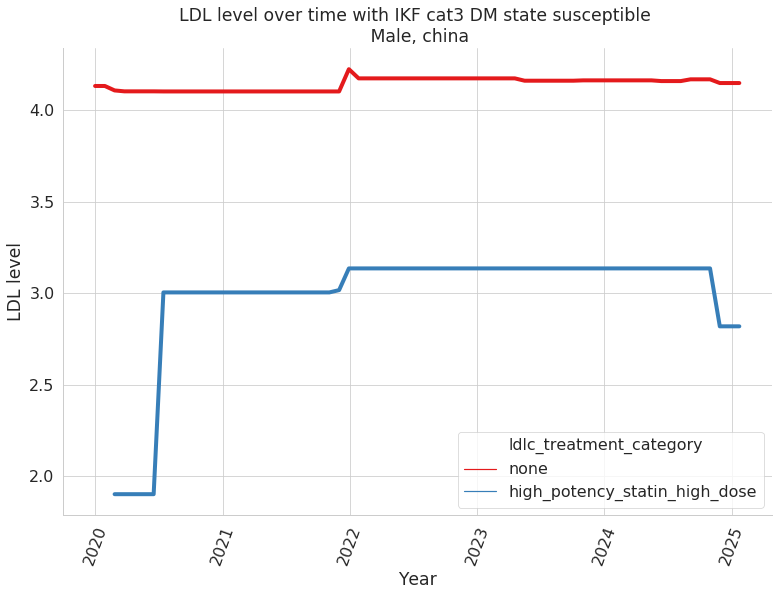

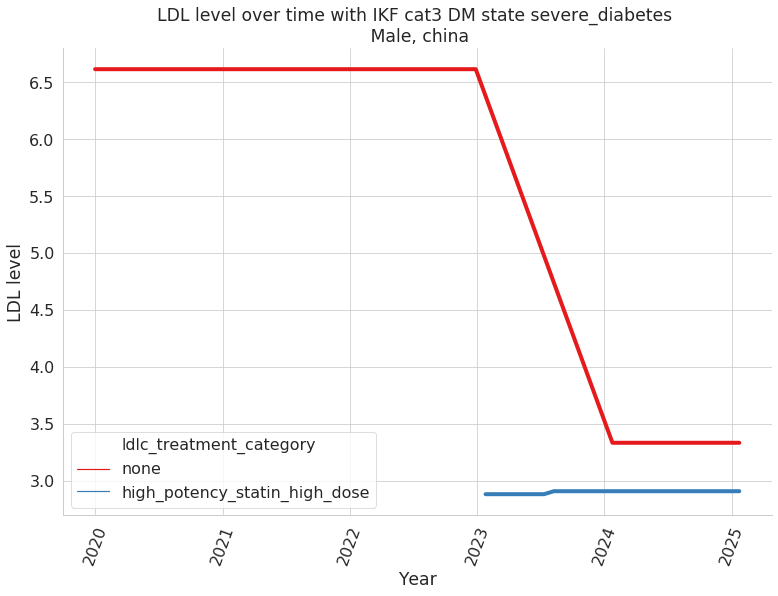

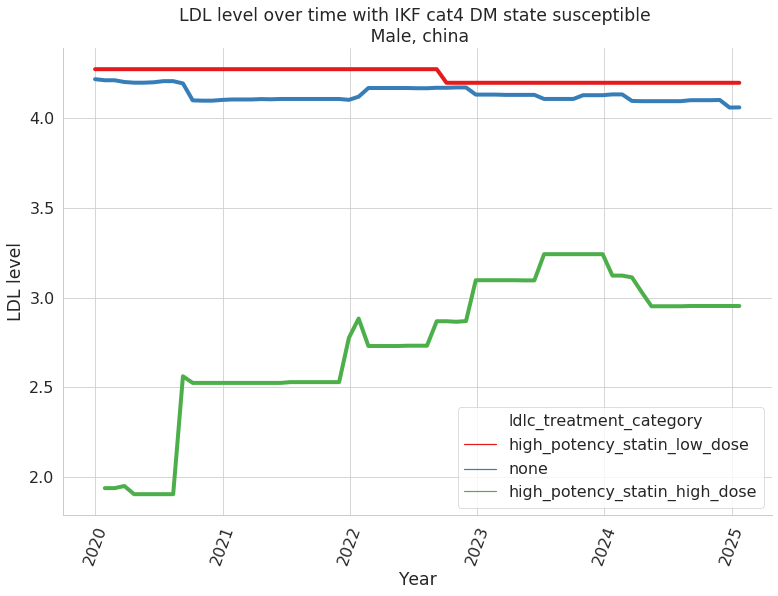

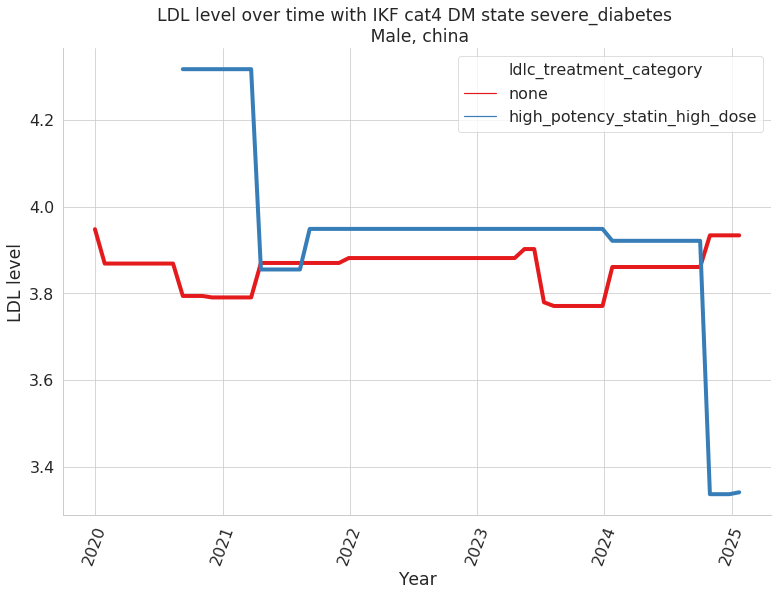

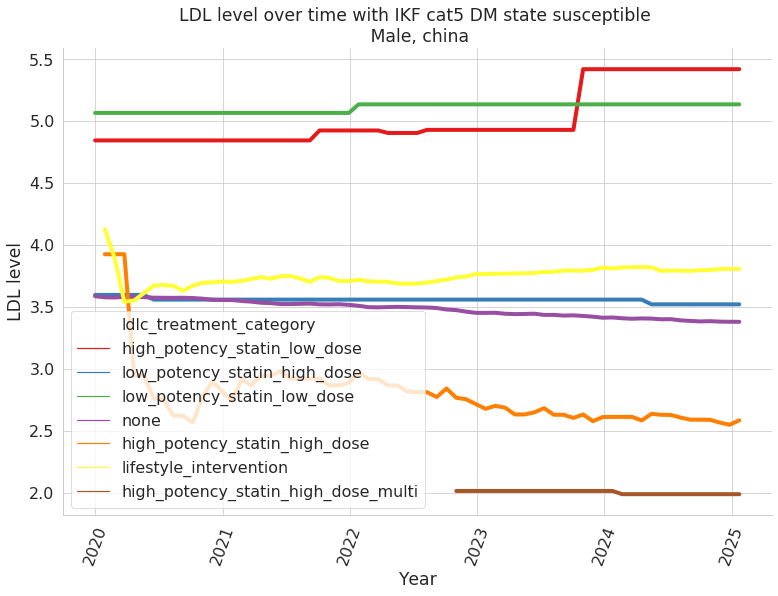

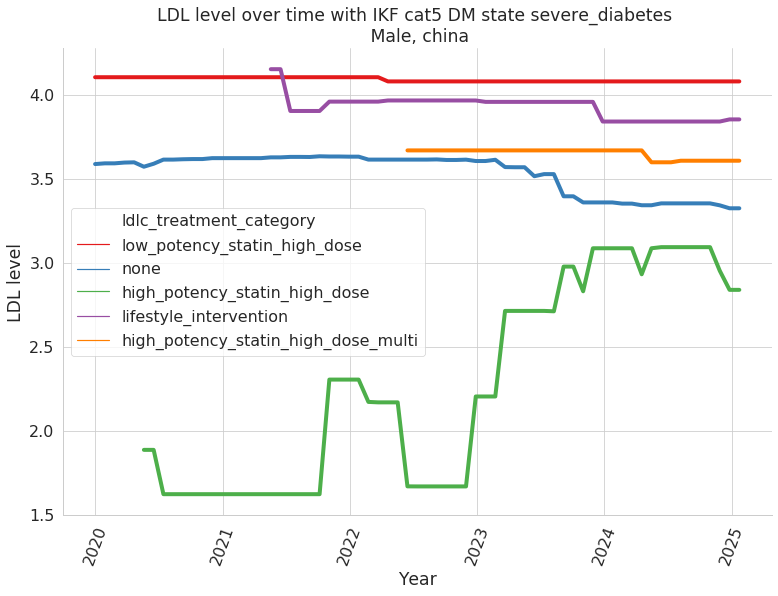

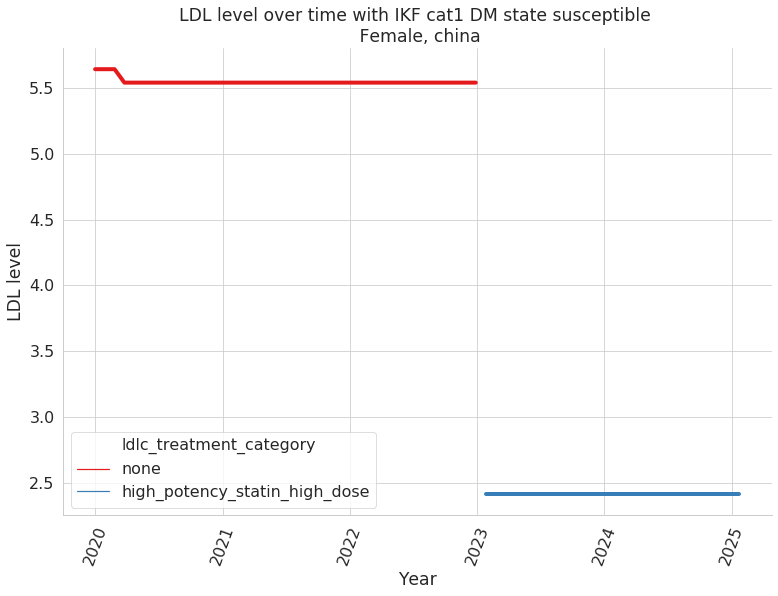

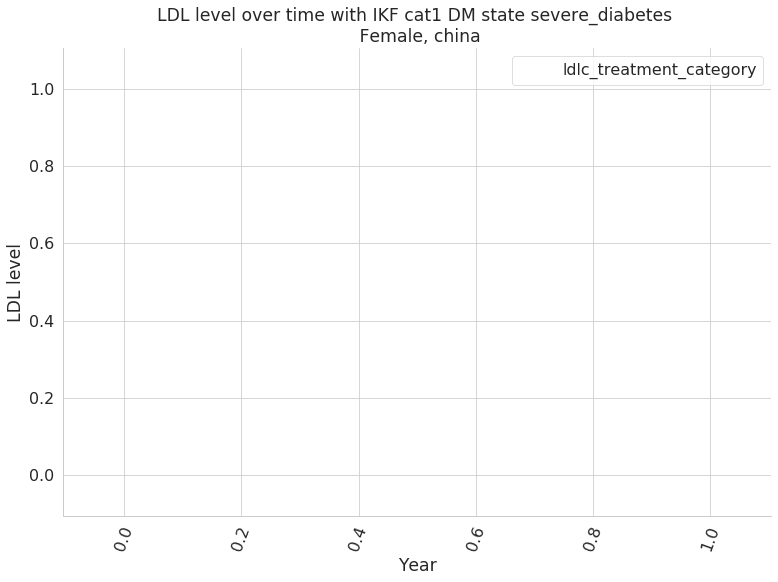

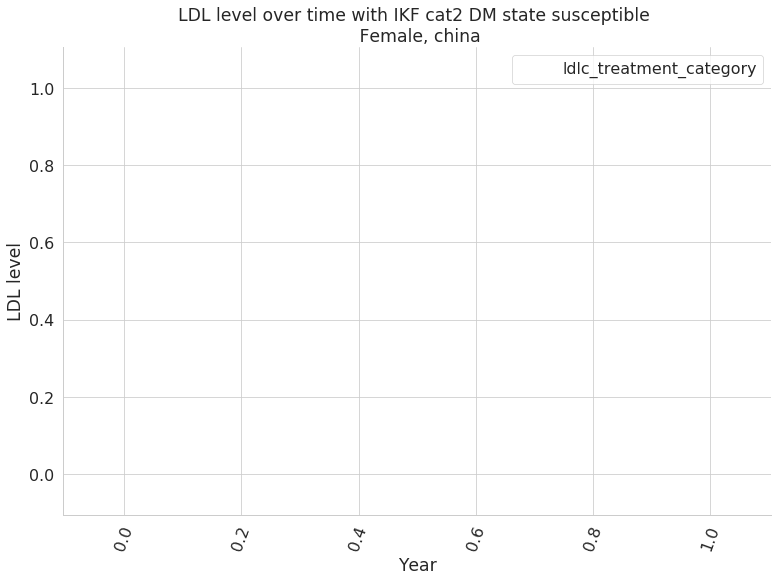

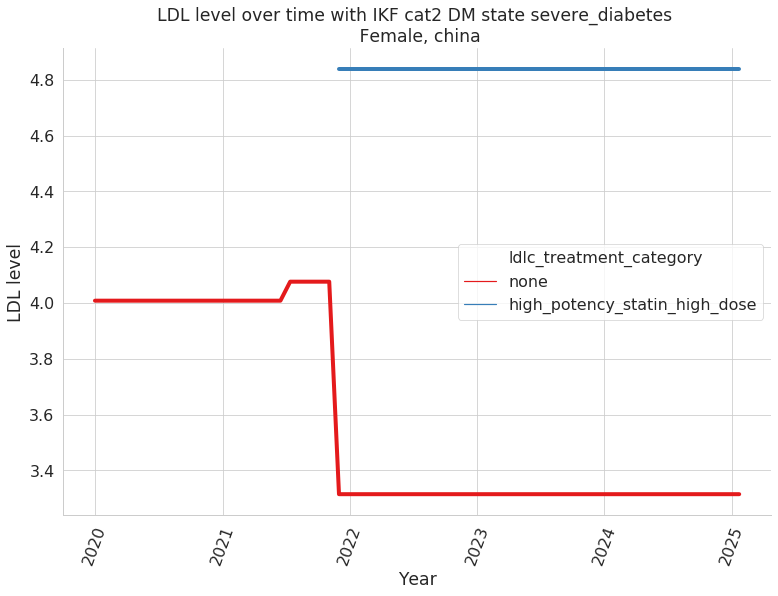

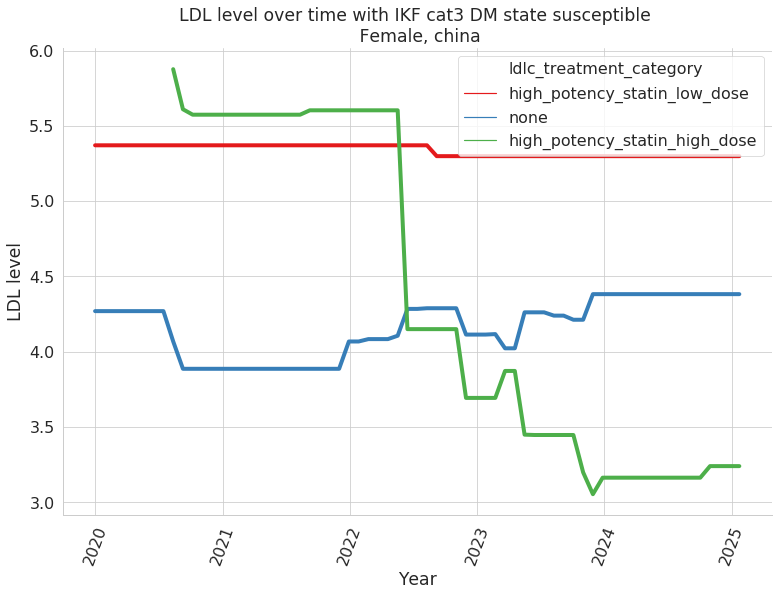

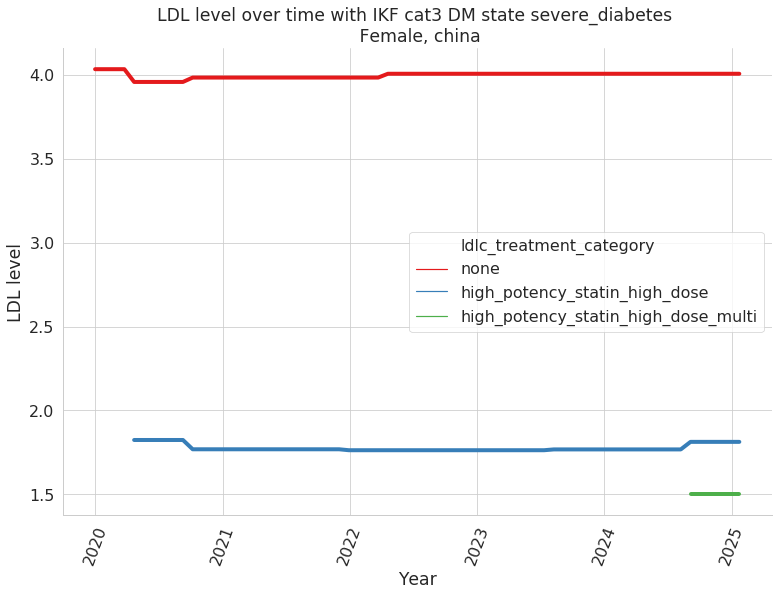

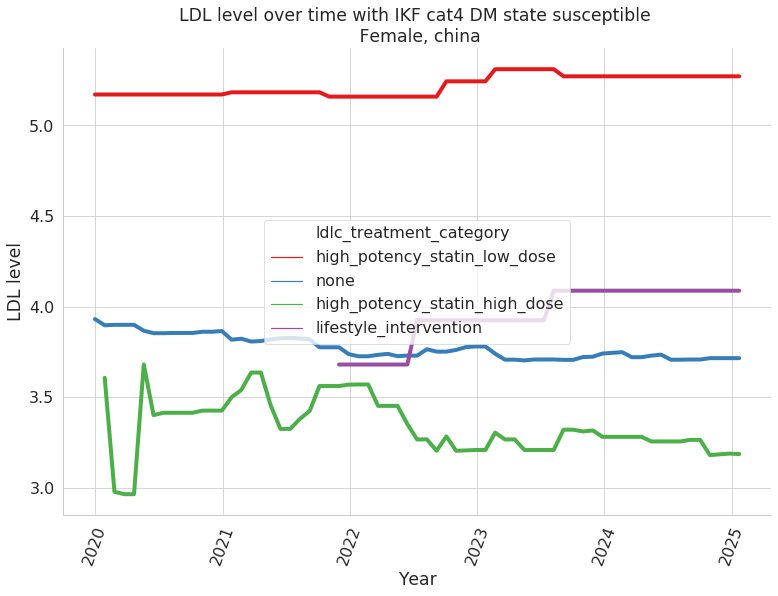

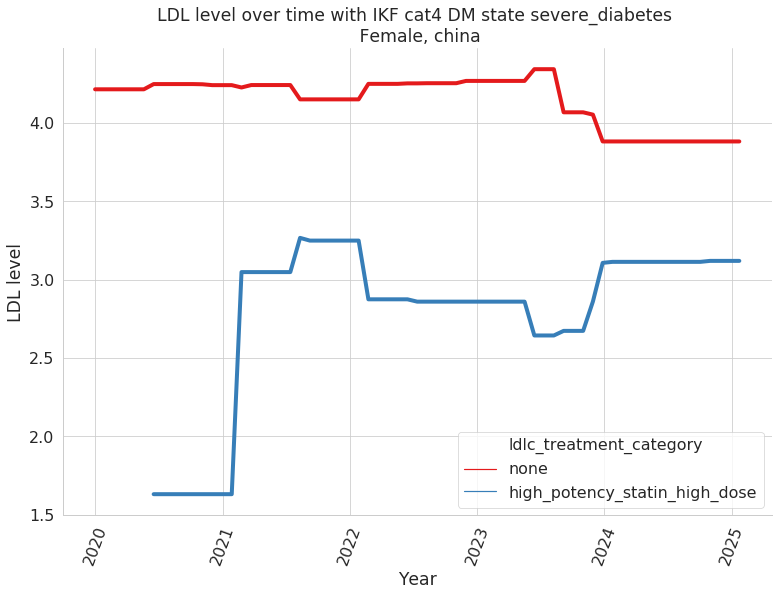

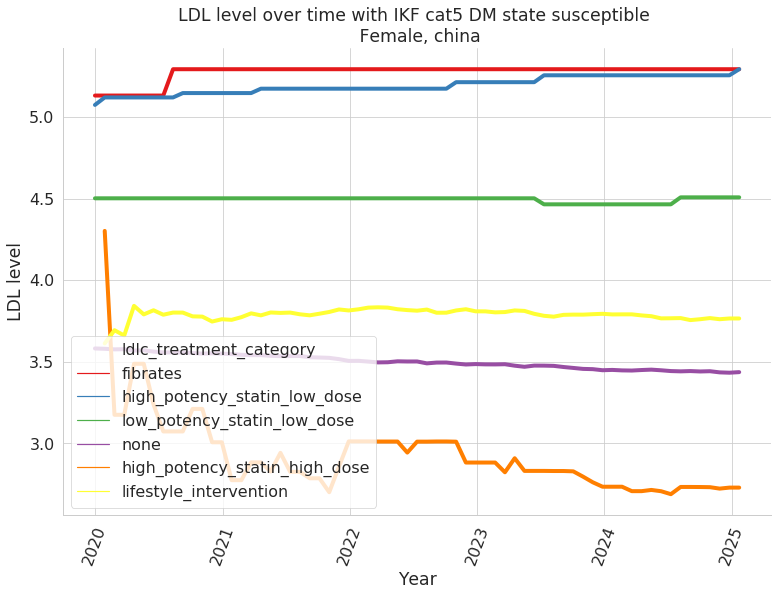

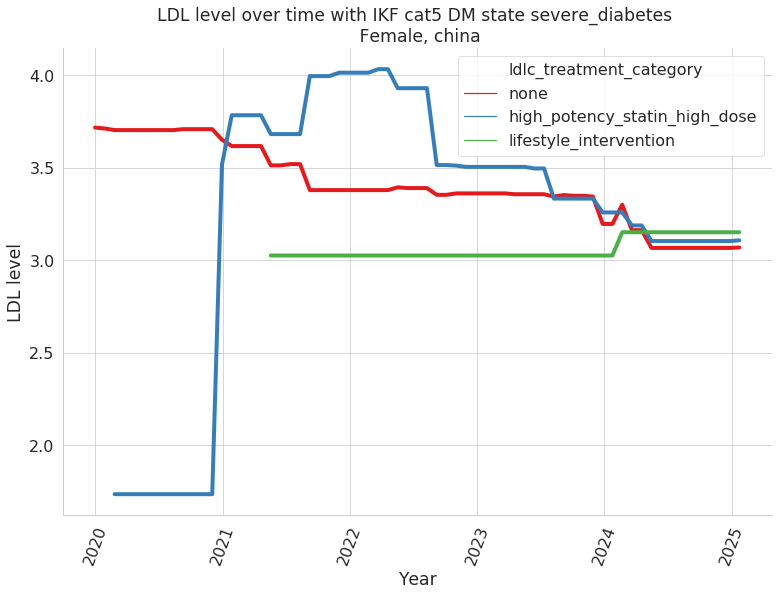

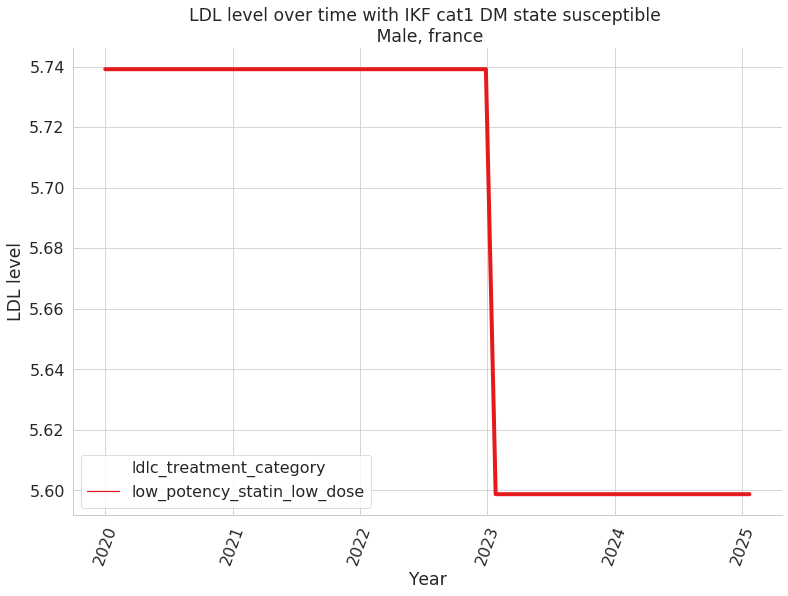

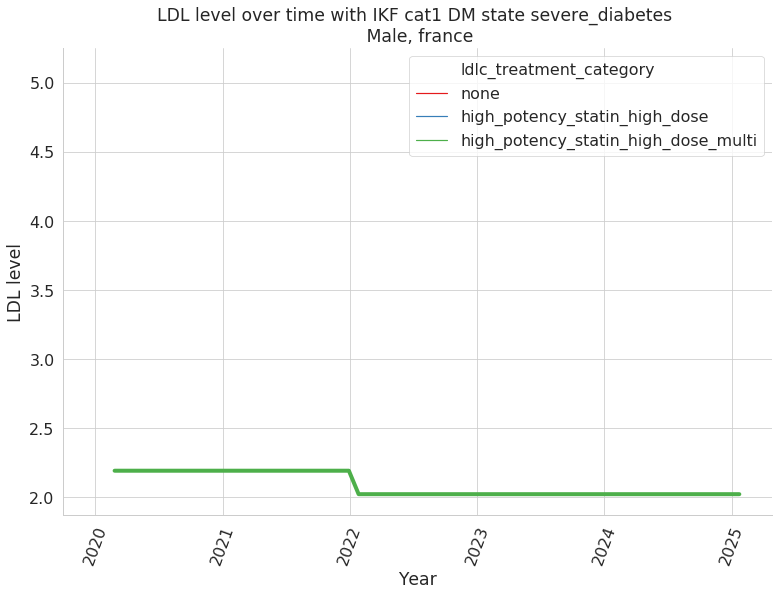

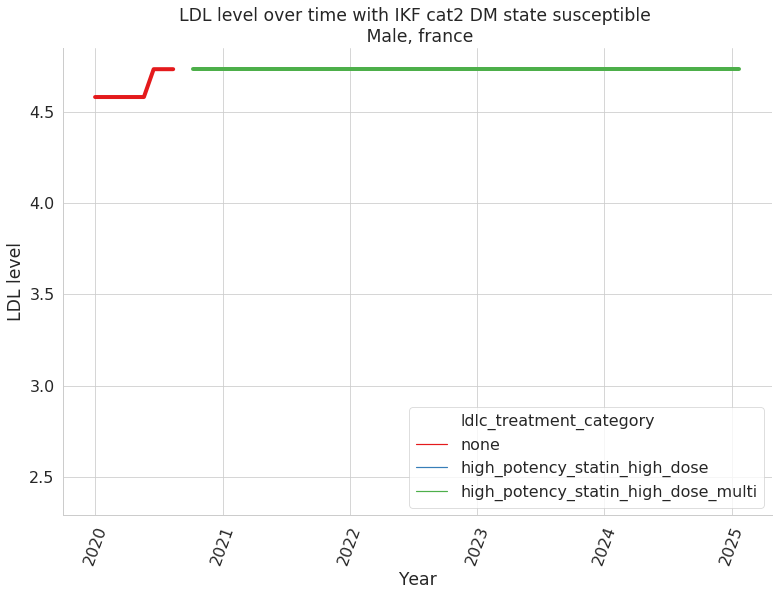

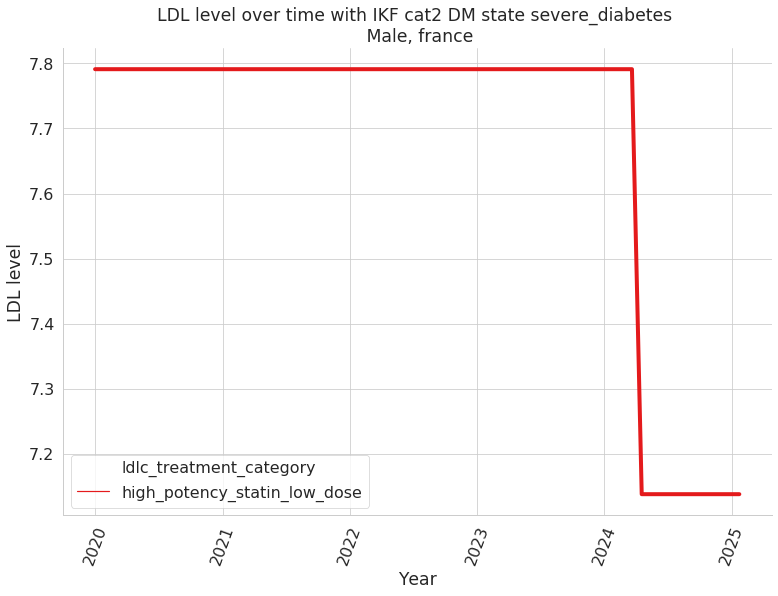

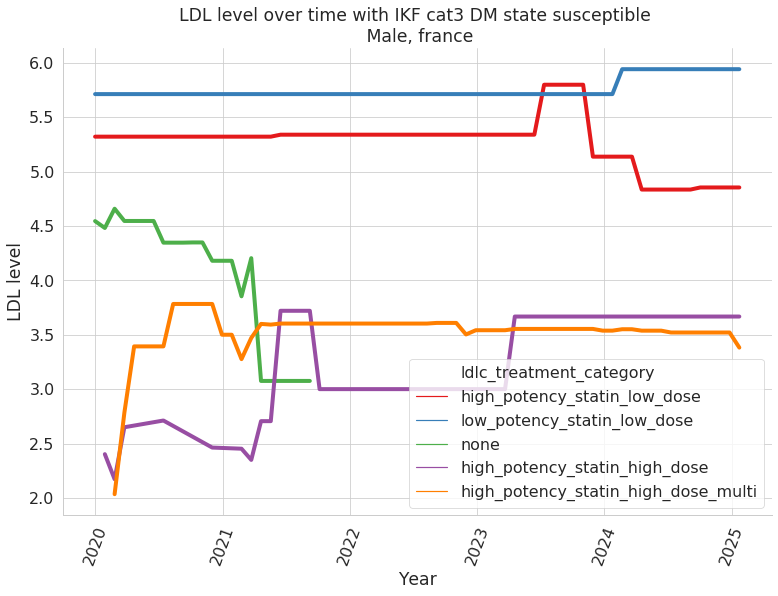

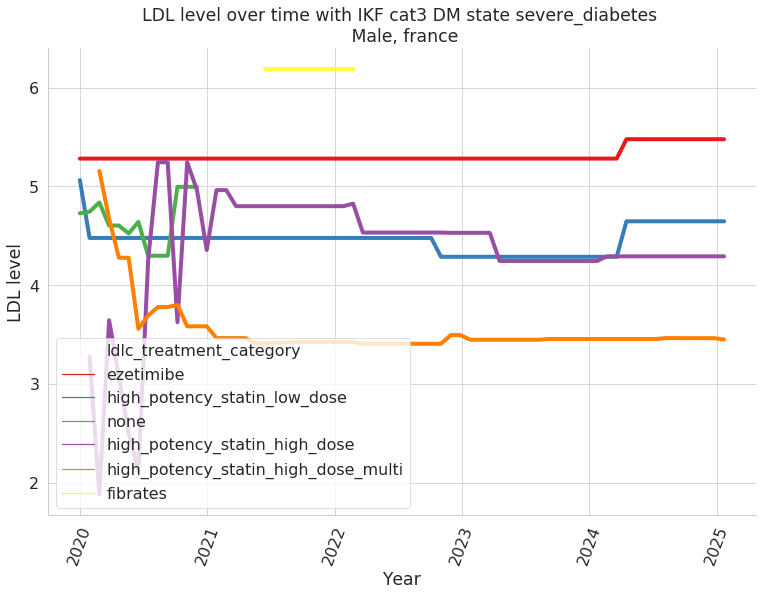

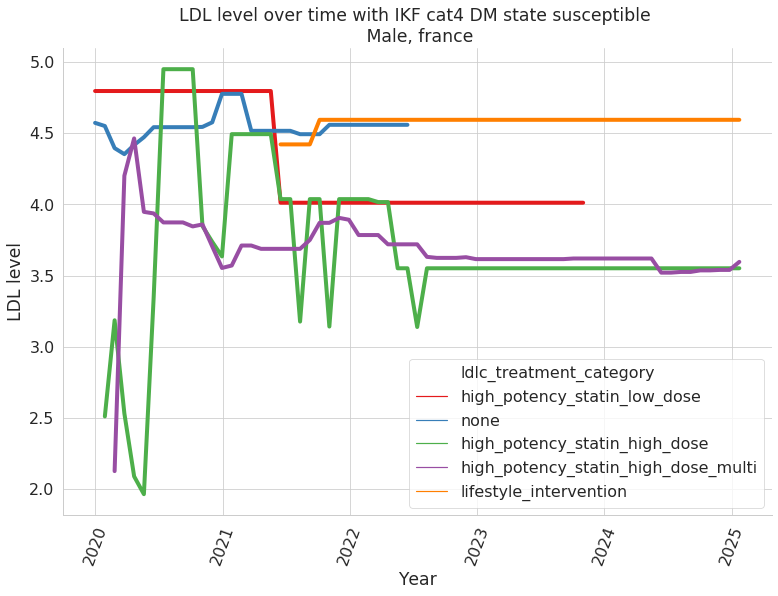

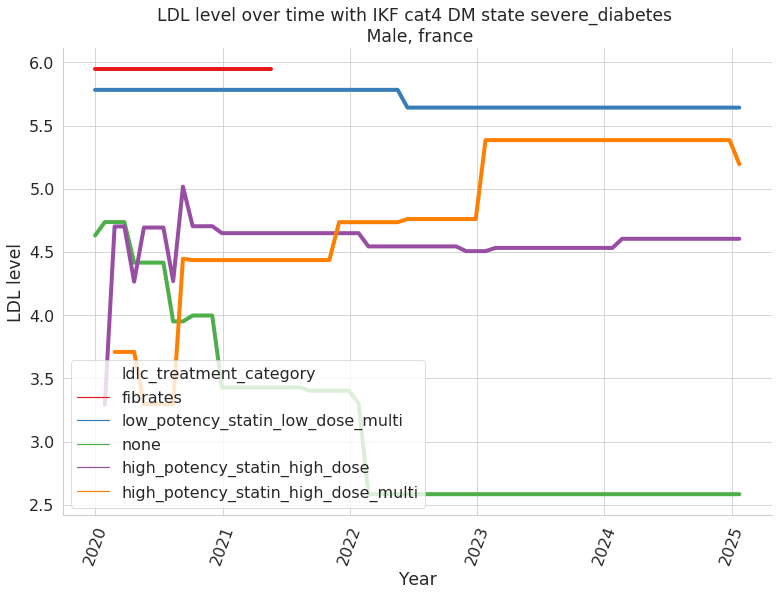

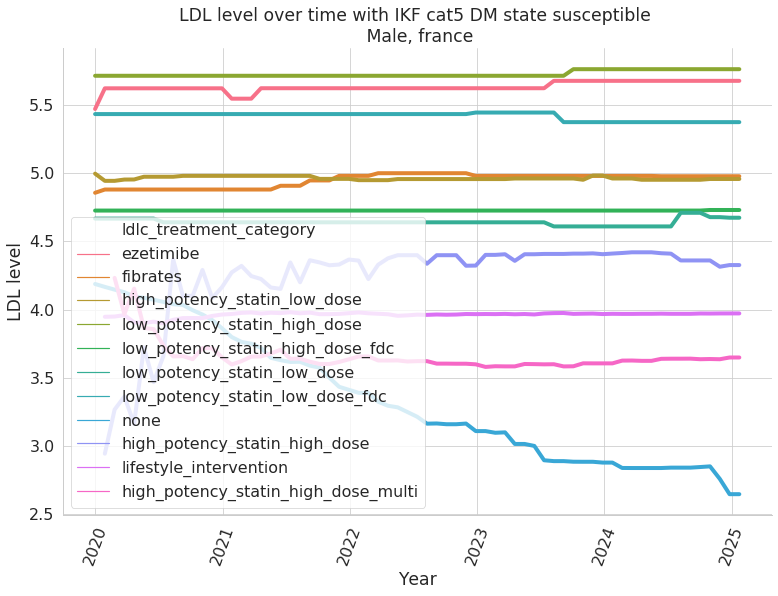

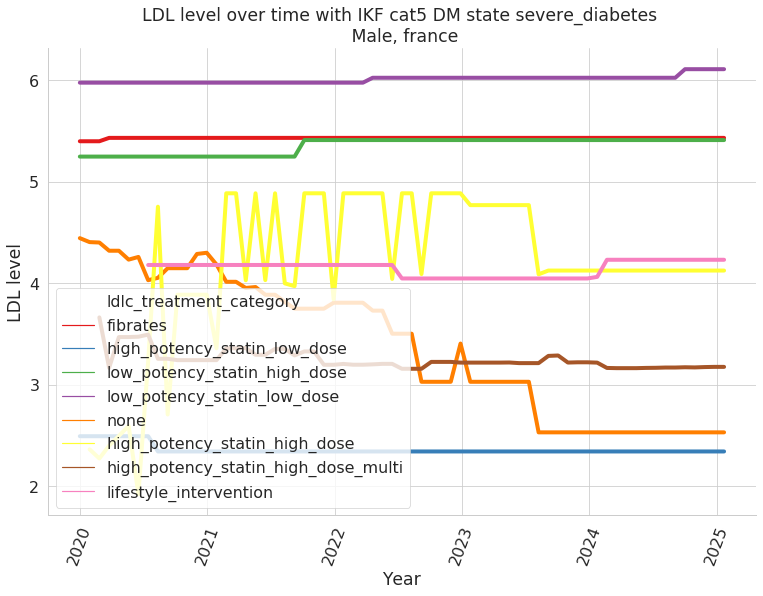

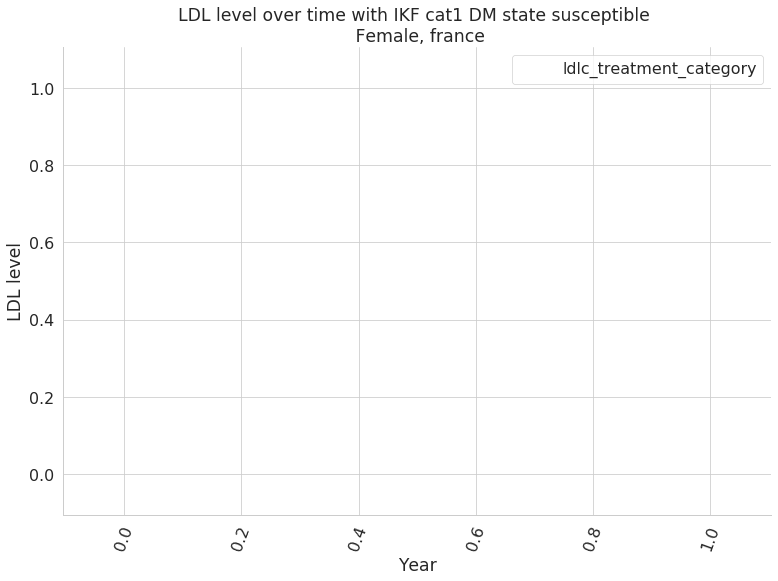

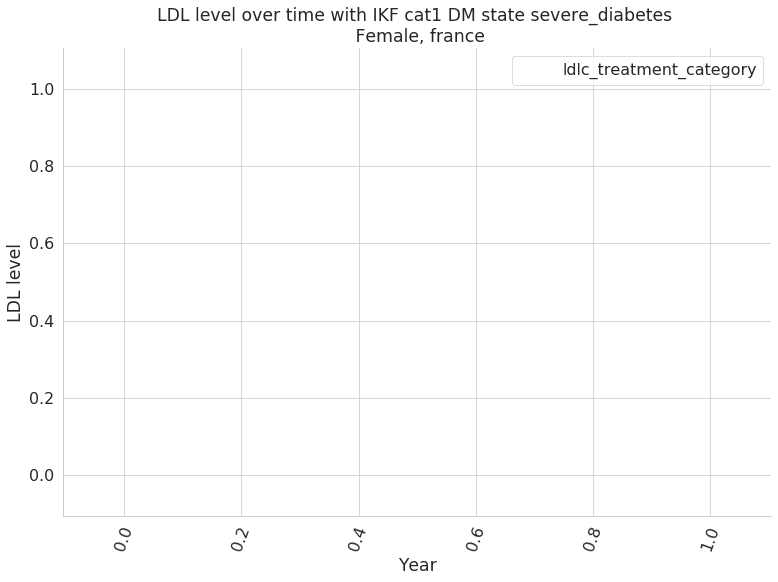

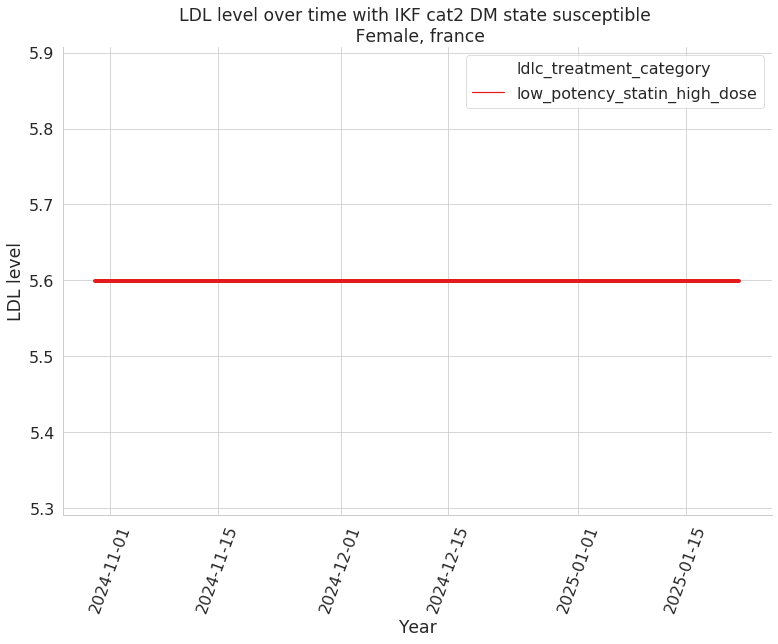

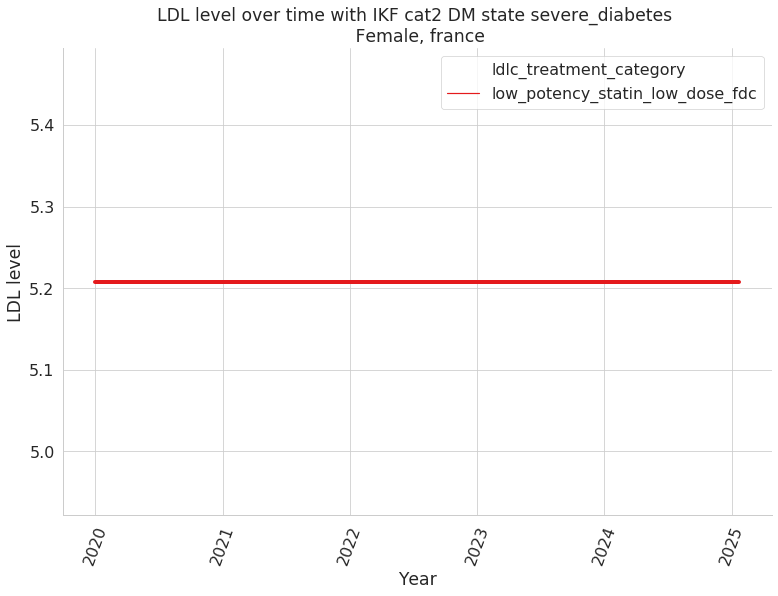

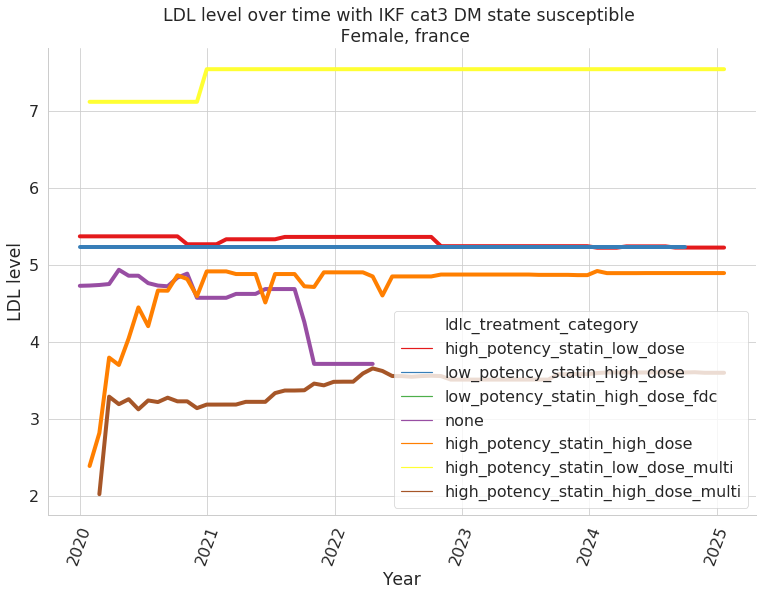

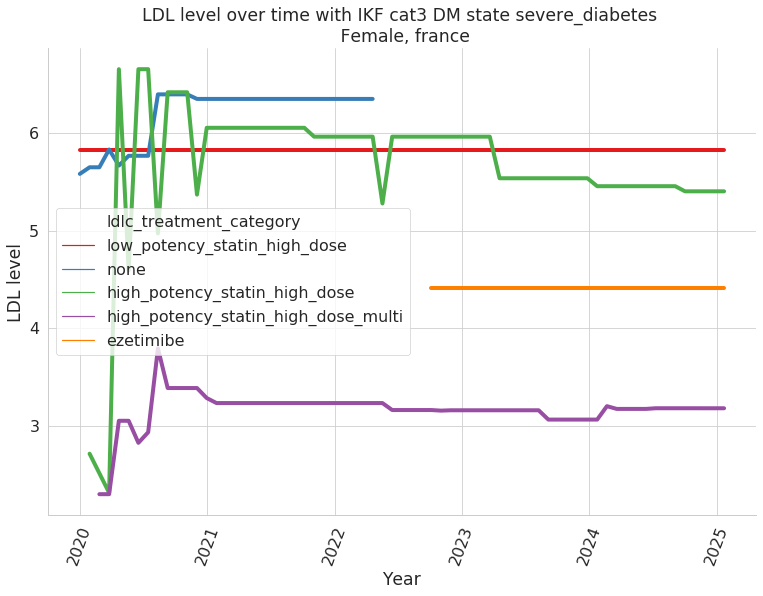

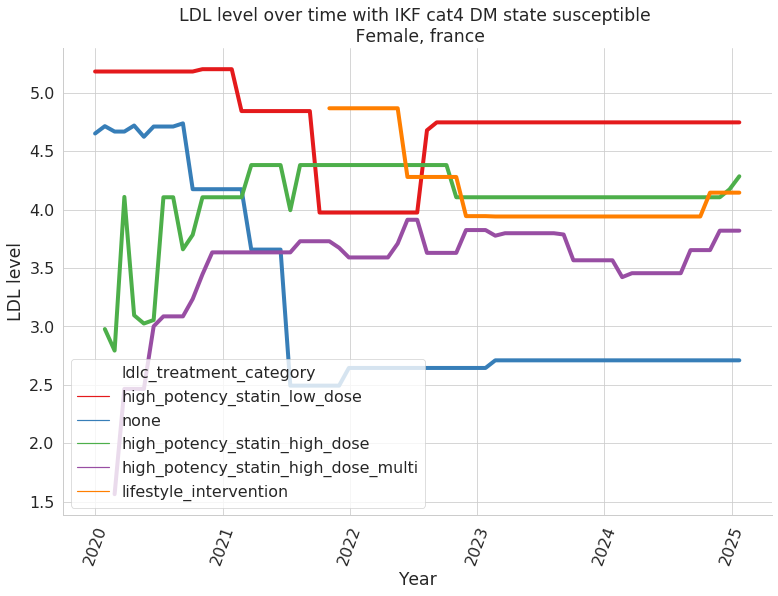

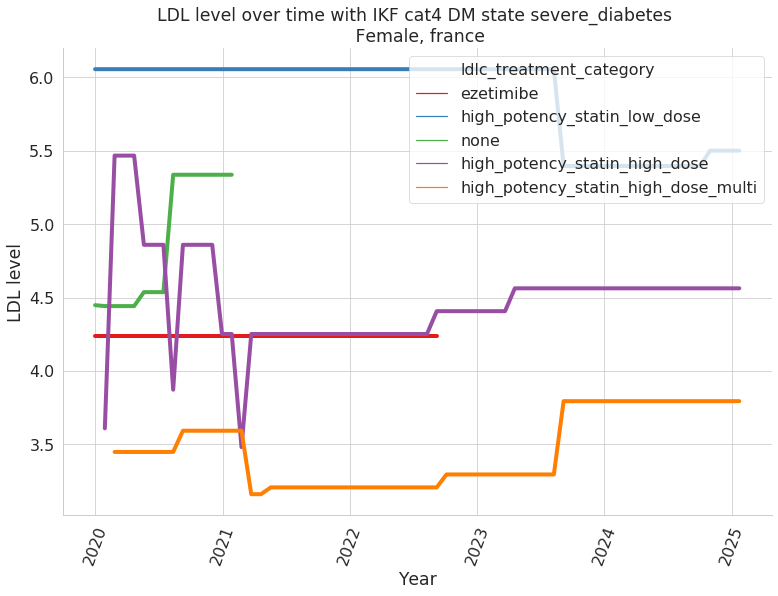

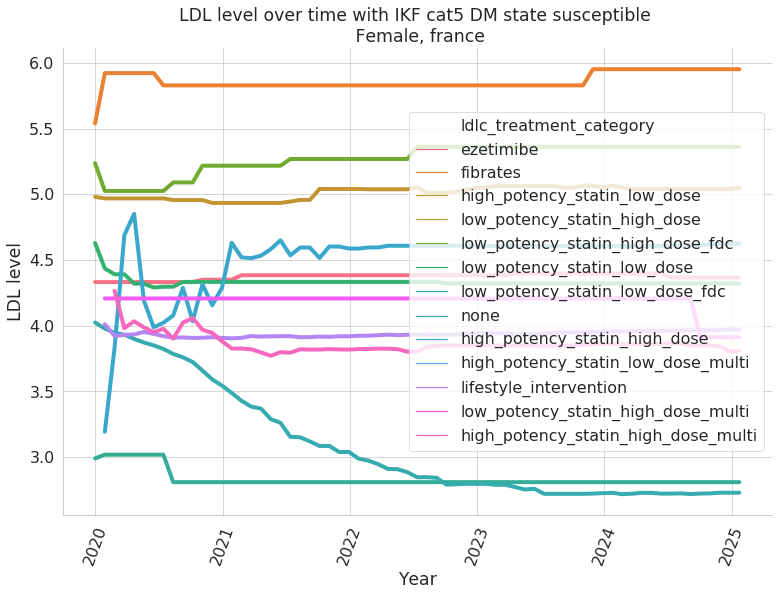

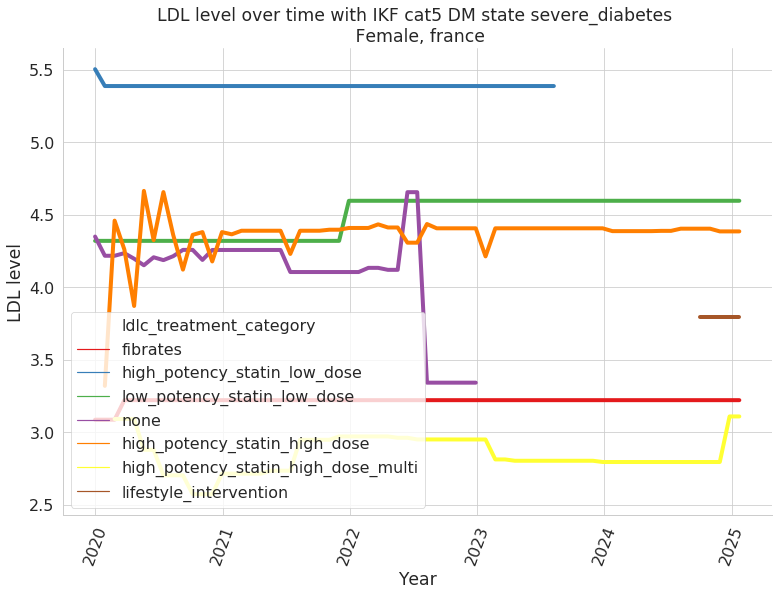

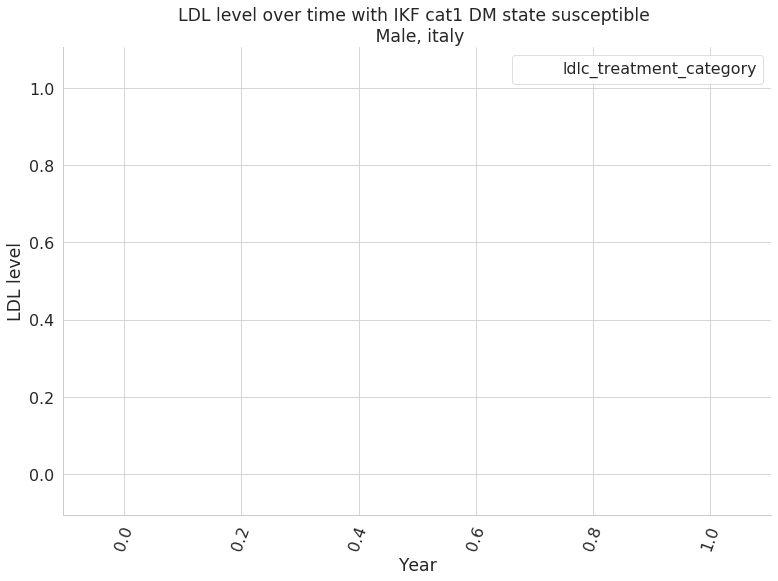

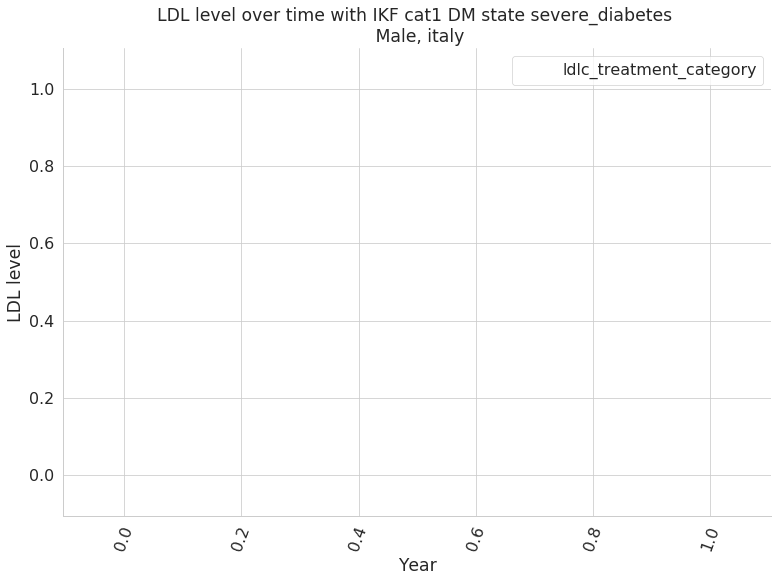

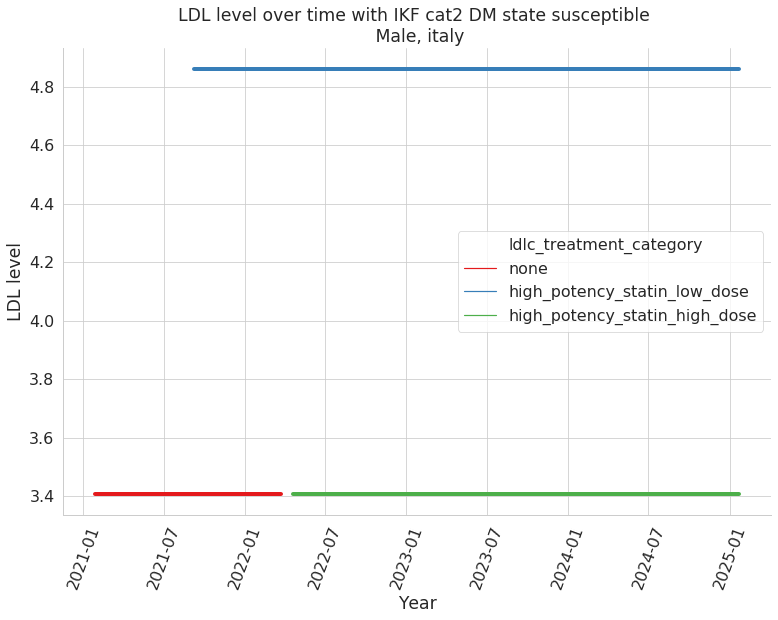

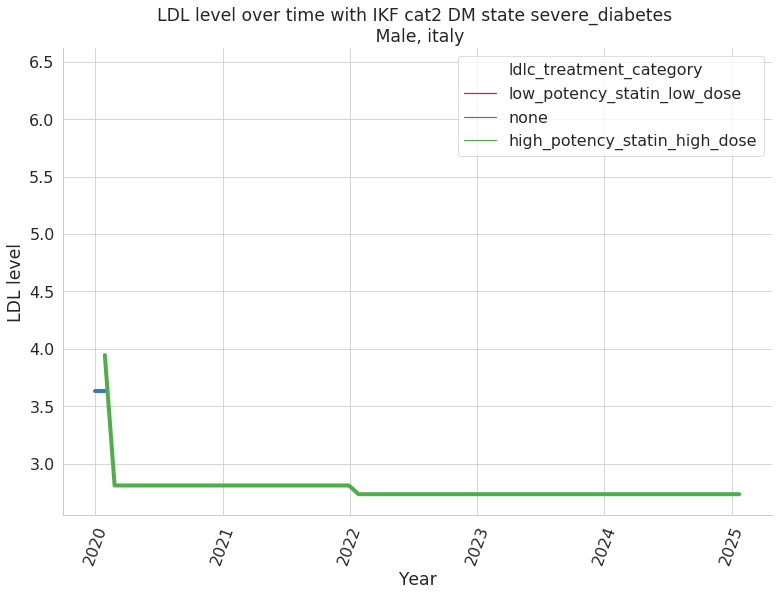

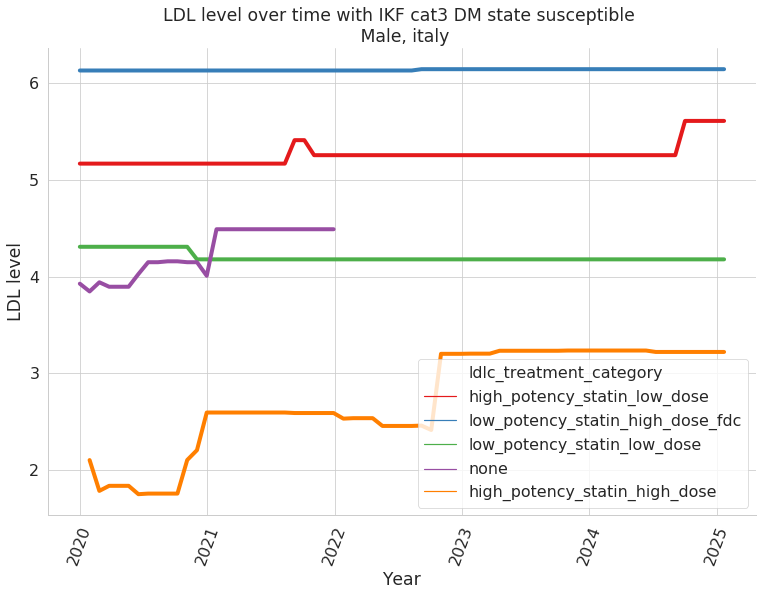

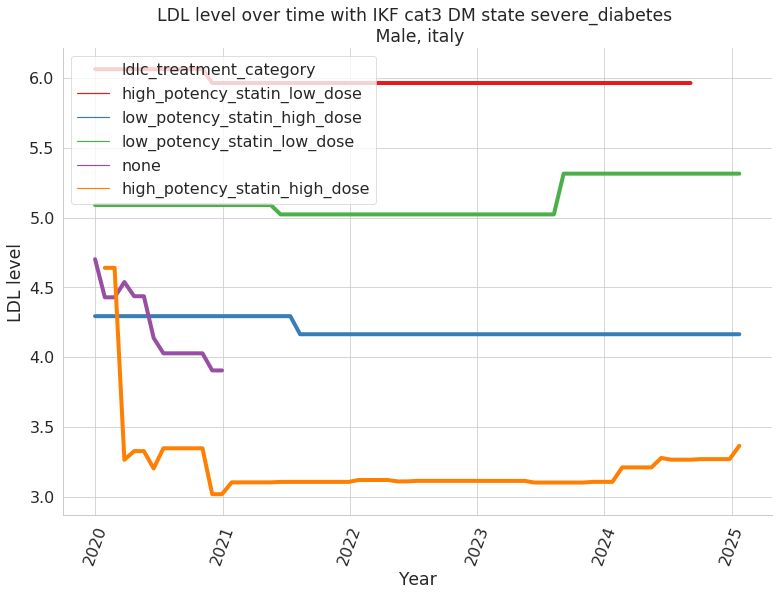

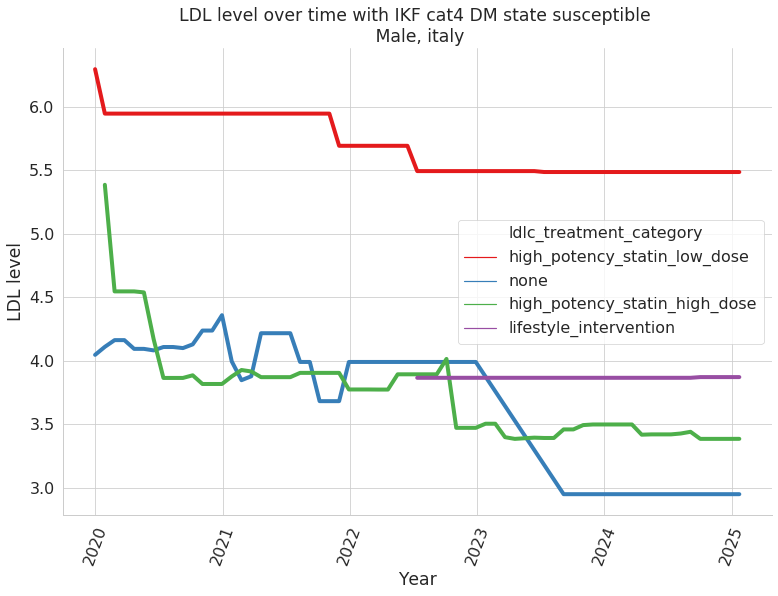

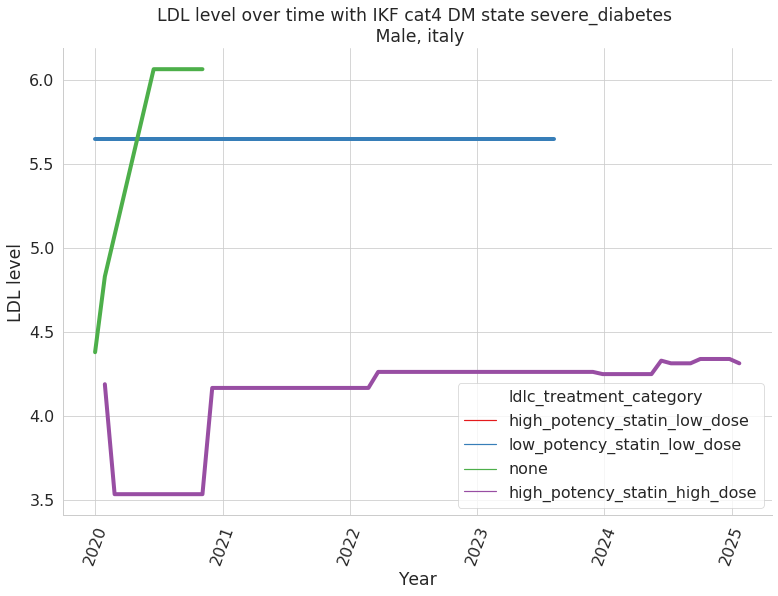

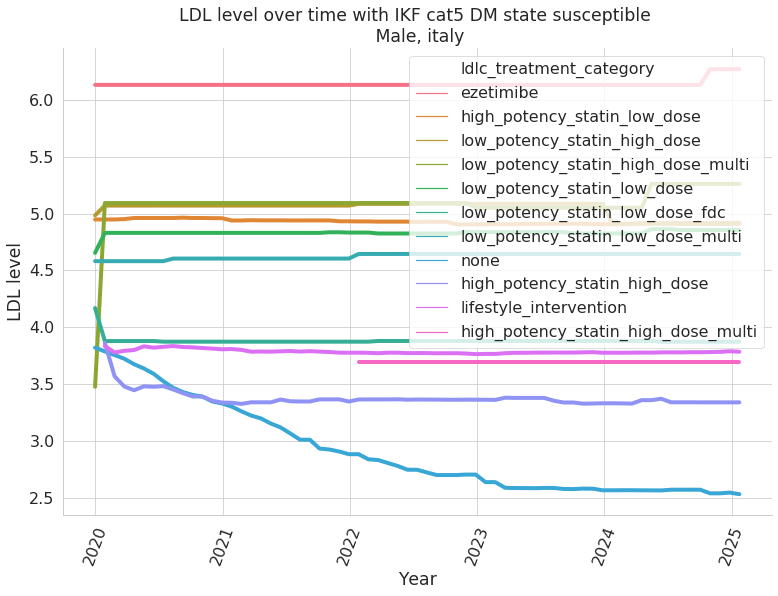

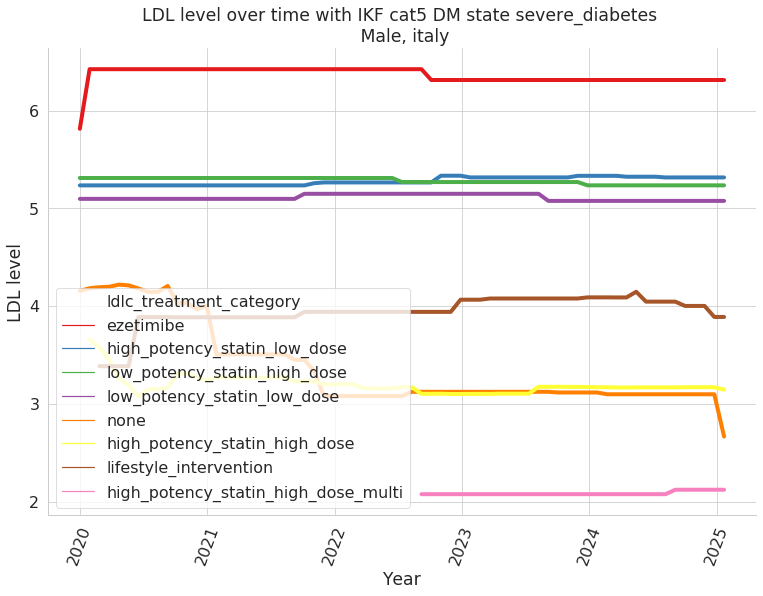

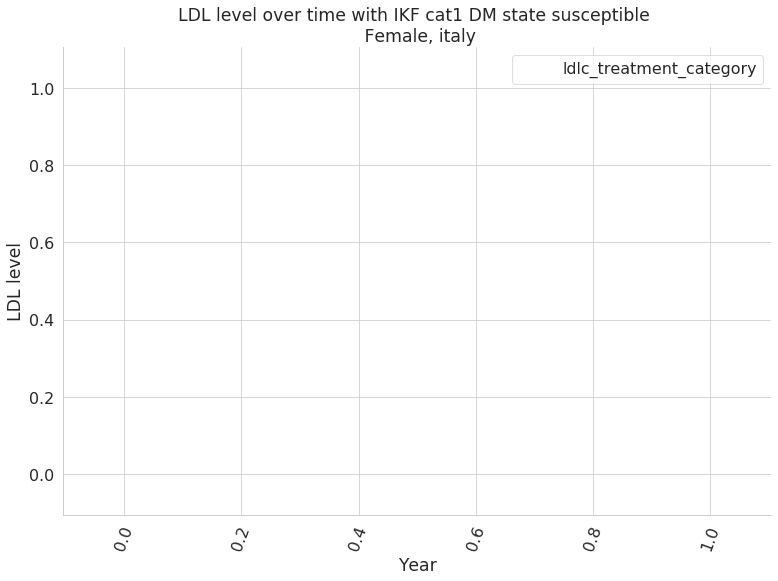

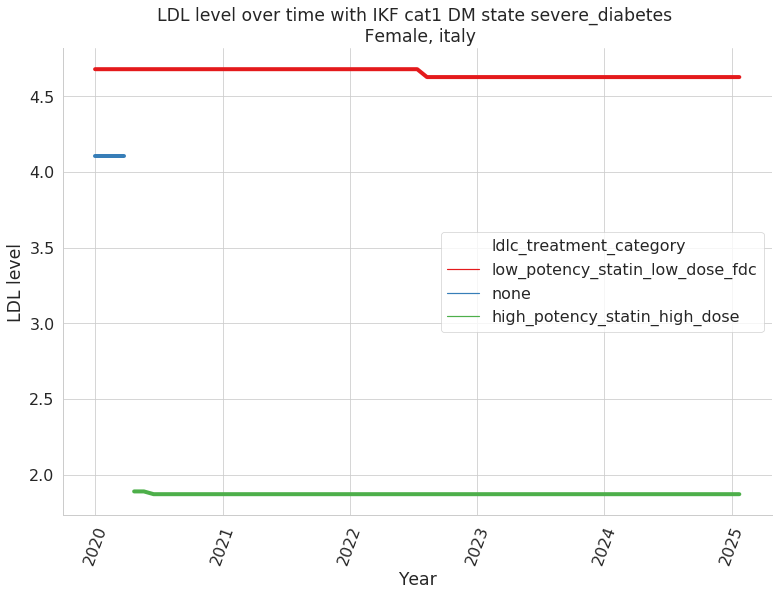

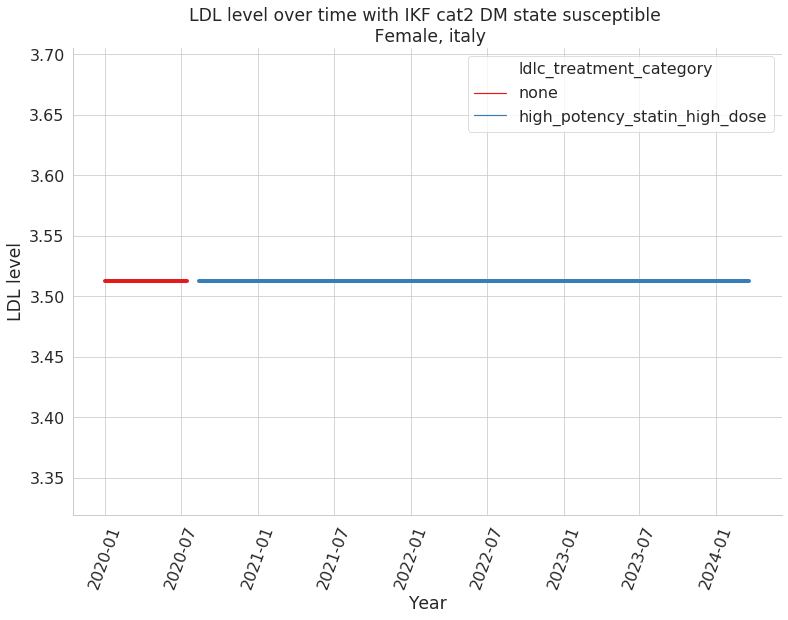

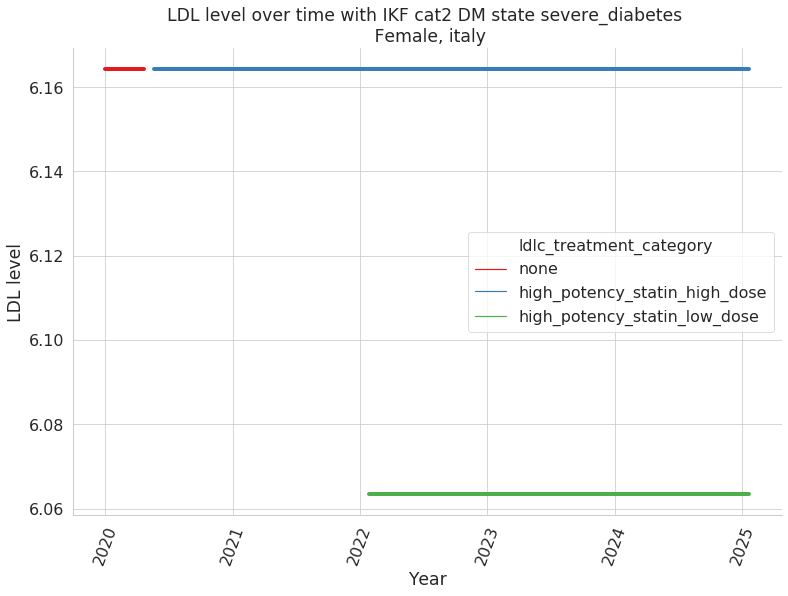

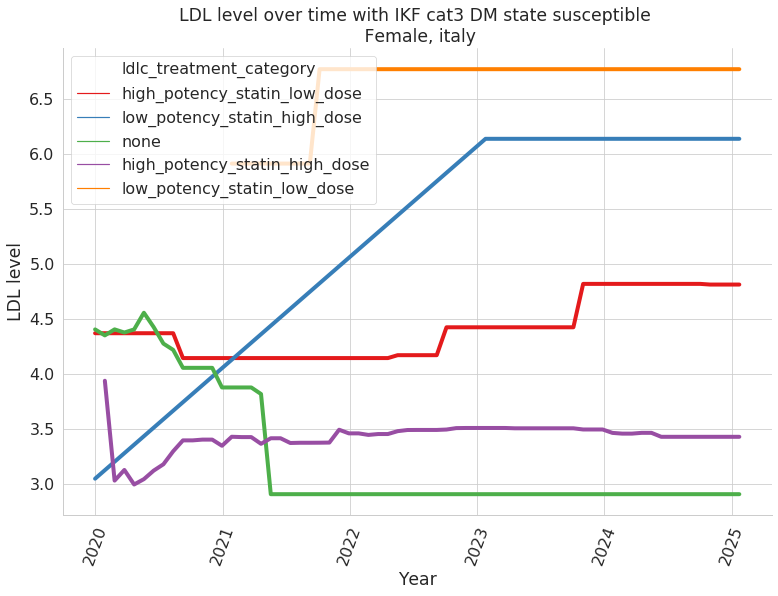

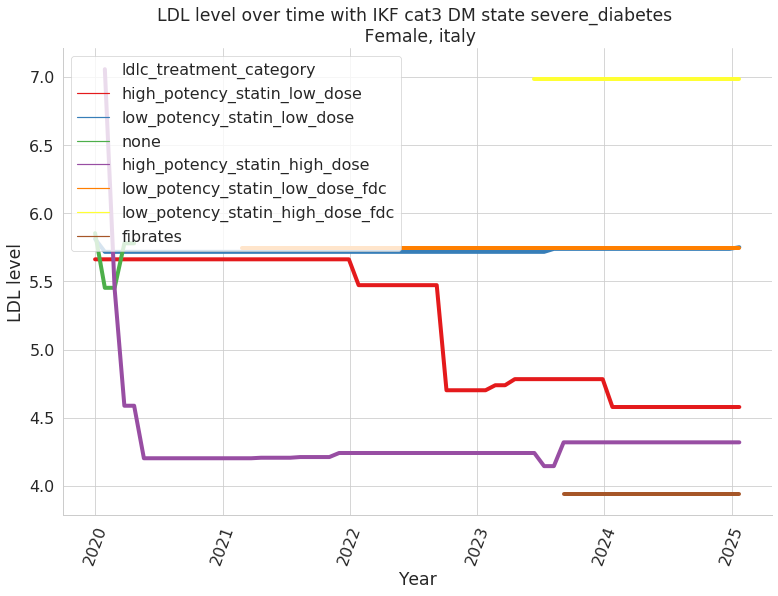

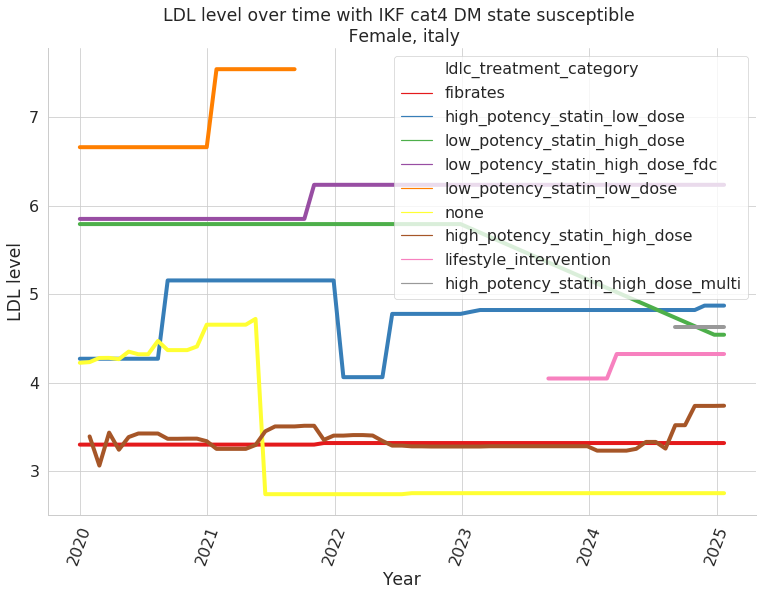

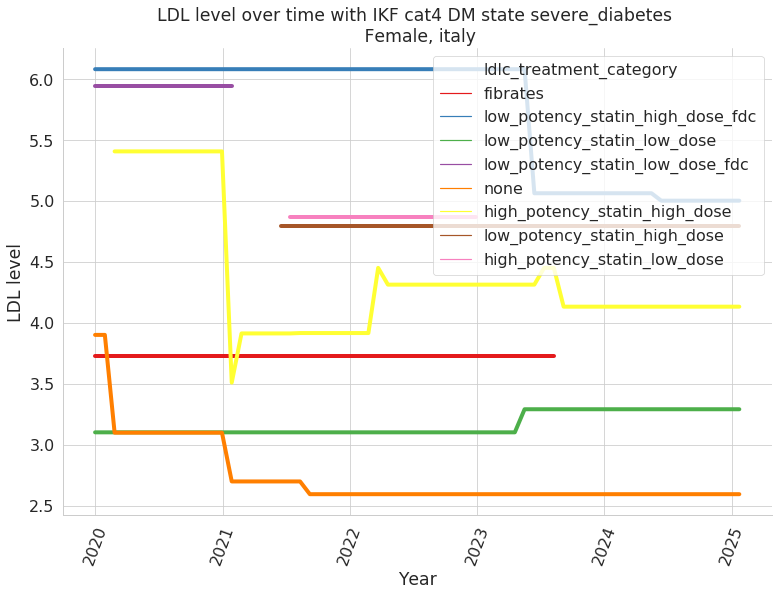

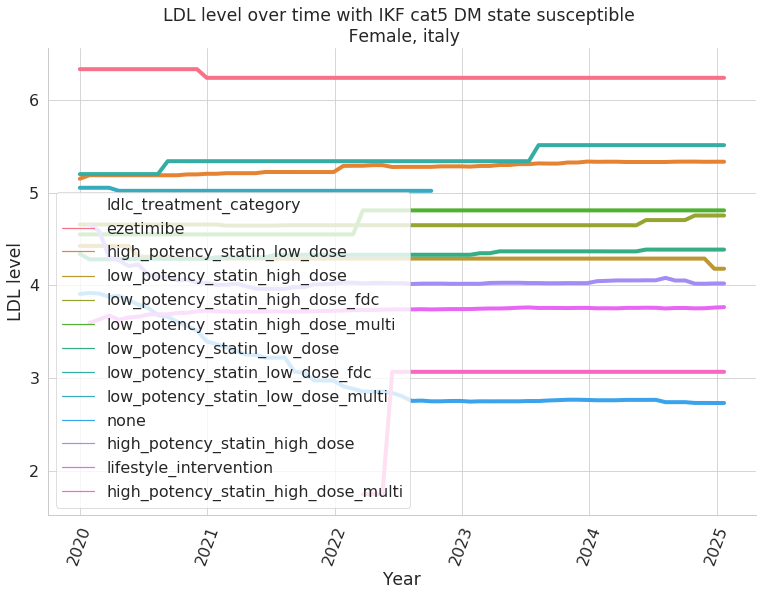

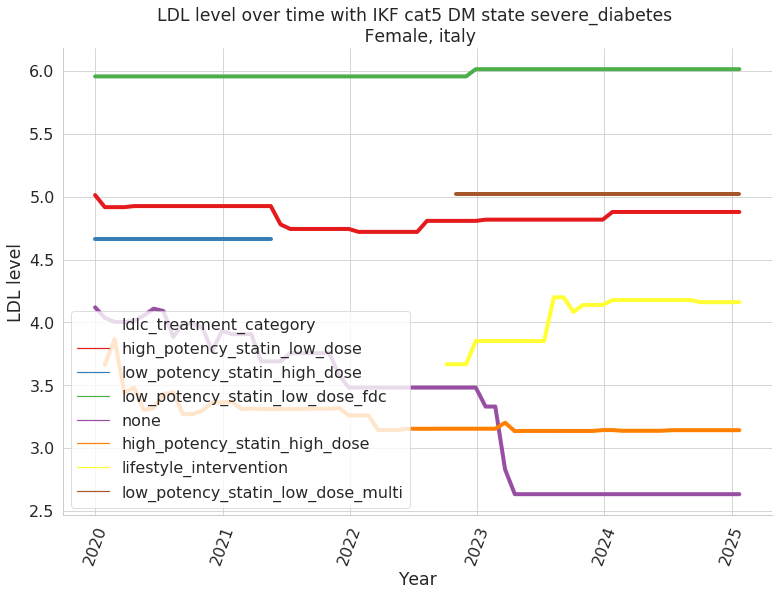

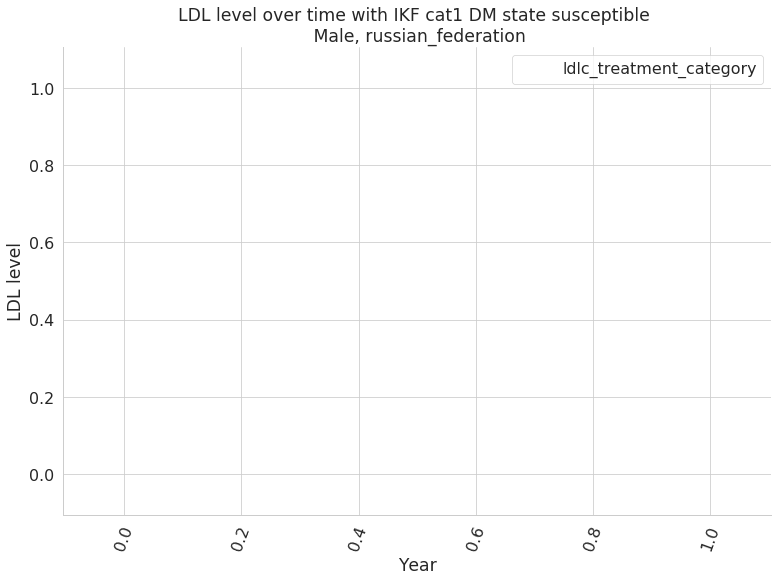

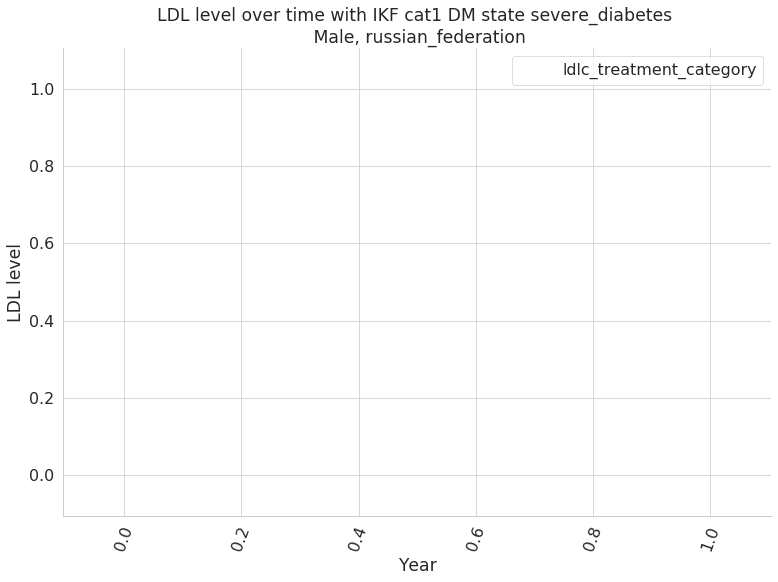

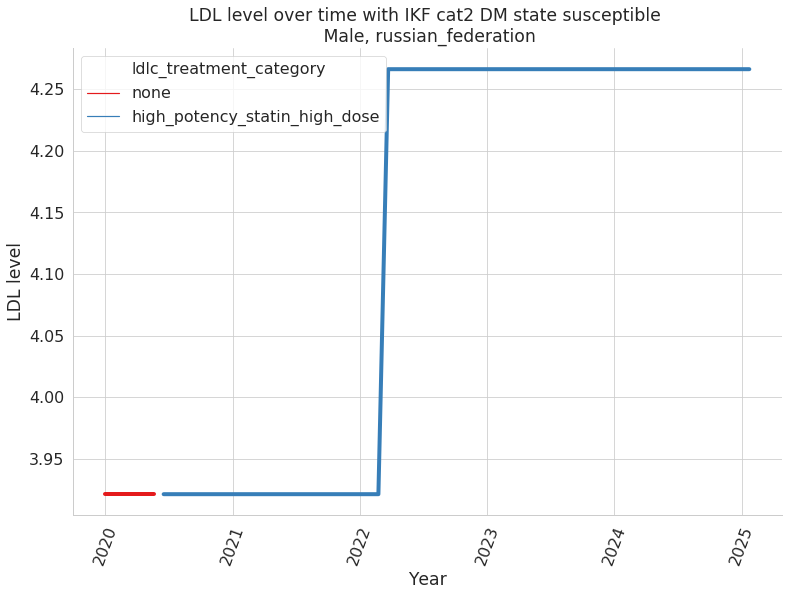

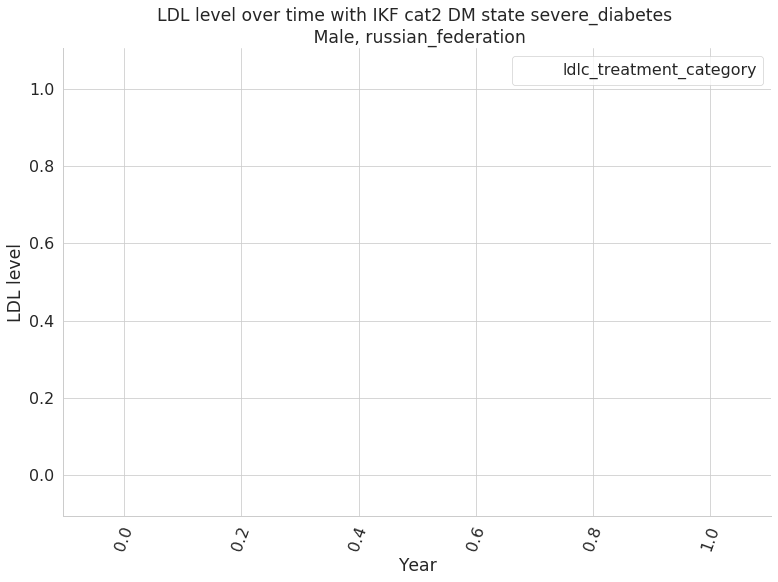

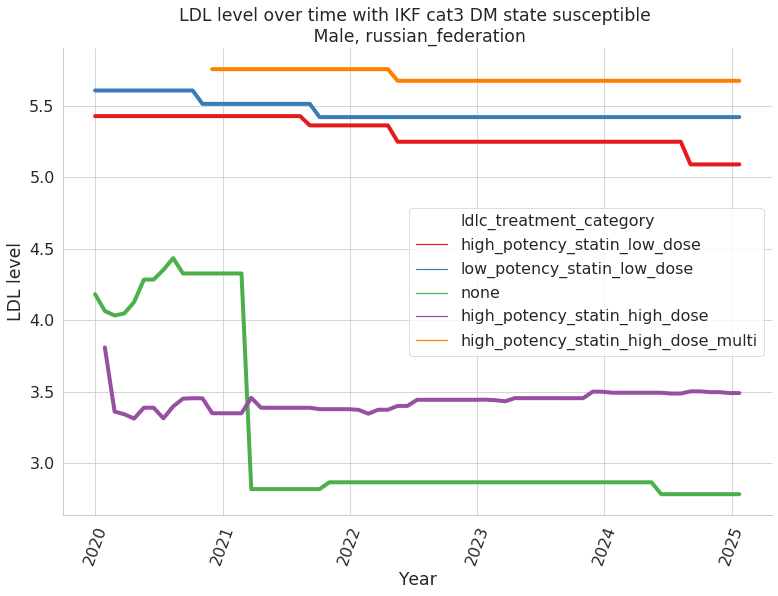

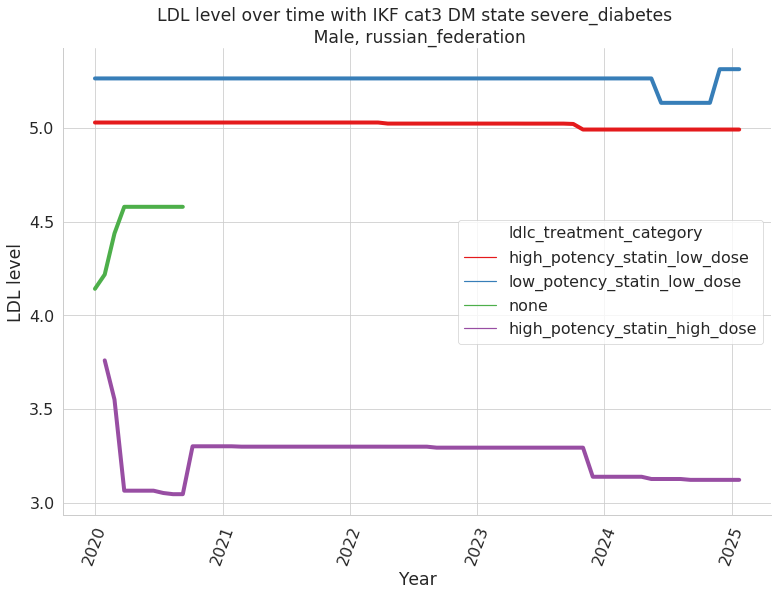

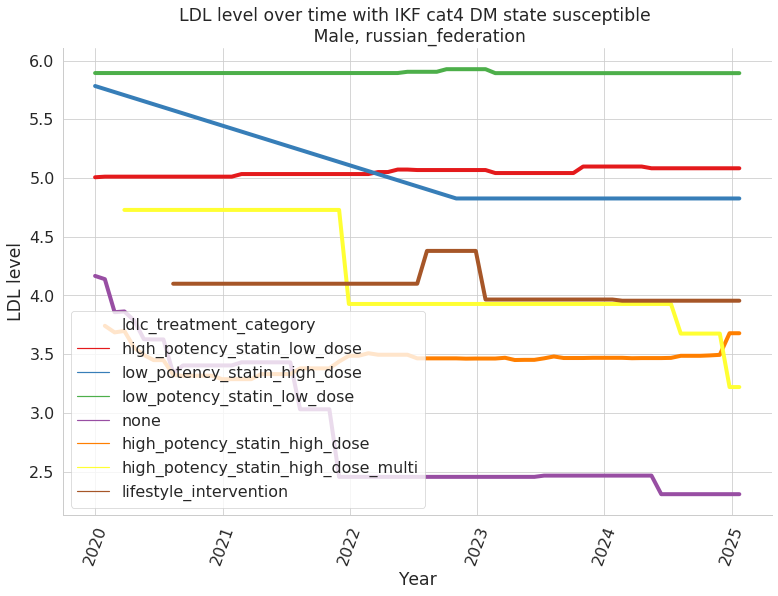

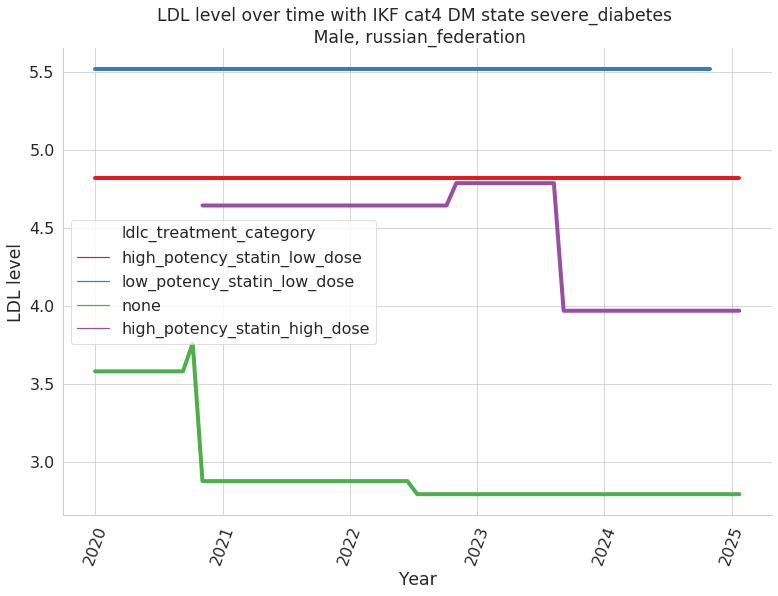

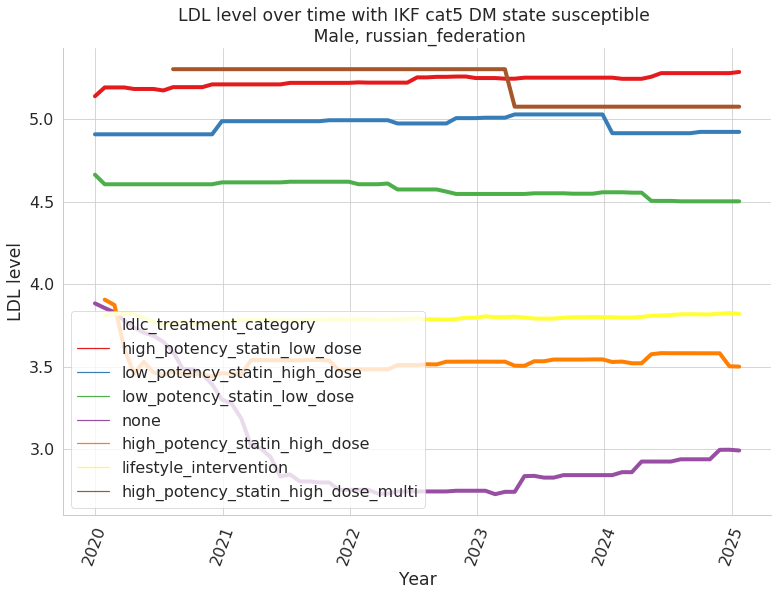

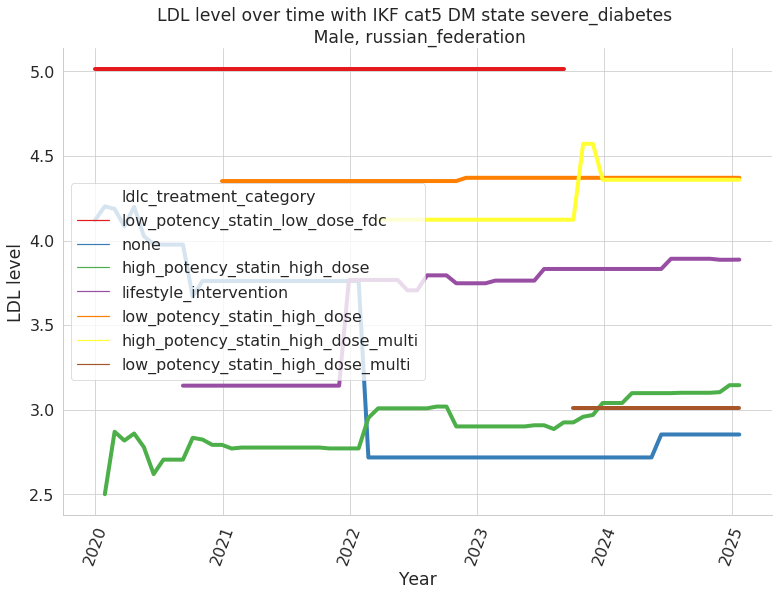

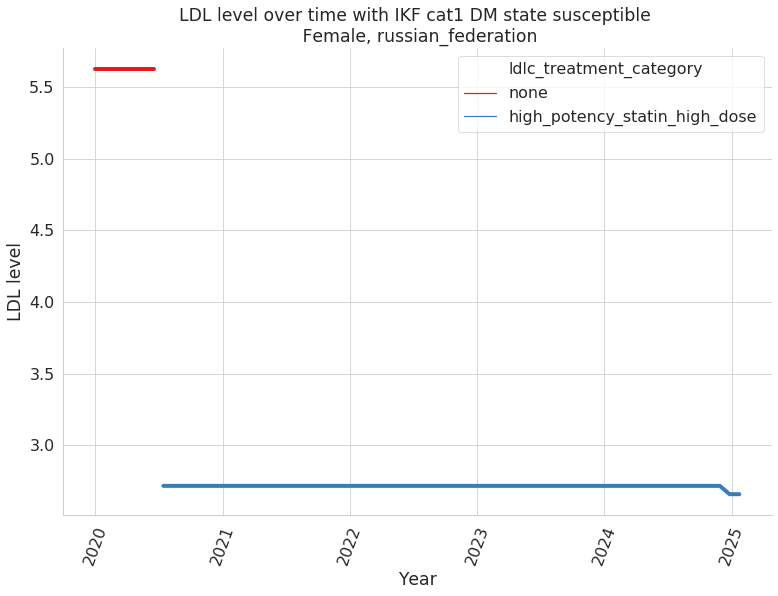

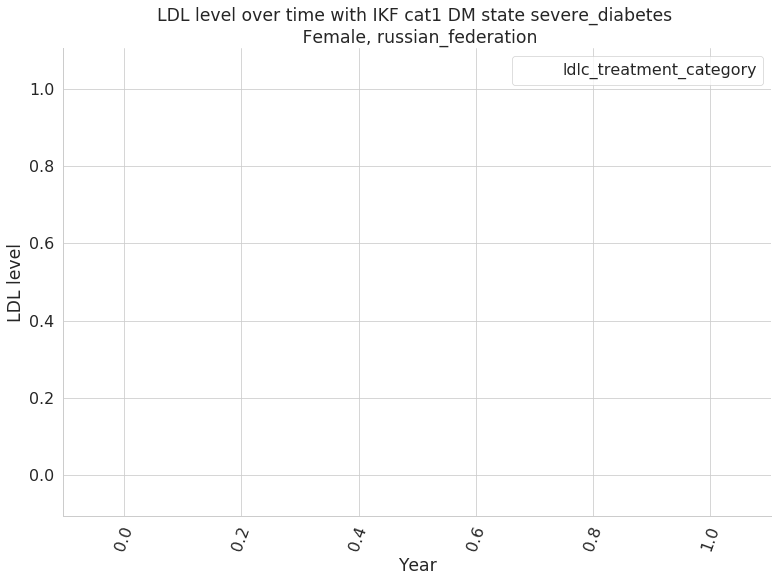

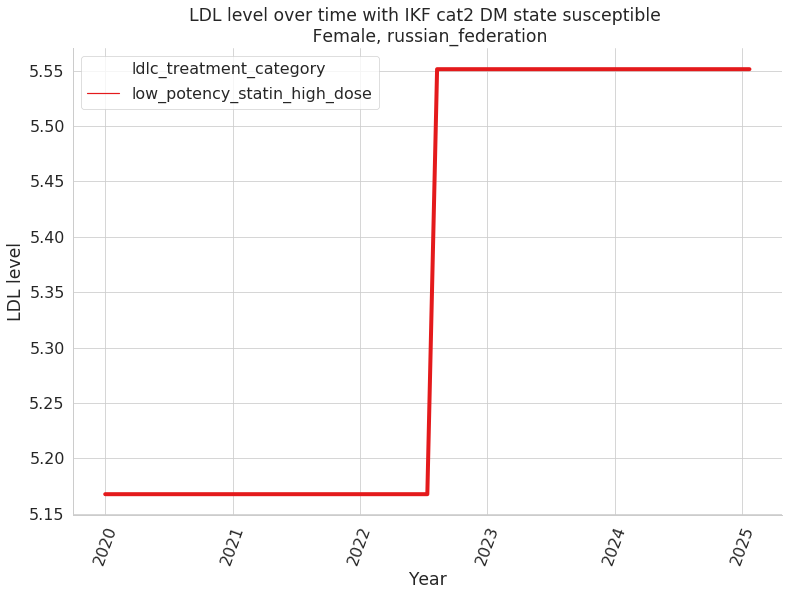

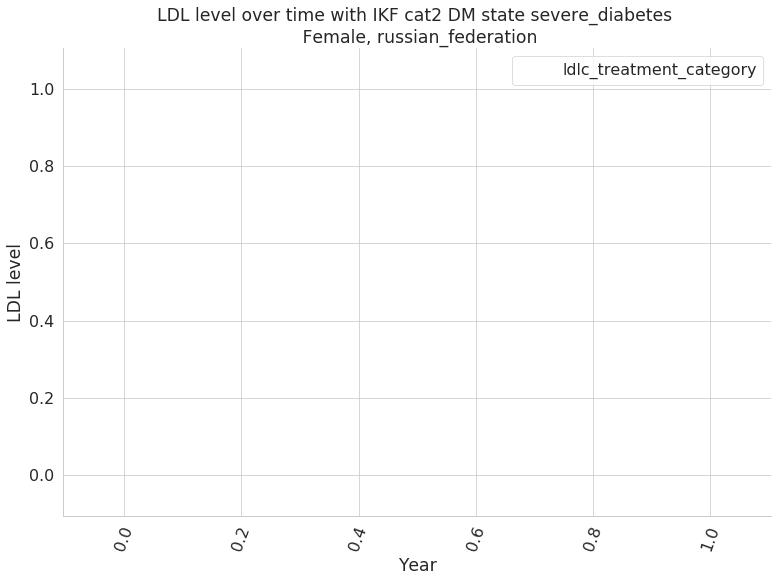

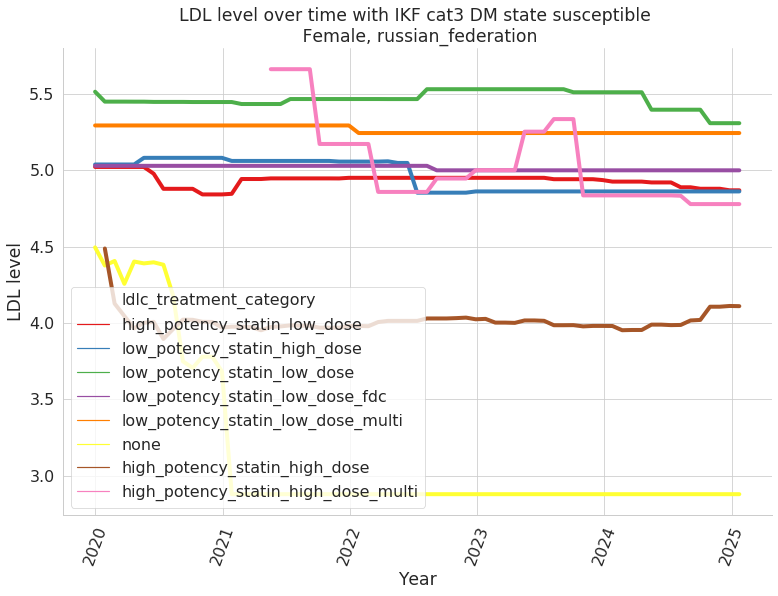

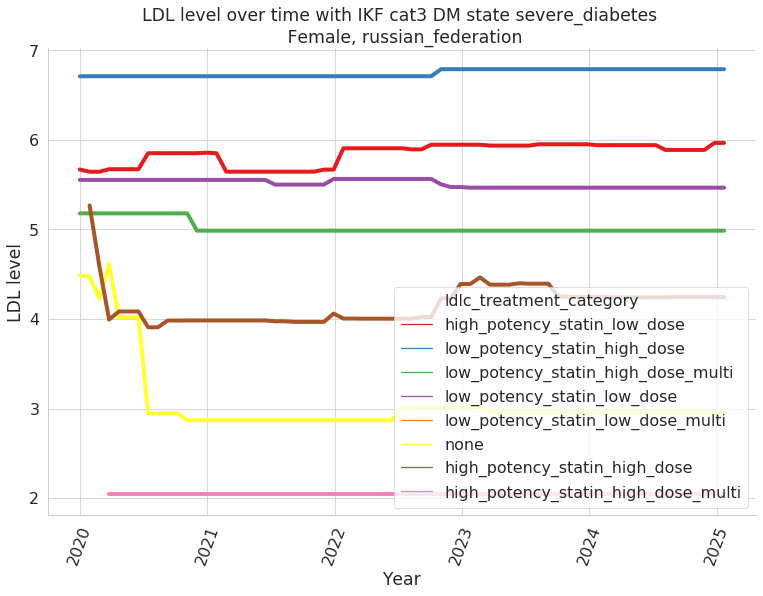

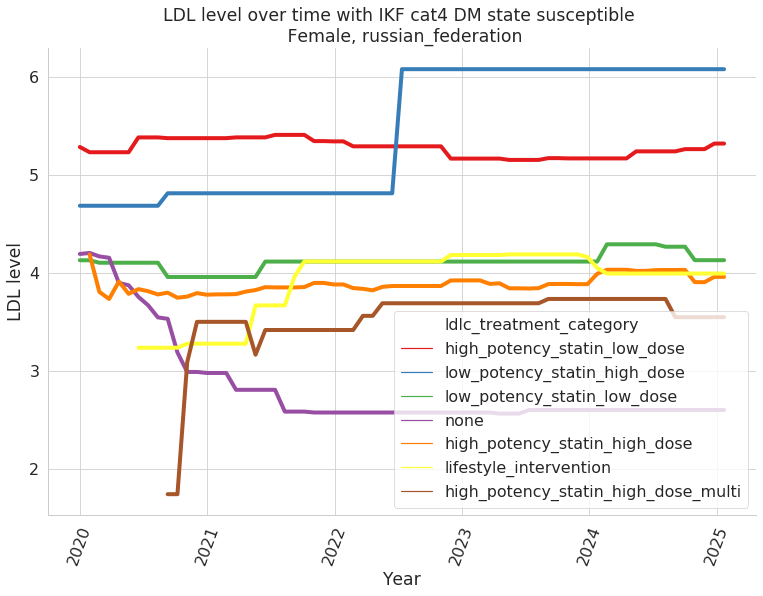

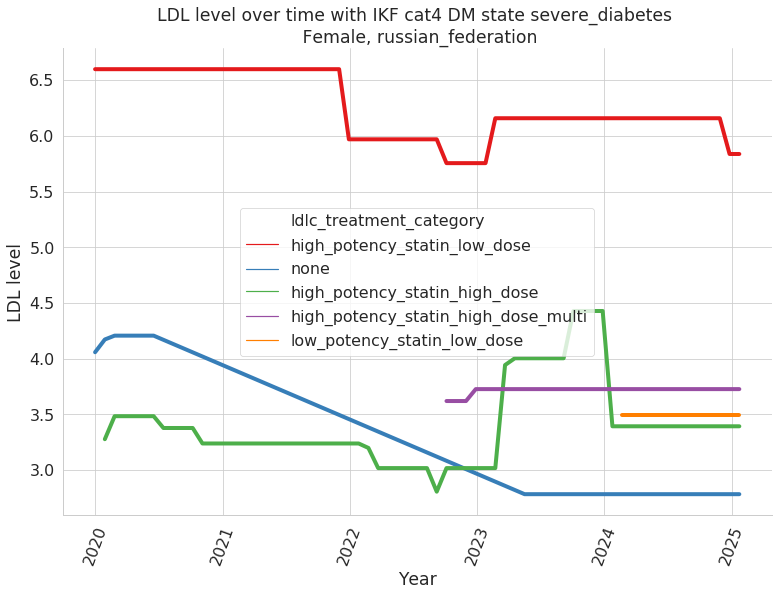

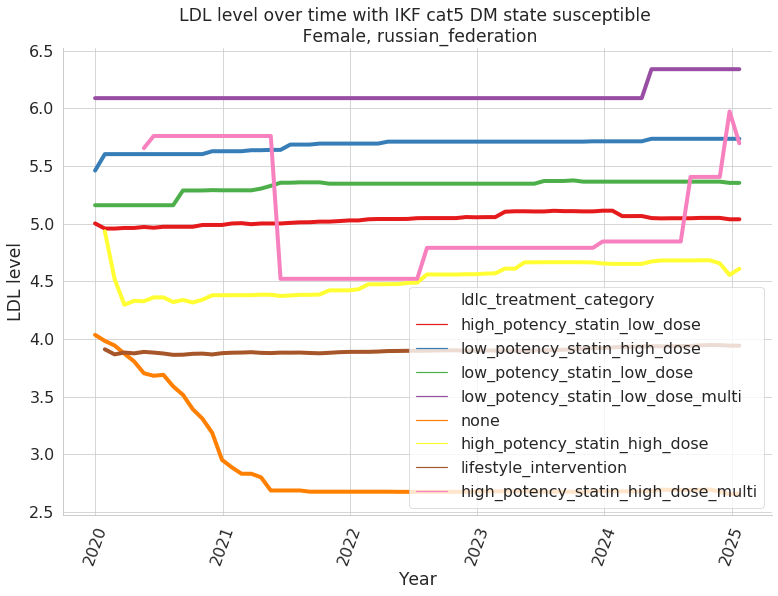

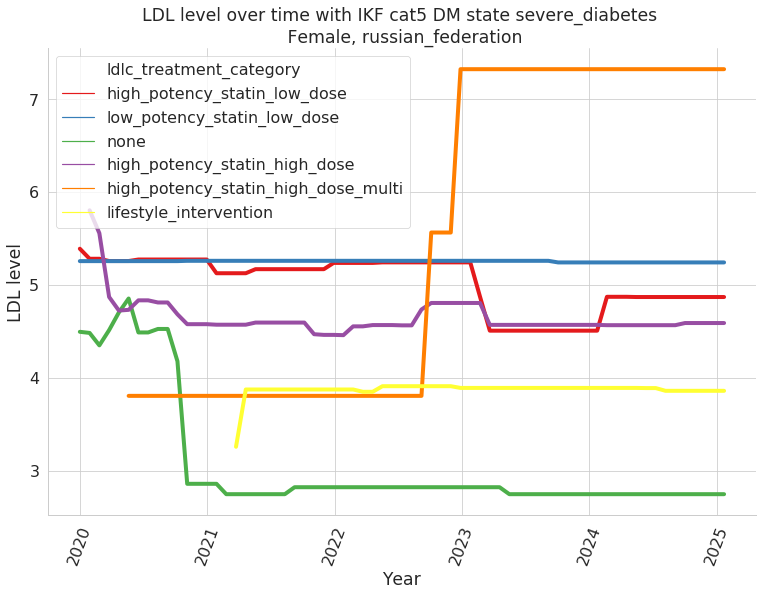

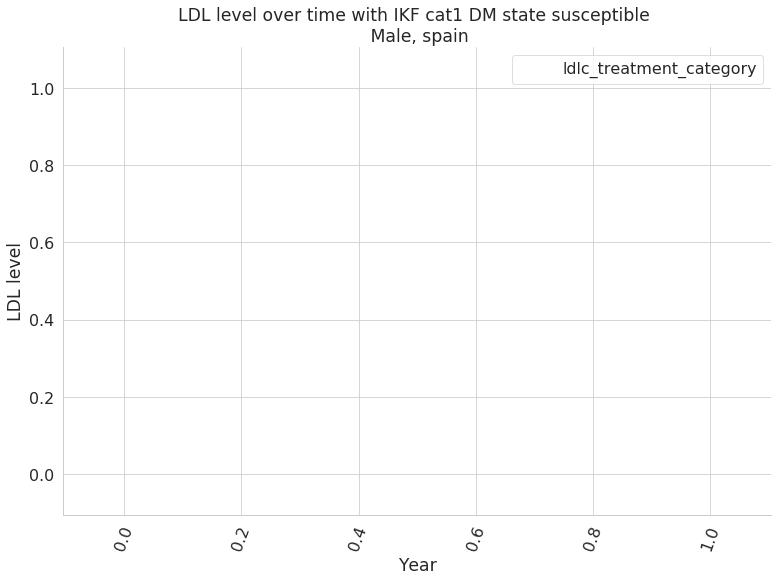

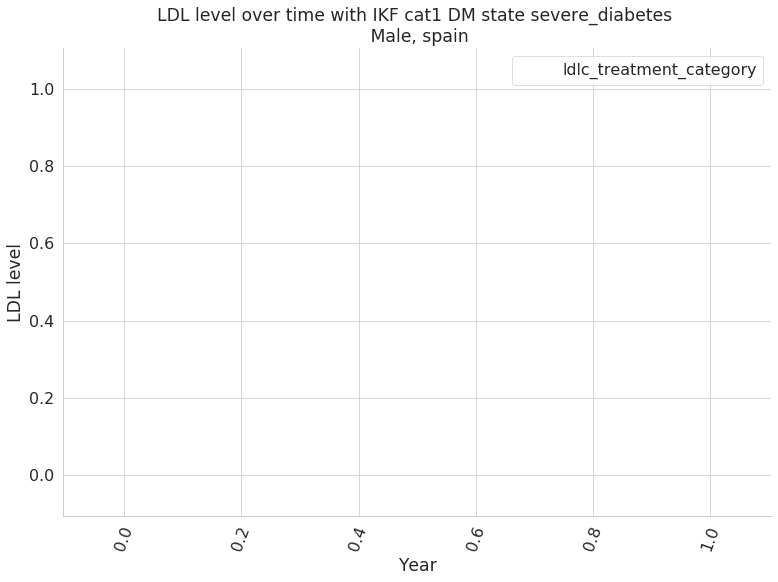

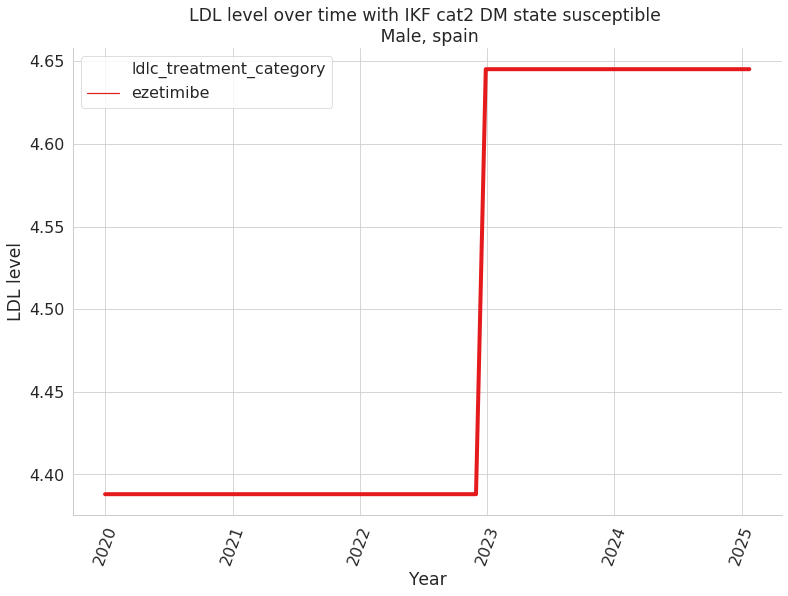

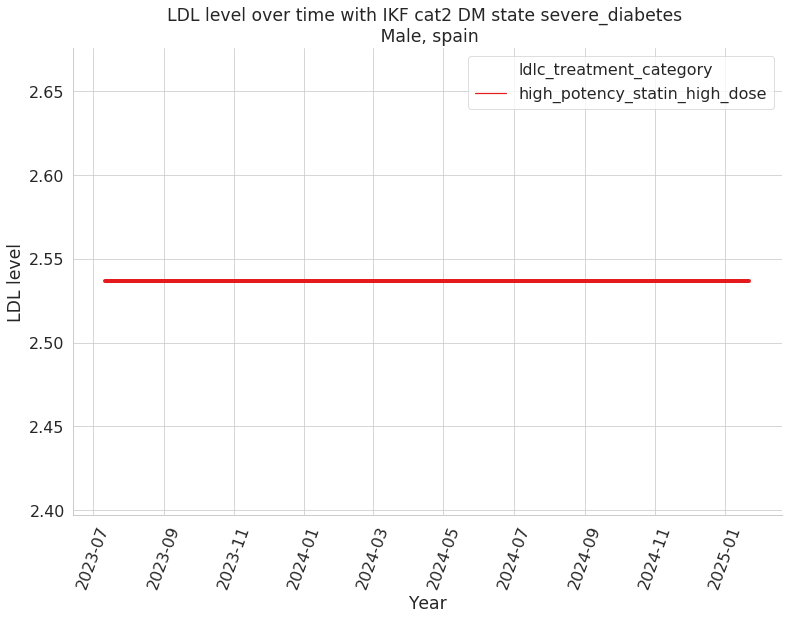

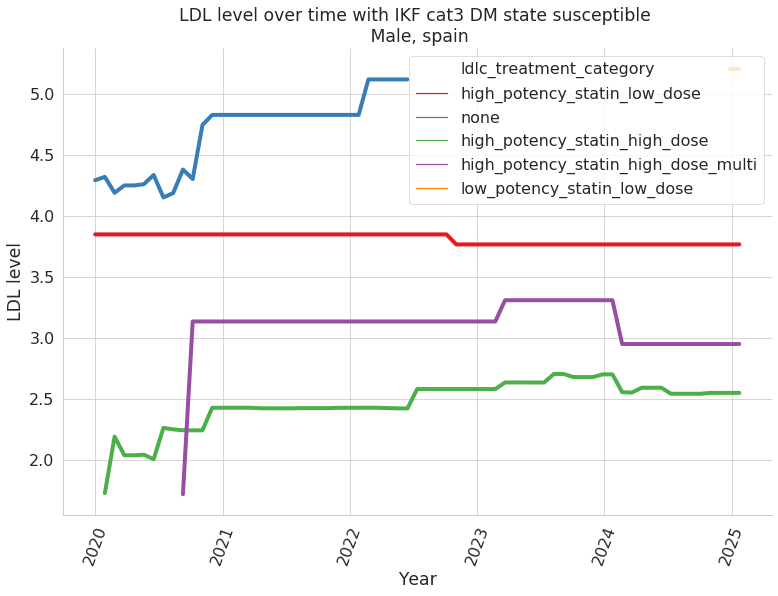

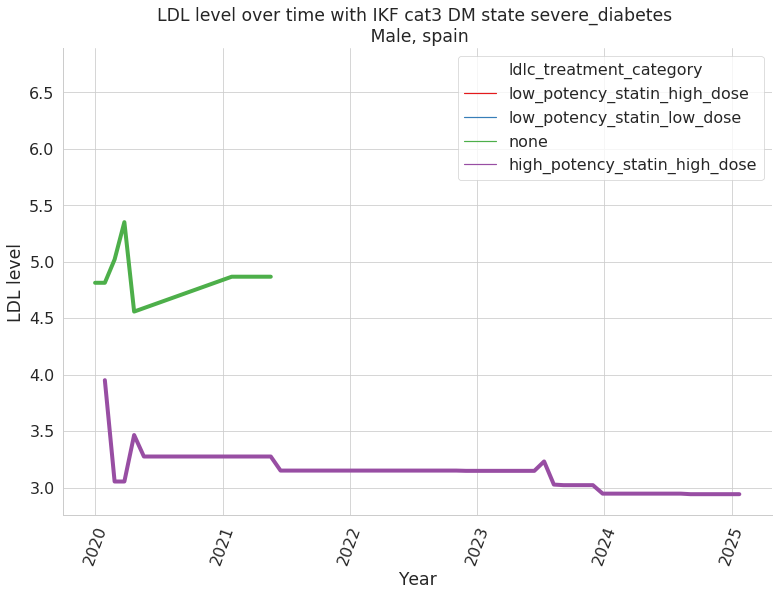

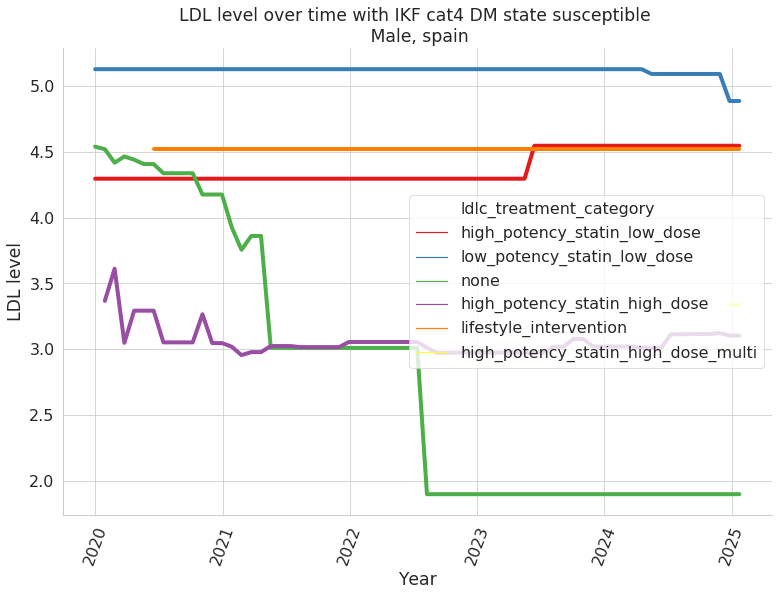

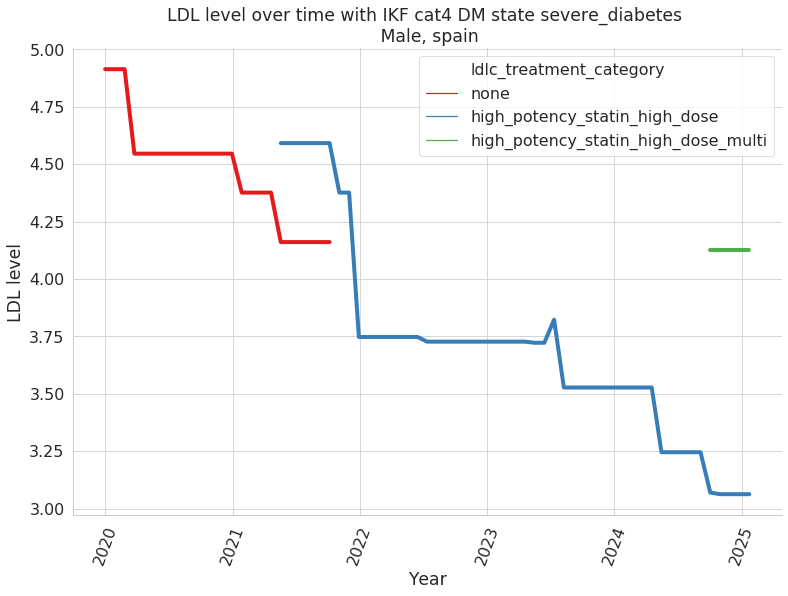

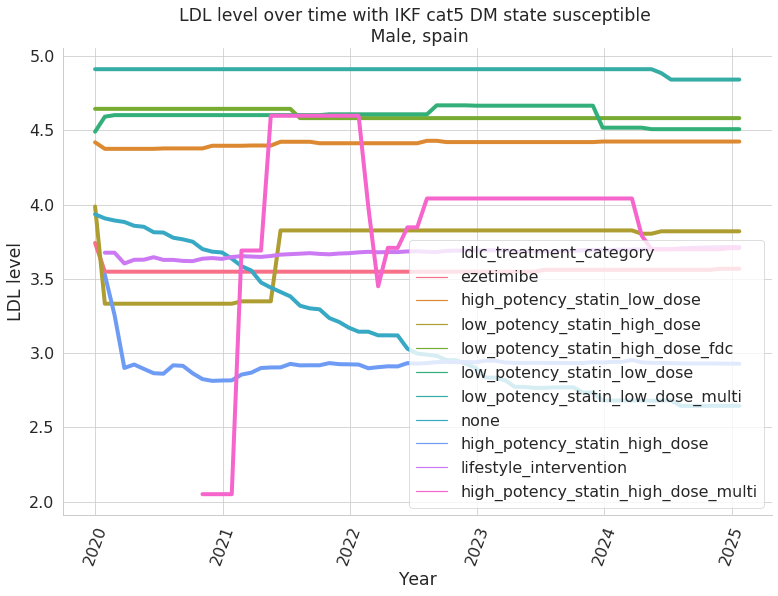

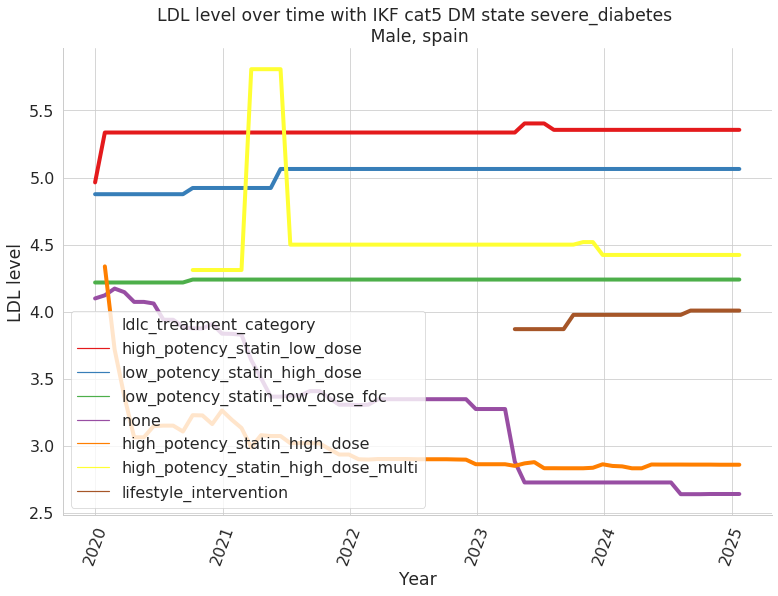

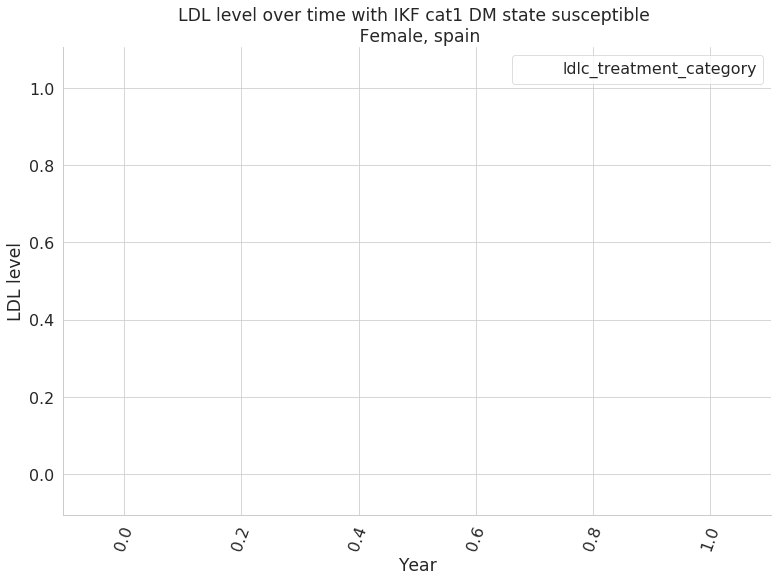

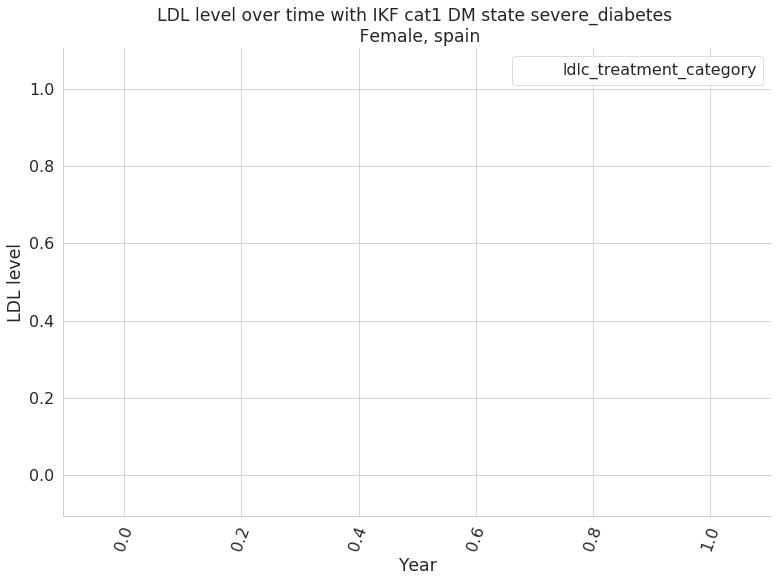

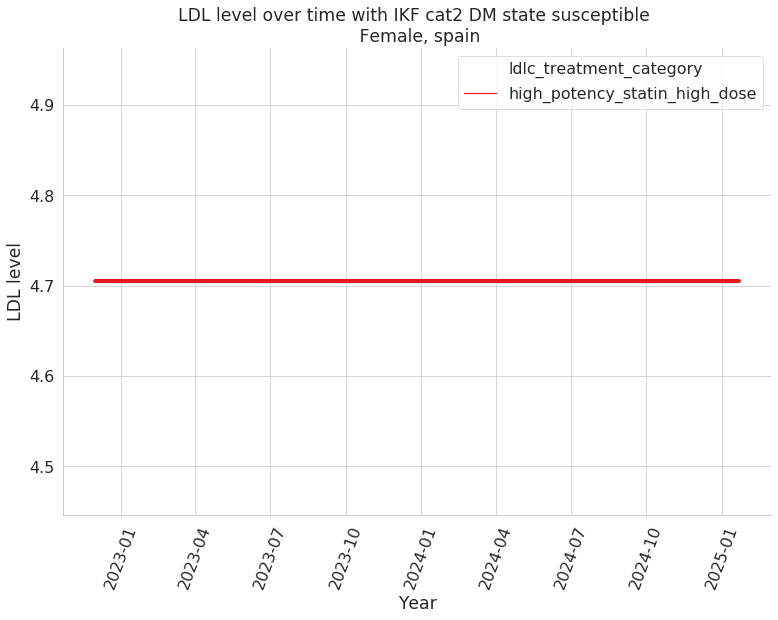

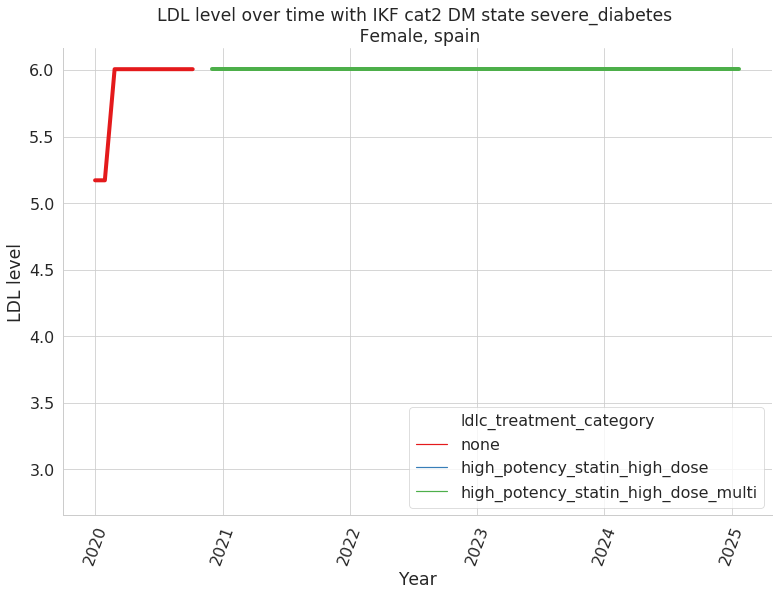

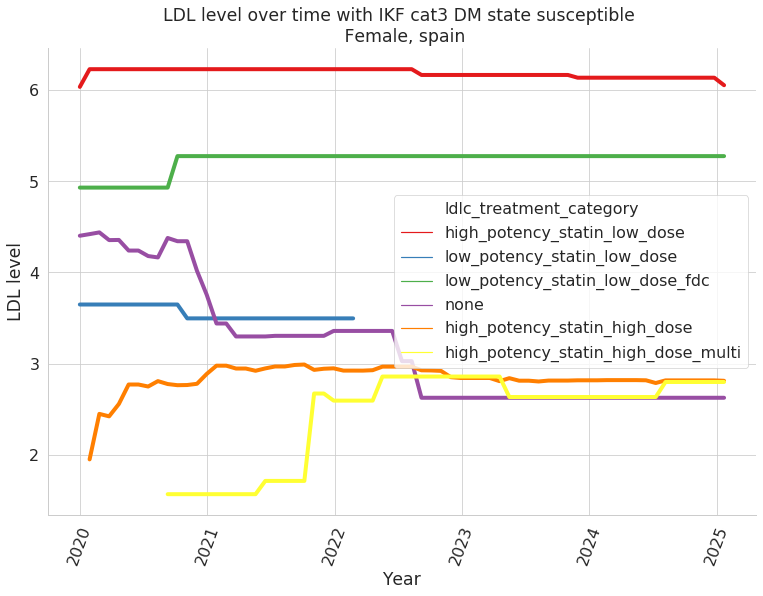

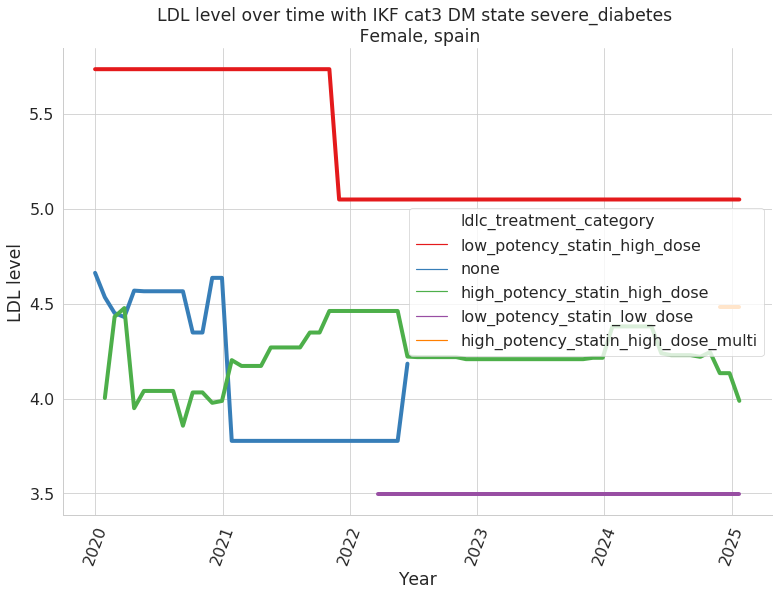

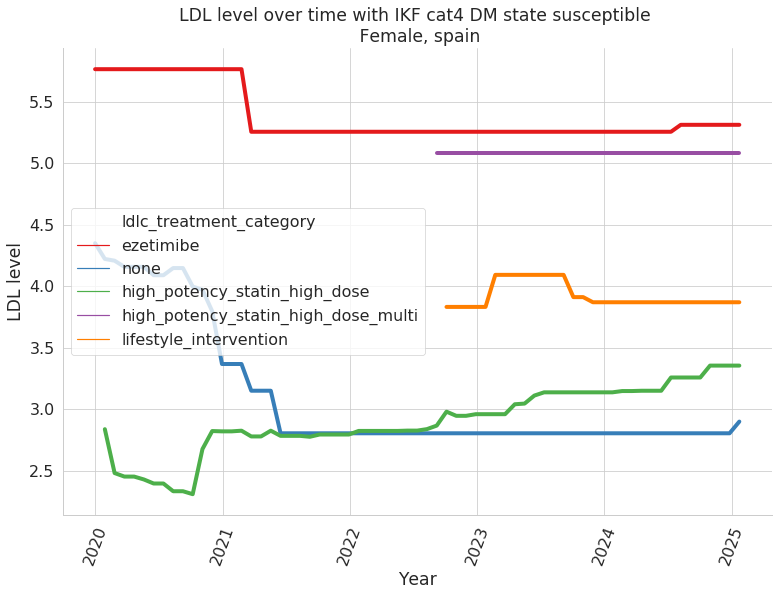

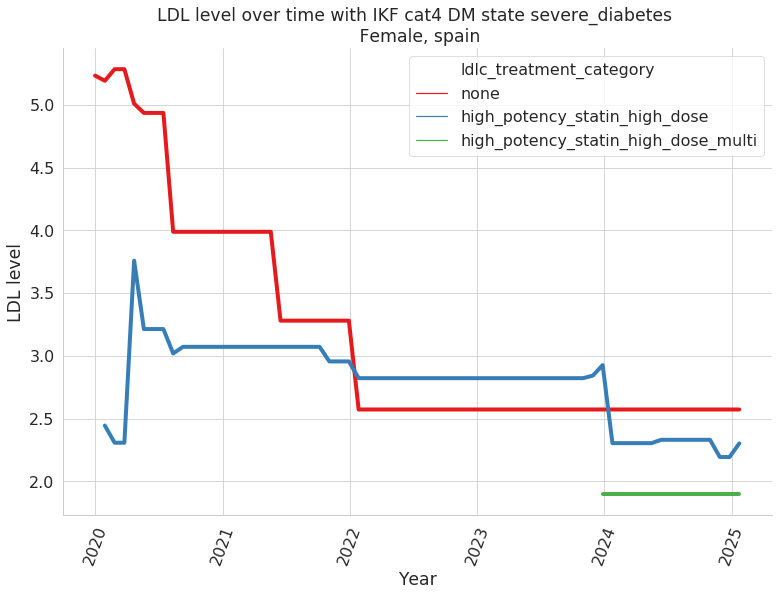

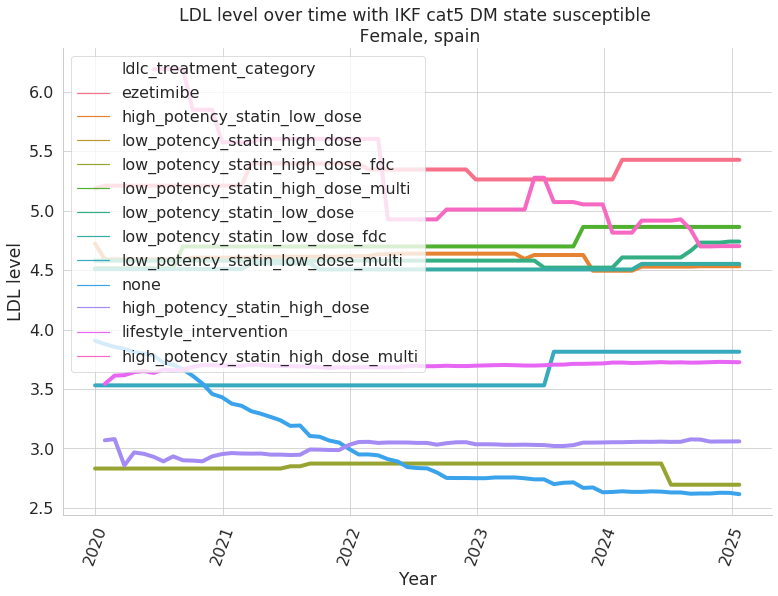

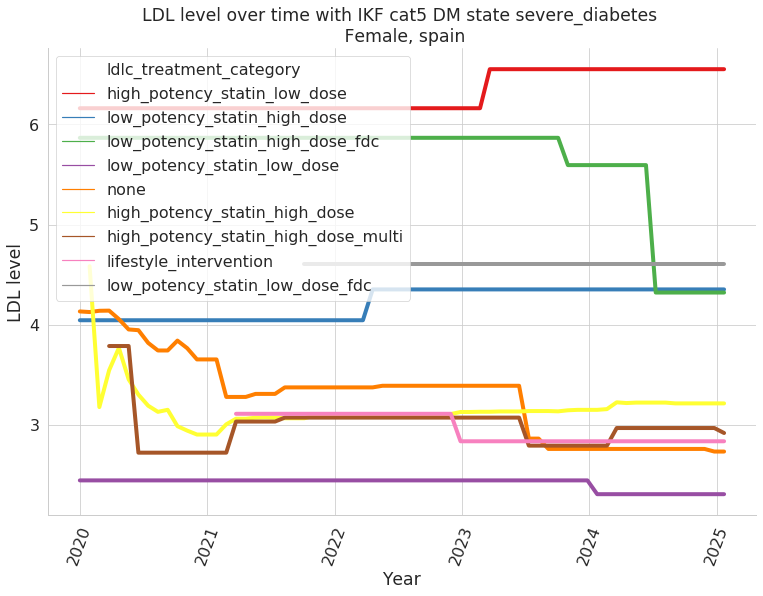

<Figure size 914.4x619.2 with 0 Axes>

In [29]:
def plot_ldl_c_level(scenarios_df, locations):
    df = scenarios_df.groupby(['sex', 'location', 'time', 'ikf', 'scenario', 'diabetes_state']).ldl.mean().reset_index()
    treatment_cats = ['none', 'low_potency_statin_low_dose_fdc',
       'low_potency_statin_high_dose_fdc', 'high_potency_statin_low_dose',
       'low_potency_statin_low_dose', 'low_potency_statin_low_dose_multi',
       'fibrates', 'ezetimibe', 'low_potency_statin_high_dose',
       'low_potency_statin_high_dose_multi',
       'high_potency_statin_high_dose', 'lifestyle_intervention',
       'high_potency_statin_high_dose_multi',
       'high_potency_statin_low_dose_multi']
    ikf_cats=['cat1', 'cat2', 'cat3', 'cat4', 'cat5']
    
    with PdfPages(str(save_path_j)+f'/guideline_sample_ldl_c_over_time.pdf') as pdf:
        for location in locations:
            for sex in ['Male', 'Female']:
                for cat in ikf_cats:
                    for dm_state in ['susceptible', 'severe_diabetes']:
                            df_plot = df[(df.sex == sex) & (df.location == location) & (df.ikf == cat) & (df.diabetes_state == dm_state)]

                            g = sns.lineplot(x='time', y='ldl', hue = 'ldlc_treatment_category',
                                             linewidth=4, data=df_plot)

                #             g = sns.lineplot(x='time', y='ldl',
                #                              linewidth=4, data=df_plot)

                            g.set_title(f'LDL level over time with IKF {cat} DM state {dm_state} \n {sex}, {location}')
                            plt.xticks(rotation=70)
                            g.set_xlabel('Year')
                            g.set_ylabel(f'LDL level')

                            pdf.savefig(orientation = 'landscape', bbox_inches='tight')

                            plt.show()
                            plt.clf() 

plot_ldl_c_level(guideline_sample, locations)